In [1]:
# Importing Important Libraries

# Data Analysis ans Visualization tools
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set()
from tqdm import tqdm
import missingno as msno
from collections import Counter
import random as rn
from functools import reduce 

# Statistical Libraries
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Scikit Learn Framework
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, make_scorer,precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from prettytable import PrettyTable



# Import and suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
# Using Pandas

data = pd.read_csv("data_cardiovascular_risk.csv")

###### Print top 5 rows in the dataframe.

In [3]:
data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

###### Print bottom 5 rows in the dataframe.

In [4]:
data.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [5]:
data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [6]:
data.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [7]:
# Using Numpy

import csv
with open("data_cardiovascular_risk.csv", "r") as f:
    data_np = list(csv.reader(f, delimiter=';'))
data_np

[['id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD'],
 ['0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,,90.0,80.0,1'],
 ['1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0'],
 ['2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0'],
 ['3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1'],
 ['4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0'],
 ['5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.8,85.0,65.0,1'],
 ['6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0'],
 ['7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0'],
 ['8,41,2.0,F,YES,20.0,,0,0,0,220.0,126.0,78.0,20.7,86.0,79.0,0'],
 ['9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,,0'],
 ['10,61,1.0,F,NO,0.0,0.0,0,1,0,,185.0,121.0,35.22,80.0,,0'],
 ['11,53,2.0,F,NO,0.0,0.0,0,0,0,210.0,138.0,86.5,22.49,88.0,87.0,0'],
 ['12,43,2.0,F,NO,0.0,0.0,0,0,0,

###### Print top 5 rows 

In [8]:
print(data_np[:5])


[['id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD'], ['0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,,90.0,80.0,1'], ['1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0'], ['2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0'], ['3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1']]


###### Print bottom 5 rows 

In [9]:
print(data_np[-5:])


[['3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0'], ['3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0'], ['3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1'], ['3388,60,1.0,M,NO,0.0,,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0'], ['3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0']]


In [10]:
data_np = np.array(data_np[1:])    
data_np

array([['0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,,90.0,80.0,1'],
       ['1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0'],
       ['2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0'],
       ...,
       ['3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1'],
       ['3388,60,1.0,M,NO,0.0,,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0'],
       ['3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0']],
      dtype='<U70')

# Dataset Description

#### Demographic: 
• **Sex**: male or female ("M" or "F") 

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

#### Education : 
1 - Higher Secorndary, 2- Graduate, 3 - Post Graduate 4- Doctarte or PHD

#### Behavioural: 
• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO") 

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day .(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### Medical (history): 
• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal) 

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal) 

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal) 

• **Diabetes**: whether or not the patient had diabetes (Nominal) 

#### Medical(current): 
• **Tot Chol**: total cholesterol level (Continuous) 

• **Sys BP**: systolic blood pressure (Continuous) 

• **Dia BP**: diastolic blood pressure (Continuous) 

• **BMI**: Body Mass Index (Continuous) 

• **Heart Rate**: heart rate(Continuous - In medical research, variables such as heart rate thought discrete, are considered continuous because of a large number of possible values.) 

• **Glucose**: glucose level (Continuous) 

#### Predict variable (desired target): 
• 10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) – DV


#  Data Wrangling

a) Computing the size of DataFrame

b) Enlist the Column Labels

c) Generating Basic Information of Attributes

d) Enlisting Numerical Features

e )Enlisting Categorical Features

f) Checking for Missing Values

g) Descriptive Analysis on Numerical Attributes

h) Drop Unnecessary Columns

i) Descriptive Analysis on Categorical Attributes

j) Checking Unique Values on Categorical Attributes

k) Checking Duplicate values

### a) Computing the size of DataFrame


In [11]:
print(f"The shape of the Dataset : {data.shape}")
print(f"Attrition Dataset: Rows= {data.shape[0]}, Columns= {data.shape[1]}")

The shape of the Dataset : (3390, 17)
Attrition Dataset: Rows= 3390, Columns= 17


### b) Enlist the Column Labels


In [12]:
print("Column labels in the dataset in column order:")
print("*"*50)
for column in data.columns:
    print(column)

Column labels in the dataset in column order:
**************************************************
id
age
education
sex
is_smoking
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD


### c) Generating Basic Information of Attributes



In [13]:
# Print the Long summary of the dataframe by setting verbose = True
# Check for Non-Null or Nan Nalues in the dataset.
print(data.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

### d) Enlisting Numerical Features

In [14]:
data.select_dtypes(np.number).sample(5)

id  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
2577  2577   47        4.0         0.0     0.0                0             0   
1643  1643   52        1.0         0.0     0.0                0             0   
252    252   55        3.0         0.0     0.0                0             1   
1201  1201   42        1.0        30.0     0.0                0             0   
1547  1547   52        1.0         0.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
2577         0    230.0  119.0   87.0  29.23       75.0      NaN           0  
1643         0    211.0  129.0   73.0  29.09       62.0    117.0           0  
252          0    237.0  153.0   80.0  28.90       74.0     72.0           0  
1201         0    270.0  122.0   82.0  30.31       72.0    142.0           0  
1547         0    285.0  135.0   86.0  27.78       88.0     93.0           0

### e )Enlisting Categorical Features

In [15]:
data.select_dtypes(include="O").sample(5)

sex is_smoking
1532   M        YES
367    F         NO
2576   F         NO
1368   F         NO
2454   F         NO

### f) Checking for Missing Values

In [16]:
print("Is there any missing value present or not ?", data.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? True
**************************************************


Total No. of Missing Values  % of Missing Values
id                                         0                 0.00
age                                        0                 0.00
education                                 87                 2.57
sex                                        0                 0.00
is_smoking                                 0                 0.00
cigsPerDay                                22                 0.65
BPMeds                                    44                 1.30
prevalentStroke                            0                 0.00
prevalentHyp                               0                 0.00
diabetes                                   0                 0.00
totChol                                   38                 1.12
sysBP                                      0                 0.00
diaBP                                      0                 0.00
BMI                                       14                 0.41
heartRate                                  1                 0.03
glucose                                  304                 8.97
TenYearCHD                                 0                 0.00

In [17]:
# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = data.isnull().sum()/len(data)
print(f"{null_count_by_variable.sort_values(ascending=False)*100}%")
print("-"*50)

Percentage of null values in each variable: 
--------------------------------------------------
glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64%
--------------------------------------------------


<Axes: >

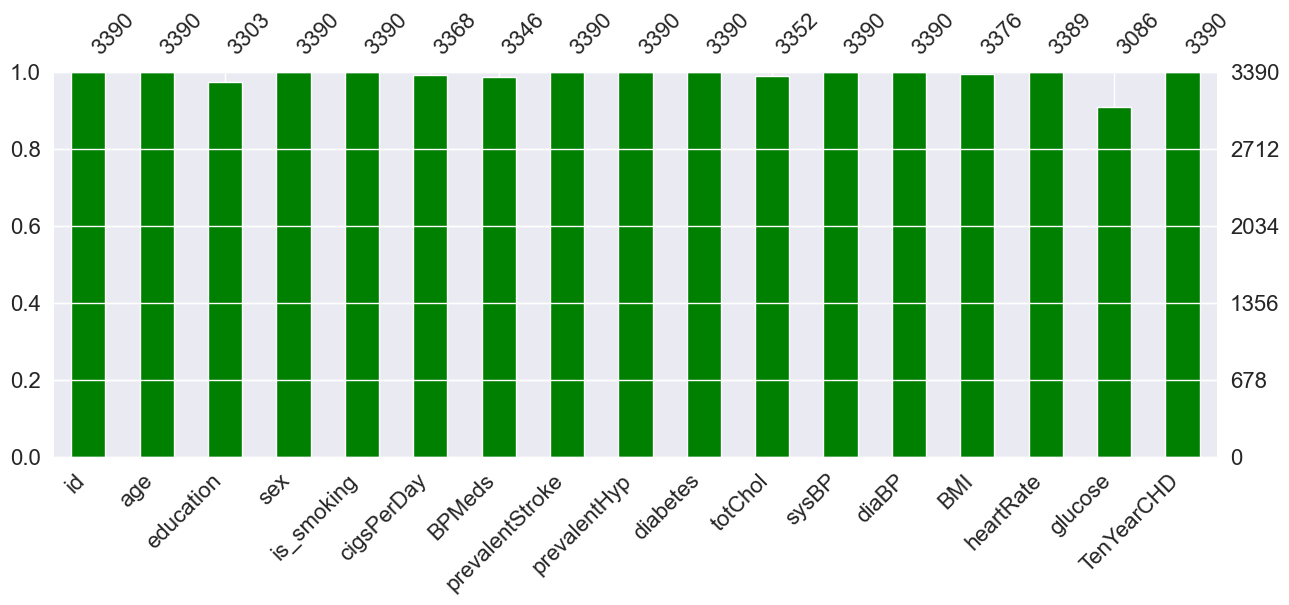

In [18]:
# Visualizing the missing values
msno.bar(data,figsize=(15,5), color="green")

### g) Descriptive Analysis on Numerical Attributes


In [19]:
data.describe().T

count         mean         std     min     25%      50%  \
id               3390.0  1694.500000  978.753033    0.00  847.25  1694.50   
age              3390.0    49.542183    8.592878   32.00   42.00    49.00   
education        3303.0     1.970936    1.019081    1.00    1.00     2.00   
cigsPerDay       3368.0     9.069477   11.879078    0.00    0.00     0.00   
BPMeds           3346.0     0.029886    0.170299    0.00    0.00     0.00   
prevalentStroke  3390.0     0.006490    0.080309    0.00    0.00     0.00   
prevalentHyp     3390.0     0.315339    0.464719    0.00    0.00     0.00   
diabetes         3390.0     0.025664    0.158153    0.00    0.00     0.00   
totChol          3352.0   237.074284   45.247430  107.00  206.00   234.00   
sysBP            3390.0   132.601180   22.292030   83.50  117.00   128.50   
diaBP            3390.0    82.883038   12.023581   48.00   74.50    82.00   
BMI              3376.0    25.794964    4.115449   15.96   23.02    25.38   
heartRate        3389.0    75.977279   11.971868   45.00   68.00    75.00   
glucose          3086.0    82.086520   24.244753   40.00   71.00    78.00   
TenYearCHD       3390.0     0.150737    0.357846    0.00    0.00     0.00   

                     75%     max  
id               2541.75  3389.0  
age                56.00    70.0  
education           3.00     4.0  
cigsPerDay         20.00    70.0  
BPMeds              0.00     1.0  
prevalentStroke     0.00     1.0  
prevalentHyp        1.00     1.0  
diabetes            0.00     1.0  
totChol           264.00   696.0  
sysBP             144.00   295.0  
diaBP              90.00   142.5  
BMI                28.04    56.8  
heartRate          83.00   143.0  
glucose            87.00   394.0  
TenYearCHD          0.00     1.0

### h) Descriptive Analysis on Categorical Attributes

In [20]:
data.describe(include="O").T

count unique top  freq
sex         3390      2   F  1923
is_smoking  3390      2  NO  1703

### i) Checking Unique Values on Categorical Attributes


In [21]:
# Calculate the number of unique values in each column
for column in data.columns:
    print(f"{column} - Number of unique values : {data[column].nunique()}")
    print("=============================================================")

id - Number of unique values : 3390
age - Number of unique values : 39
education - Number of unique values : 4
sex - Number of unique values : 2
is_smoking - Number of unique values : 2
cigsPerDay - Number of unique values : 32
BPMeds - Number of unique values : 2
prevalentStroke - Number of unique values : 2
prevalentHyp - Number of unique values : 2
diabetes - Number of unique values : 2
totChol - Number of unique values : 240
sysBP - Number of unique values : 226
diaBP - Number of unique values : 142
BMI - Number of unique values : 1259
heartRate - Number of unique values : 68
glucose - Number of unique values : 132
TenYearCHD - Number of unique values : 2


In [22]:
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {data[i].unique()}")
    print(data[i].value_counts())
    print("===================================================================================")

education : [ 2.  4.  1.  3. nan]
education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64
sex : ['F' 'M']
sex
F    1923
M    1467
Name: count, dtype: int64
is_smoking : ['YES' 'NO']
is_smoking
NO     1703
YES    1687
Name: count, dtype: int64
BPMeds : [ 0. nan  1.]
BPMeds
0.0    3246
1.0     100
Name: count, dtype: int64
prevalentStroke : [0 1]
prevalentStroke
0    3368
1      22
Name: count, dtype: int64
prevalentHyp : [0 1]
prevalentHyp
0    2321
1    1069
Name: count, dtype: int64
diabetes : [0 1]
diabetes
0    3303
1      87
Name: count, dtype: int64


### k) Checking Duplicate values

In [23]:
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups]

No of duplicate rows = 0


Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

### l) Checking Outliers

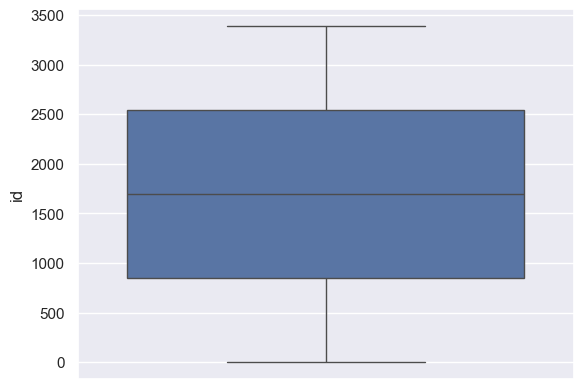

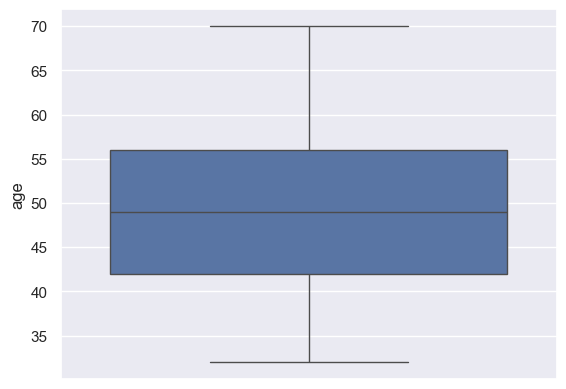

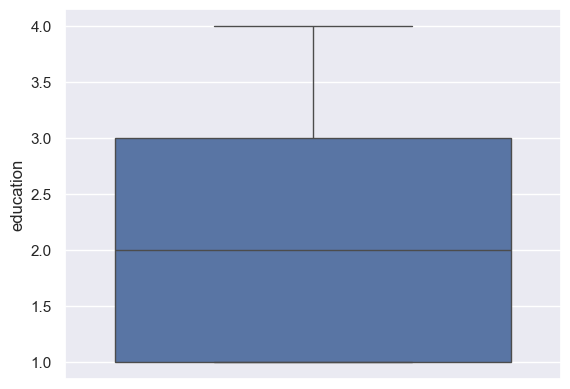

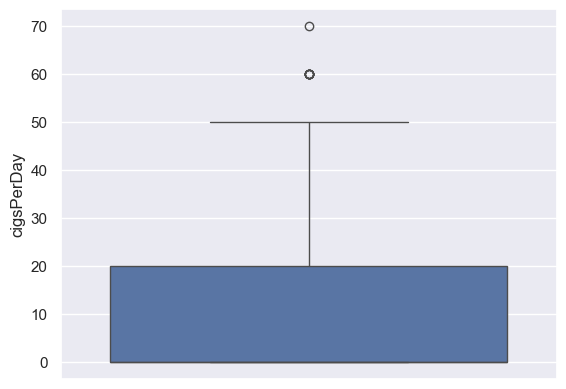

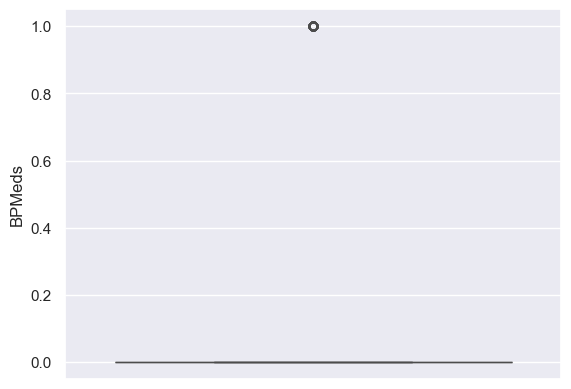

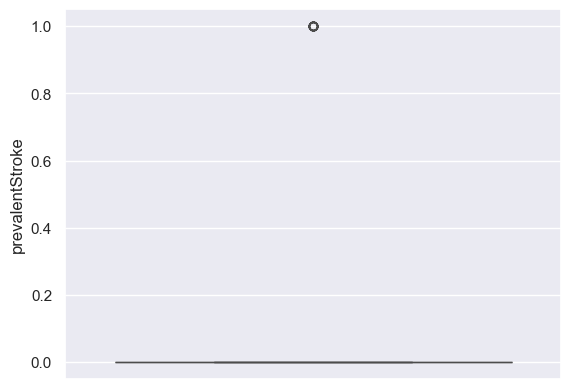

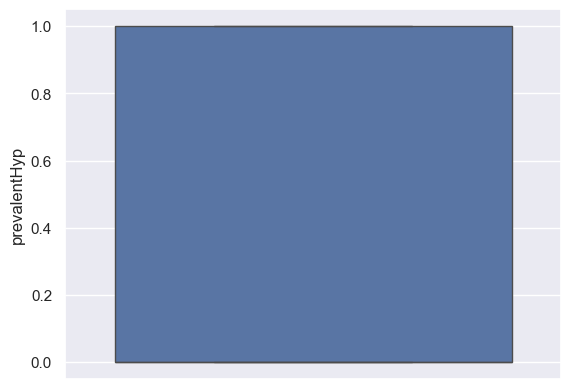

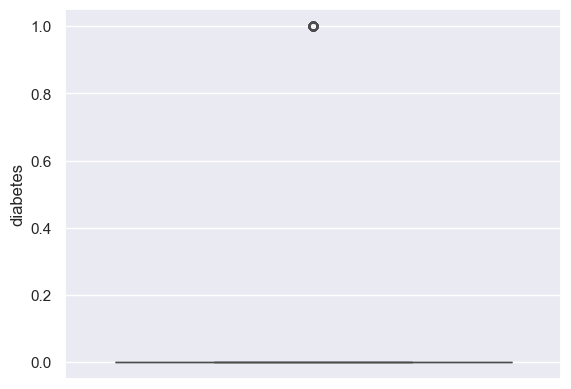

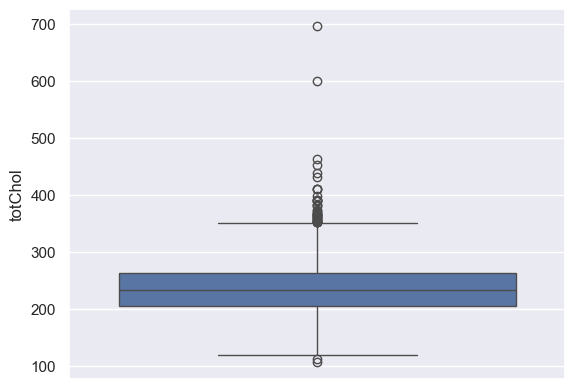

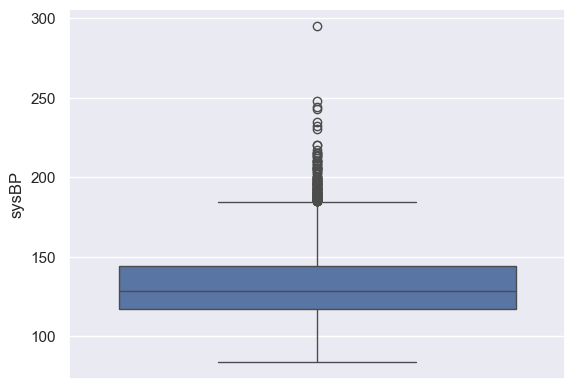

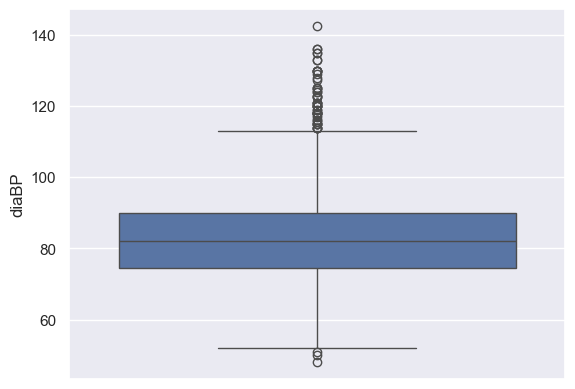

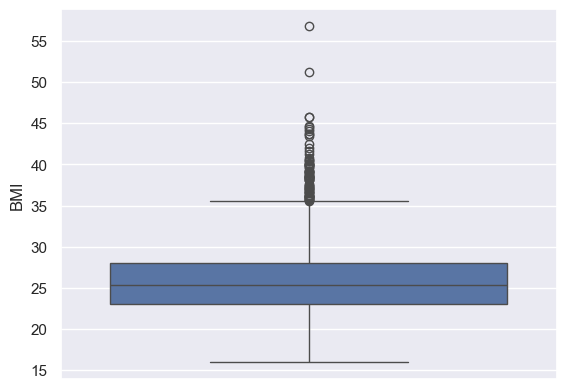

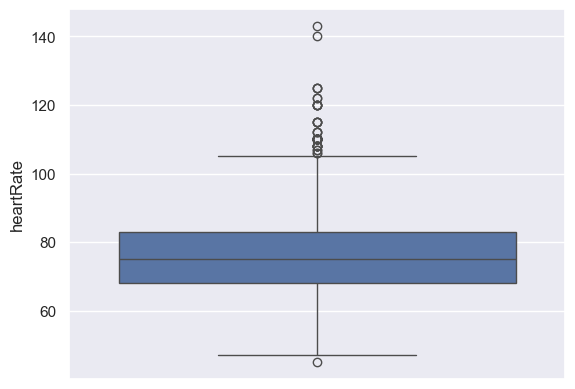

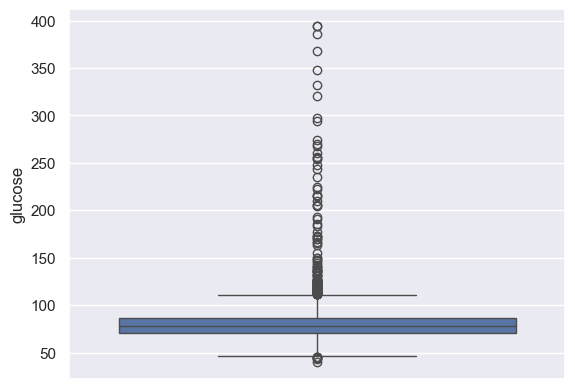

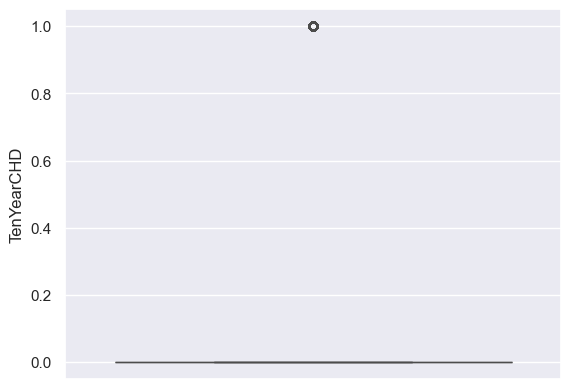

In [24]:
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns):
    boxplots(i)

### m) Checking the correlation between each feature.

<Axes: >

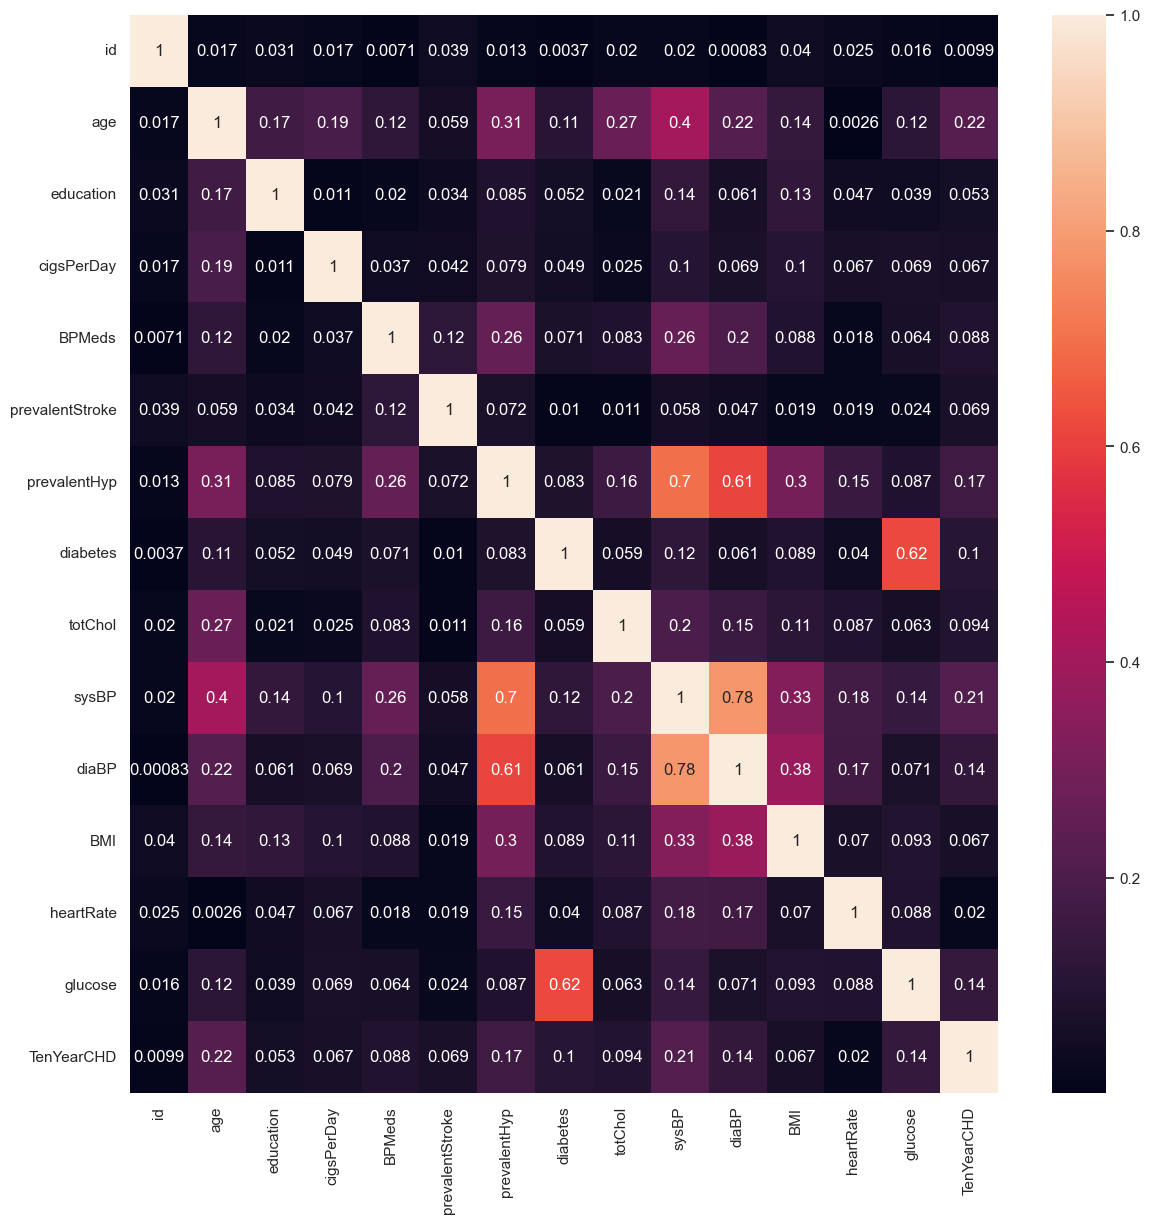

In [25]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = data.corr(numeric_only=True)
sns.heatmap(abs(correlation), annot=True)

# Explaratory Data Analysis

In [26]:
data1 = data.copy()
data2 = data.copy()
data1.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [27]:
# Labelling Categories in Numerical Features
data1["education"] = data1["education"].replace({1:"Higher Secorndary(1)", 2:"Graduate(2)", 3:"Post Graduate(3)", 4:"Doctarte or PHD(4)"})
data1["BPMeds"] = data1["BPMeds"].replace({0:"No(0)", 1:"Yes(1)"})
data1["prevalentStroke"] = data1["prevalentStroke"].replace({0:"No(0)", 1:"Yes(1)"})
data1["prevalentHyp"] = data1["prevalentHyp"].replace({0:"No(0)", 1:"Yes(1)"})
data1["diabetes"] = data1["diabetes"].replace({0:"No(0)", 1:"Yes(1)"})
# data1["TenYearCHD"] = data1["TenYearCHD"].replace({0:"No(0)", 1:"Yes(1)"})

In [28]:
print("Is there any missing value present or not ?", data1.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data1.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? True
**************************************************


Total No. of Missing Values  % of Missing Values
id                                         0                 0.00
age                                        0                 0.00
education                                 87                 2.57
sex                                        0                 0.00
is_smoking                                 0                 0.00
cigsPerDay                                22                 0.65
BPMeds                                    44                 1.30
prevalentStroke                            0                 0.00
prevalentHyp                               0                 0.00
diabetes                                   0                 0.00
totChol                                   38                 1.12
sysBP                                      0                 0.00
diaBP                                      0                 0.00
BMI                                       14                 0.41
heartRate                                  1                 0.03
glucose                                  304                 8.97
TenYearCHD                                 0                 0.00

In [29]:
data1.head()

id  age             education sex is_smoking  cigsPerDay BPMeds  \
0   0   64           Graduate(2)   F        YES         3.0  No(0)   
1   1   36    Doctarte or PHD(4)   M         NO         0.0  No(0)   
2   2   46  Higher Secorndary(1)   F        YES        10.0  No(0)   
3   3   50  Higher Secorndary(1)   M        YES        20.0  No(0)   
4   4   64  Higher Secorndary(1)   F        YES        30.0  No(0)   

  prevalentStroke prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
0           No(0)        No(0)    No(0)    221.0  148.0   85.0    NaN   
1           No(0)       Yes(1)    No(0)    212.0  168.0   98.0  29.77   
2           No(0)        No(0)    No(0)    250.0  116.0   71.0  20.35   
3           No(0)       Yes(1)    No(0)    233.0  158.0   88.0  28.26   
4           No(0)        No(0)    No(0)    241.0  136.5   85.0  26.42   

   heartRate  glucose  TenYearCHD  
0       90.0     80.0           1  
1       72.0     75.0           0  
2       88.0     94.0           0  
3       68.0     94.0           1  
4       70.0     77.0           0

In [30]:
data1[pd.isnull(data1["glucose"])]

id  age             education sex is_smoking  cigsPerDay  BPMeds  \
9        9   55           Graduate(2)   F         NO         0.0   No(0)   
10      10   61  Higher Secorndary(1)   F         NO         0.0   No(0)   
36      36   46      Post Graduate(3)   F         NO         0.0   No(0)   
38      38   41           Graduate(2)   F        YES         9.0  Yes(1)   
55      55   51           Graduate(2)   F         NO         0.0   No(0)   
81      81   41    Doctarte or PHD(4)   M        YES        40.0   No(0)   
95      95   40      Post Graduate(3)   F         NO         0.0   No(0)   
120    120   65                   NaN   F         NO         0.0   No(0)   
136    136   38      Post Graduate(3)   F         NO         0.0   No(0)   
138    138   53      Post Graduate(3)   F         NO         0.0   No(0)   
170    170   41      Post Graduate(3)   F         NO         0.0   No(0)   
186    186   43    Doctarte or PHD(4)   M         NO         0.0   No(0)   
197    197   34                   NaN   F        YES        10.0   No(0)   
202    202   42  Higher Secorndary(1)   M        YES        30.0   No(0)   
204    204   59    Doctarte or PHD(4)   F         NO         0.0  Yes(1)   
225    225   48           Graduate(2)   M         NO         0.0   No(0)   
241    241   41  Higher Secorndary(1)   M        YES        40.0   No(0)   
254    254   52  Higher Secorndary(1)   F         NO         0.0   No(0)   
260    260   39      Post Graduate(3)   F        YES         5.0   No(0)   
270    270   61  Higher Secorndary(1)   F        YES         5.0   No(0)   
271    271   47           Graduate(2)   F         NO         0.0   No(0)   
290    290   37           Graduate(2)   F        YES        30.0   No(0)   
323    323   45    Doctarte or PHD(4)   M        YES        20.0   No(0)   
326    326   54  Higher Secorndary(1)   F        YES         5.0   No(0)   
329    329   52  Higher Secorndary(1)   F         NO         0.0   No(0)   
341    341   53  Higher Secorndary(1)   F         NO         0.0   No(0)   
349    349   52    Doctarte or PHD(4)   F         NO         0.0   No(0)   
369    369   51  Higher Secorndary(1)   F         NO         0.0   No(0)   
379    379   54           Graduate(2)   M         NO         0.0   No(0)   
411    411   49      Post Graduate(3)   F         NO         0.0   No(0)   
414    414   45  Higher Secorndary(1)   F        YES         5.0   No(0)   
419    419   58           Graduate(2)   F         NO         0.0   No(0)   
441    441   35           Graduate(2)   M         NO         0.0   No(0)   
445    445   39           Graduate(2)   F        YES         9.0   No(0)   
469    469   42  Higher Secorndary(1)   M        YES         NaN   No(0)   
474    474   42           Graduate(2)   F         NO         0.0   No(0)   
482    482   49           Graduate(2)   M        YES        60.0   No(0)   
492    492   51      Post Graduate(3)   F        YES        10.0   No(0)   
498    498   37    Doctarte or PHD(4)   F         NO         0.0   No(0)   
541    541   52      Post Graduate(3)   F         NO         0.0   No(0)   
542    542   49           Graduate(2)   F        YES        20.0   No(0)   
554    554   38      Post Graduate(3)   F        YES         3.0  Yes(1)   
570    570   56  Higher Secorndary(1)   M         NO         0.0   No(0)   
572    572   51    Doctarte or PHD(4)   M         NO         0.0   No(0)   
596    596   58  Higher Secorndary(1)   F        YES        15.0   No(0)   
625    625   62           Graduate(2)   F        YES        30.0   No(0)   
634    634   46  Higher Secorndary(1)   F         NO         0.0   No(0)   
643    643   49  Higher Secorndary(1)   F         NO         0.0   No(0)   
644    644   47      Post Graduate(3)   F        YES         5.0   No(0)   
649    649   61  Higher Secorndary(1)   M         NO         0.0   No(0)   
666    666   44  Higher Secorndary(1)   F         NO         0.0   No(0)   
678    678   54  Higher Secorndary(1)   F         NO    

In [31]:
data1[pd.isnull(data1["education"])]

id  age education sex is_smoking  cigsPerDay  BPMeds prevalentStroke  \
49      49   46       NaN   F        YES        20.0   No(0)           No(0)   
62      62   52       NaN   F         NO         0.0   No(0)           No(0)   
69      69   65       NaN   M         NO         0.0   No(0)           No(0)   
104    104   57       NaN   F         NO         0.0  Yes(1)           No(0)   
120    120   65       NaN   F         NO         0.0   No(0)           No(0)   
133    133   61       NaN   M        YES         5.0   No(0)           No(0)   
187    187   51       NaN   M         NO         0.0   No(0)           No(0)   
197    197   34       NaN   F        YES        10.0   No(0)           No(0)   
353    353   56       NaN   F        YES         5.0   No(0)           No(0)   
512    512   51       NaN   M        YES         9.0   No(0)           No(0)   
516    516   40       NaN   F        YES         9.0   No(0)           No(0)   
540    540   38       NaN   F        YES         5.0   No(0)           No(0)   
550    550   41       NaN   M         NO         0.0   No(0)           No(0)   
639    639   48       NaN   F         NO         0.0   No(0)           No(0)   
647    647   51       NaN   F        YES        15.0   No(0)           No(0)   
660    660   44       NaN   M        YES        40.0   No(0)           No(0)   
692    692   55       NaN   F         NO         0.0   No(0)           No(0)   
709    709   48       NaN   M         NO         0.0   No(0)           No(0)   
760    760   55       NaN   F         NO         0.0   No(0)           No(0)   
761    761   53       NaN   F         NO         0.0   No(0)           No(0)   
776    776   47       NaN   M         NO         0.0   No(0)           No(0)   
780    780   39       NaN   F         NO         0.0   No(0)           No(0)   
801    801   56       NaN   M         NO         0.0   No(0)           No(0)   
866    866   64       NaN   M         NO         0.0   No(0)           No(0)   
897    897   45       NaN   F        YES        20.0   No(0)           No(0)   
938    938   52       NaN   M         NO         0.0   No(0)           No(0)   
1007  1007   61       NaN   F         NO         0.0   No(0)           No(0)   
1050  1050   44       NaN   F        YES        30.0   No(0)           No(0)   
1065  1065   43       NaN   F        YES        20.0   No(0)           No(0)   
1072  1072   55       NaN   F         NO         0.0   No(0)           No(0)   
1151  1151   63       NaN   M        YES        10.0   No(0)           No(0)   
1321  1321   60       NaN   M        YES        20.0   No(0)           No(0)   
1329  1329   44       NaN   M        YES         4.0   No(0)           No(0)   
1334  1334   59       NaN   M        YES        20.0   No(0)           No(0)   
1336  1336   46       NaN   M         NO         0.0   No(0)           No(0)   
1353  1353   37       NaN   F        YES        20.0   No(0)           No(0)   
1392  1392   50       NaN   M         NO         0.0   No(0)           No(0)   
1412  1412   38       NaN   M         NO         0.0   No(0)           No(0)   
1437  1437   64       NaN   F         NO         0.0   No(0)           No(0)   
1448  1448   55       NaN   F         NO         0.0  Yes(1)           No(0)   
1491  1491   36       NaN   M        YES        20.0   No(0)           No(0)   
1494  1494   35       NaN   M         NO         0.0   No(0)           No(0)   
1502  1502   48       NaN   M        YES        40.0   No(0)           No(0)   
1548  1548   63       NaN   M         NO         0.0   No(0)           No(0)   
1562  1562   49       NaN   F         NO         0.0   No(0)           No(0)   
1597  1597   57       NaN   F        YES         NaN   No(0)           No(0)   
1640  1640   51       NaN   M         NO         0.0   No(0)           No(0)   
1667  1667   49       NaN   F         NO         0.0   No(0)           No(0)   
1730  1730   38       NaN   M        YES        25.0   No(0)           No(0)   
1752  17

In [32]:
data1[pd.isnull(data1["BPMeds"])]

id  age             education sex is_smoking  cigsPerDay BPMeds  \
8        8   41           Graduate(2)   F        YES        20.0    NaN   
102    102   68           Graduate(2)   F         NO         0.0    NaN   
128    128   67           Graduate(2)   F         NO         0.0    NaN   
174    174   60  Higher Secorndary(1)   F         NO         0.0    NaN   
194    194   56  Higher Secorndary(1)   F         NO         0.0    NaN   
265    265   41  Higher Secorndary(1)   F         NO         0.0    NaN   
304    304   47      Post Graduate(3)   F        YES         9.0    NaN   
656    656   37      Post Graduate(3)   F         NO         0.0    NaN   
863    863   53      Post Graduate(3)   F         NO         0.0    NaN   
864    864   40           Graduate(2)   F         NO         0.0    NaN   
881    881   59    Doctarte or PHD(4)   F         NO         0.0    NaN   
923    923   52  Higher Secorndary(1)   F         NO         0.0    NaN   
957    957   41  Higher Secorndary(1)   M        YES        15.0    NaN   
1069  1069   54    Doctarte or PHD(4)   M        YES        30.0    NaN   
1148  1148   36      Post Graduate(3)   M        YES        20.0    NaN   
1288  1288   45      Post Graduate(3)   M        YES        40.0    NaN   
1367  1367   66  Higher Secorndary(1)   F         NO         0.0    NaN   
1374  1374   57  Higher Secorndary(1)   F         NO         0.0    NaN   
1529  1529   44      Post Graduate(3)   F        YES        20.0    NaN   
1700  1700   58  Higher Secorndary(1)   M        YES        30.0    NaN   
1769  1769   57    Doctarte or PHD(4)   F         NO         0.0    NaN   
1794  1794   59  Higher Secorndary(1)   F        YES        20.0    NaN   
1858  1858   63           Graduate(2)   F         NO         0.0    NaN   
1862  1862   65  Higher Secorndary(1)   F         NO         0.0    NaN   
1918  1918   57  Higher Secorndary(1)   F         NO         0.0    NaN   
1919  1919   45           Graduate(2)   M        YES        10.0    NaN   
1955  1955   62      Post Graduate(3)   F         NO         0.0    NaN   
2044  2044   43      Post Graduate(3)   F        YES        10.0    NaN   
2057  2057   60  Higher Secorndary(1)   F         NO         0.0    NaN   
2159  2159   61  Higher Secorndary(1)   F         NO         0.0    NaN   
2244  2244   40  Higher Secorndary(1)   F        YES        50.0    NaN   
2435  2435   48           Graduate(2)   F        YES        20.0    NaN   
2453  2453   67  Higher Secorndary(1)   F        YES         6.0    NaN   
2540  2540   41  Higher Secorndary(1)   F        YES        20.0    NaN   
2644  2644   65           Graduate(2)   F         NO         0.0    NaN   
2659  2659   56  Higher Secorndary(1)   M        YES        20.0    NaN   
2906  2906   57    Doctarte or PHD(4)   M         NO         0.0    NaN   
2940  2940   50    Doctarte or PHD(4)   M        YES         9.0    NaN   
2956  2956   59  Higher Secorndary(1)   F        YES         3.0    NaN   
3013  3013   55  Higher Secorndary(1)   F         NO         0.0    NaN   
3120  3120   52      Post Graduate(3)   F        YES         9.0    NaN   
3201  3201   66  Higher Secorndary(1)   F         NO         0.0    NaN   
3281  3281   55  Higher Secorndary(1)   M        YES         3.0    NaN   
3388  3388   60  Higher Secorndary(1)   M         NO         0.0    NaN   

     prevalentStroke prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
8              No(0)        No(0)    No(0)    220.0  126.0   78.0  20.70   
102            No(0)        No(0)    No(0)    257.0  144.0   95.0  29.25   
128            No(0)        No(0)    No(0)    261.0  117.0   63.0  22.55   
174            No(0)       Yes(1)    No(0)    273.0  176.0   84.0  22.17   
194            No(0)       Yes(1)    No(0)    391.0  126.0   84.0  24.83   
265            No(0)        No(0)    No(0)    179.0  121.0   83.0  23.04   
304            No(0)        No(0)    No(0)    221.0  127.5   75.0  23.78   
656            No(0)    

In [33]:
data1[pd.isnull(data1["totChol"])]

id  age             education sex is_smoking  cigsPerDay  BPMeds  \
10      10   61  Higher Secorndary(1)   F         NO         0.0   No(0)   
69      69   65                   NaN   M         NO         0.0   No(0)   
254    254   52  Higher Secorndary(1)   F         NO         0.0   No(0)   
290    290   37           Graduate(2)   F        YES        30.0   No(0)   
554    554   38      Post Graduate(3)   F        YES         3.0  Yes(1)   
625    625   62           Graduate(2)   F        YES        30.0   No(0)   
700    700   44           Graduate(2)   F        YES         9.0   No(0)   
732    732   61  Higher Secorndary(1)   F         NO         0.0   No(0)   
797    797   58  Higher Secorndary(1)   M         NO         0.0   No(0)   
808    808   47           Graduate(2)   F        YES        20.0   No(0)   
1103  1103   58  Higher Secorndary(1)   F        YES        20.0   No(0)   
1219  1219   62    Doctarte or PHD(4)   F         NO         0.0   No(0)   
1234  1234   52    Doctarte or PHD(4)   F        YES        20.0   No(0)   
1267  1267   49           Graduate(2)   F        YES        15.0   No(0)   
1298  1298   58  Higher Secorndary(1)   F        YES         8.0  Yes(1)   
1347  1347   48  Higher Secorndary(1)   F        YES        20.0   No(0)   
1493  1493   54  Higher Secorndary(1)   F        YES        20.0   No(0)   
1695  1695   59  Higher Secorndary(1)   F         NO         0.0   No(0)   
1753  1753   40           Graduate(2)   F        YES        15.0   No(0)   
1756  1756   58      Post Graduate(3)   F         NO         0.0   No(0)   
1776  1776   39           Graduate(2)   F        YES        40.0   No(0)   
1780  1780   47      Post Graduate(3)   F        YES        20.0   No(0)   
1804  1804   43    Doctarte or PHD(4)   M        YES        30.0   No(0)   
1856  1856   39           Graduate(2)   F        YES        40.0   No(0)   
1994  1994   48  Higher Secorndary(1)   F        YES         2.0   No(0)   
2254  2254   52  Higher Secorndary(1)   F         NO         0.0   No(0)   
2398  2398   64  Higher Secorndary(1)   F        YES        10.0   No(0)   
2453  2453   67  Higher Secorndary(1)   F        YES         6.0     NaN   
2590  2590   50      Post Graduate(3)   F         NO         0.0   No(0)   
2596  2596   58           Graduate(2)   F        YES         3.0   No(0)   
2651  2651   48           Graduate(2)   F        YES        20.0   No(0)   
2884  2884   51      Post Graduate(3)   F        YES        43.0   No(0)   
3003  3003   40           Graduate(2)   F         NO         0.0   No(0)   
3022  3022   52  Higher Secorndary(1)   F         NO         0.0  Yes(1)   
3129  3129   40           Graduate(2)   F        YES         3.0   No(0)   
3154  3154   50  Higher Secorndary(1)   F         NO         0.0   No(0)   
3239  3239   67  Higher Secorndary(1)   F        YES         9.0   No(0)   
3290  3290   67  Higher Secorndary(1)   F         NO         0.0   No(0)   

     prevalentStroke prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
10             No(0)       Yes(1)    No(0)      NaN  185.0  121.0  35.22   
69             No(0)        No(0)    No(0)      NaN  152.5   97.5  28.35   
254            No(0)        No(0)    No(0)      NaN  129.0   83.0  32.57   
290            No(0)        No(0)    No(0)      NaN  115.0   79.0  28.41   
554            No(0)       Yes(1)    No(0)      NaN  125.0   80.0  22.79   
625            No(0)        No(0)    No(0)      NaN  153.0   60.0  27.47   
700            No(0)       Yes(1)    No(0)      NaN  147.5   96.0  30.57   
732            No(0)        No(0)    No(0)      NaN  115.0   60.0  25.50   
797            No(0)        No(0)    No(0)      NaN  116.5   71.0  27.04   
808            No(0)        No(0)    No(0)      NaN  121.0   70.0  23.09   
1103           No(0)        No(0)    No(0)      NaN  126.0   77.0  30.08   
1219           No(0)        No(0)    No(0)      NaN  122.0   75.5  23.03   
1234           No(0)        No(0)    No(0)      NaN  11

In [34]:
data1[pd.isnull(data1["cigsPerDay"])]

id  age             education sex is_smoking  cigsPerDay BPMeds  \
422    422   55  Higher Secorndary(1)   F        YES         NaN  No(0)   
466    466   45      Post Graduate(3)   M        YES         NaN  No(0)   
469    469   42  Higher Secorndary(1)   M        YES         NaN  No(0)   
491    491   61  Higher Secorndary(1)   F        YES         NaN  No(0)   
538    538   41  Higher Secorndary(1)   F        YES         NaN  No(0)   
767    767   54  Higher Secorndary(1)   M        YES         NaN  No(0)   
1461  1461   47           Graduate(2)   F        YES         NaN  No(0)   
1467  1467   49  Higher Secorndary(1)   F        YES         NaN  No(0)   
1597  1597   57                   NaN   F        YES         NaN  No(0)   
1986  1986   49           Graduate(2)   F        YES         NaN  No(0)   
2031  2031   58    Doctarte or PHD(4)   F        YES         NaN  No(0)   
2087  2087   49    Doctarte or PHD(4)   M        YES         NaN  No(0)   
2240  2240   47      Post Graduate(3)   F        YES         NaN  No(0)   
2284  2284   45           Graduate(2)   M        YES         NaN  No(0)   
2527  2527   58           Graduate(2)   M        YES         NaN  No(0)   
2638  2638   57                   NaN   M        YES         NaN  No(0)   
2648  2648   39           Graduate(2)   M        YES         NaN  No(0)   
2723  2723   43    Doctarte or PHD(4)   M        YES         NaN  No(0)   
2879  2879   42  Higher Secorndary(1)   M        YES         NaN  No(0)   
2945  2945   53           Graduate(2)   M        YES         NaN  No(0)   
3301  3301   55  Higher Secorndary(1)   M        YES         NaN  No(0)   
3378  3378   39      Post Graduate(3)   F        YES         NaN  No(0)   

     prevalentStroke prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
422            No(0)       Yes(1)    No(0)    213.0  163.0   91.0  28.66   
466            No(0)       Yes(1)    No(0)    170.0  145.5   99.0  26.74   
469            No(0)        No(0)    No(0)    196.0  123.0   73.0  22.06   
491            No(0)       Yes(1)    No(0)    356.0  168.0   98.0  27.30   
538            No(0)        No(0)    No(0)    171.0  135.0   82.5  24.35   
767            No(0)        No(0)    No(0)    219.0  110.0   72.0  26.05   
1461           No(0)        No(0)    No(0)    365.0  127.0   76.0  24.44   
1467           No(0)        No(0)    No(0)    252.0  123.0   69.0  21.45   
1597           No(0)        No(0)    No(0)    229.0  115.0   69.0  24.43   
1986           No(0)       Yes(1)    No(0)    233.0  158.0  102.0  25.31   
2031           No(0)       Yes(1)    No(0)    270.0  195.0  117.5  23.35   
2087           No(0)        No(0)    No(0)    256.0  127.5   81.5  28.21   
2240           No(0)        No(0)    No(0)    321.0  132.0   88.0  28.14   
2284           No(0)        No(0)    No(0)    248.0  121.0   72.0  27.88   
2527           No(0)        No(0)    No(0)    235.0  127.5   76.0  21.02   
2638           No(0)        No(0)    No(0)    223.0  107.5   72.5  24.74   
2648           No(0)        No(0)    No(0)    285.0  121.0   82.0  27.62   
2723           No(0)        No(0)    No(0)    222.0  109.5   69.0  25.50   
2879           No(0)        No(0)    No(0)    226.0  119.0   80.0  25.29   
2945           No(0)        No(0)    No(0)    276.0  130.0   86.0  24.21   
3301           No(0)        No(0)    No(0)    214.0  132.5   85.5  29.25   
3378           No(0)        No(0)    No(0)    197.0  126.5   76.5  19.71   

      heartRate  glucose  TenYearCHD  
422        69.0     66.0           0  
466        83.0     85.0           0  
469        66.0      NaN           0  
491       103.0    106.0           0  
538        79.0     82.0           0  
767        95.0     86.0           0  
1461       72.0     80.0           0  
1467       72.0     89.0           0  
1597       80.0     93.0           0  
1986       90.0     72.0           0  
2031       75.0      NaN           0  
2087       93.0     85.0           1  
2240       90.0     74.0  

In [35]:
data1[pd.isnull(data1["BMI"])]

id  age             education sex is_smoking  cigsPerDay BPMeds  \
0        0   64           Graduate(2)   F        YES         3.0  No(0)   
54      54   63  Higher Secorndary(1)   M        YES        20.0  No(0)   
271    271   47           Graduate(2)   F         NO         0.0  No(0)   
720    720   61  Higher Secorndary(1)   F         NO         0.0  No(0)   
1057  1057   64           Graduate(2)   M        YES        20.0  No(0)   
1875  1875   47  Higher Secorndary(1)   F        YES        25.0  No(0)   
1895  1895   38    Doctarte or PHD(4)   M        YES        20.0  No(0)   
1947  1947   65  Higher Secorndary(1)   M         NO         0.0  No(0)   
2231  2231   70  Higher Secorndary(1)   F         NO         0.0  No(0)   
2385  2385   58  Higher Secorndary(1)   F        YES         1.0  No(0)   
2626  2626   39    Doctarte or PHD(4)   F         NO         0.0  No(0)   
2689  2689   45      Post Graduate(3)   F         NO         0.0  No(0)   
2991  2991   40           Graduate(2)   F         NO         0.0  No(0)   
3331  3331   40                   NaN   M        YES        20.0  No(0)   

     prevalentStroke prevalentHyp diabetes  totChol  sysBP  diaBP  BMI  \
0              No(0)        No(0)    No(0)    221.0  148.0   85.0  NaN   
54            Yes(1)       Yes(1)    No(0)    213.0  163.0   94.0  NaN   
271            No(0)        No(0)    No(0)    195.0  126.0   75.0  NaN   
720            No(0)       Yes(1)    No(0)    300.0  150.5   89.0  NaN   
1057           No(0)        No(0)    No(0)    225.0  120.0   75.0  NaN   
1875           No(0)       Yes(1)   Yes(1)    258.0  195.0   90.0  NaN   
1895           No(0)        No(0)    No(0)    215.0  110.0   80.0  NaN   
1947           No(0)       Yes(1)   Yes(1)    240.0  235.0  100.0  NaN   
2231          Yes(1)       Yes(1)    No(0)    107.0  143.0   93.0  NaN   
2385           No(0)       Yes(1)    No(0)    244.0  160.5   98.0  NaN   
2626           No(0)        No(0)    No(0)    229.0  119.0   63.5  NaN   
2689           No(0)        No(0)    No(0)    231.0  107.5   57.5  NaN   
2991           No(0)        No(0)    No(0)    164.0  135.0   75.0  NaN   
3331           No(0)        No(0)    No(0)    266.0  101.0   73.0  NaN   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
54         76.0     69.0           1  
271        60.0      NaN           1  
720        68.0     72.0           1  
1057       70.0     94.0           0  
1875       86.0      NaN           1  
1895      100.0     73.0           0  
1947       68.0    297.0           1  
2231       68.0     62.0           1  
2385       86.0     69.0           0  
2626       76.0     83.0           0  
2689       81.0      NaN           0  
2991       75.0     85.0           0  
3331       70.0     64.0           0

In [36]:
data1[pd.isnull(data1["heartRate"])]

id  age             education sex is_smoking  cigsPerDay BPMeds  \
1388  1388   64  Higher Secorndary(1)   M        YES        18.0  No(0)   

     prevalentStroke prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
1388           No(0)       Yes(1)    No(0)    219.0  172.5   75.0  29.29   

      heartRate  glucose  TenYearCHD  
1388        NaN     91.0           1

In [37]:
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {data1[i].unique()}")
    print(data1[i].value_counts())
    print("===================================================================================")

education : ['Graduate(2)' 'Doctarte or PHD(4)' 'Higher Secorndary(1)'
 'Post Graduate(3)' nan]
education
Higher Secorndary(1)    1391
Graduate(2)              990
Post Graduate(3)         549
Doctarte or PHD(4)       373
Name: count, dtype: int64
sex : ['F' 'M']
sex
F    1923
M    1467
Name: count, dtype: int64
is_smoking : ['YES' 'NO']
is_smoking
NO     1703
YES    1687
Name: count, dtype: int64
BPMeds : ['No(0)' nan 'Yes(1)']
BPMeds
No(0)     3246
Yes(1)     100
Name: count, dtype: int64
prevalentStroke : ['No(0)' 'Yes(1)']
prevalentStroke
No(0)     3368
Yes(1)      22
Name: count, dtype: int64
prevalentHyp : ['No(0)' 'Yes(1)']
prevalentHyp
No(0)     2321
Yes(1)    1069
Name: count, dtype: int64
diabetes : ['No(0)' 'Yes(1)']
diabetes
No(0)     3303
Yes(1)      87
Name: count, dtype: int64


In [38]:
numerical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
for i in numerical_features:
    print(f"{i} : {data1[i].unique()}")
    print(f"Mean : {data1[i].mean()}")
    print(f"Median : {data1[i].median()}")
    print(f"Standard Deviation : {data1[i].std()}")
    Q1 = data1[i].quantile(0.25)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = data1[i][((data1[i]<(Q1-1.5*IQR)) | (data1[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {data1[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {data1[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

age : [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
Mean : 49.54218289085546
Median : 49.0
Standard Deviation : 8.592878051926897
Quintile1(Q1) : 42.0
Quintile1(Q3) : 56.0
IQR : 14.0
upper_bound : 77.0
lower_bound : 21.0
No. of Outliers : 0
cigsPerDay : [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
Mean : 9.069477434679335
Median : 0.0
Standard Deviation : 11.879077681778632
Quintile1(Q1) : 0.0
Quintile1(Q3) : 20.0
IQR : 20.0
upper_bound : 50.0
lower_bound : -30.0
No. of Outliers : 9
totChol : [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274

In [39]:
# Filling up the NaN values of each feature
data1['glucose'].fillna(data1['glucose'].median(), inplace=True)
data1['education'].fillna(data1['education'].mode()[0], inplace=True)
data1['BPMeds'].fillna(data1['BPMeds'].mode()[0], inplace=True)
data1['totChol'].fillna(data1['totChol'].median(), inplace=True)
data1['cigsPerDay'].fillna(data1['cigsPerDay'].median(), inplace=True)
data1['BMI'].fillna(data1['BMI'].median(), inplace=True)
data1['heartRate'].fillna(data1['heartRate'].median(), inplace=True)


In [40]:
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {data1[i].unique()}")
    print(data1[i].value_counts())
    print("===================================================================================")

education : ['Graduate(2)' 'Doctarte or PHD(4)' 'Higher Secorndary(1)'
 'Post Graduate(3)']
education
Higher Secorndary(1)    1478
Graduate(2)              990
Post Graduate(3)         549
Doctarte or PHD(4)       373
Name: count, dtype: int64
sex : ['F' 'M']
sex
F    1923
M    1467
Name: count, dtype: int64
is_smoking : ['YES' 'NO']
is_smoking
NO     1703
YES    1687
Name: count, dtype: int64
BPMeds : ['No(0)' 'Yes(1)']
BPMeds
No(0)     3290
Yes(1)     100
Name: count, dtype: int64
prevalentStroke : ['No(0)' 'Yes(1)']
prevalentStroke
No(0)     3368
Yes(1)      22
Name: count, dtype: int64
prevalentHyp : ['No(0)' 'Yes(1)']
prevalentHyp
No(0)     2321
Yes(1)    1069
Name: count, dtype: int64
diabetes : ['No(0)' 'Yes(1)']
diabetes
No(0)     3303
Yes(1)      87
Name: count, dtype: int64


In [41]:
numerical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
for i in numerical_features:
    print(f"{i} : {data1[i].unique()}")
    print(f"Mean : {data1[i].mean()}")
    print(f"Median : {data1[i].median()}")
    print(f"Standard Deviation : {data1[i].std()}")
    Q1 = data1[i].quantile(0.25)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = data1[i][((data1[i]<(Q1-1.5*IQR)) | (data1[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {data1[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {data1[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

age : [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
Mean : 49.54218289085546
Median : 49.0
Standard Deviation : 8.592878051926897
Quintile1(Q1) : 42.0
Quintile1(Q3) : 56.0
IQR : 14.0
upper_bound : 77.0
lower_bound : 21.0
No. of Outliers : 0
cigsPerDay : [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
Mean : 9.01061946902655
Median : 0.0
Standard Deviation : 11.862838839116169
Quintile1(Q1) : 0.0
Quintile1(Q3) : 20.0
IQR : 20.0
upper_bound : 50.0
lower_bound : -30.0
No. of Outliers : 9
totChol : [221. 212. 250. 233. 241. 272. 238. 295. 220. 326. 234. 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 264. 156. 260.
 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195

In [42]:
print("Is there any missing value present or not ?", data1.isnull().values.any())
print("*"*50)
#  Calculate the number of missing values in each column    
missing_df = data1.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(data))*100,2)
missing_df

Is there any missing value present or not ? False
**************************************************


Total No. of Missing Values  % of Missing Values
id                                         0                  0.0
age                                        0                  0.0
education                                  0                  0.0
sex                                        0                  0.0
is_smoking                                 0                  0.0
cigsPerDay                                 0                  0.0
BPMeds                                     0                  0.0
prevalentStroke                            0                  0.0
prevalentHyp                               0                  0.0
diabetes                                   0                  0.0
totChol                                    0                  0.0
sysBP                                      0                  0.0
diaBP                                      0                  0.0
BMI                                        0                  0.0
heartRate                                  0                  0.0
glucose                                    0                  0.0
TenYearCHD                                 0                  0.0

##### Function for Univariate Analysis

In [43]:
# Function for Univariate Analysis
def Univariate_Analysis(column_name):
    df_EDA = pd.DataFrame(sorted(list(data[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data.groupby(column_name)["TenYearCHD"].count())
    df_EDA["% of Total"] = list(data[column_name].value_counts()/data.shape[0]*100)
    df_EDA['Yes_CHD'] = list(data[data["TenYearCHD"]=="Yes(1)"].groupby(column_name)
                              ["TenYearCHD"].count())
    df_EDA['No_CHD'] = list(data[data["TenYearCHD"]=="No(0)"].groupby(column_name)
                              ["TenYearCHD"].count())
    df_EDA['%Yes_CHD'] = round(df_EDA['Accepted']/df_EDA['Total_Count']*100,3)
    df_EDA['%No_CHD'] = round(df_EDA['Rejected']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Yes_CHD'])
    plt.legend(labels=['Total','Yes_CHD'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise Yes_CHD')
    plt.show()
    
    

    return df_EDA

In [44]:
# Function for Univariate Analysis
def Univariate_Analysis1(column_name):
    df_EDA = pd.DataFrame(sorted(list(data1[column_name].unique())),columns=[column_name])
    df_EDA['Total_Count'] = list(data1.groupby(column_name)["TenYearCHD"].count())
    df_EDA["% of Total"] = list(data1[column_name].value_counts()/data1.shape[0]*100)
    df_EDA['Yes_CHD'] = list(data1[data1["TenYearCHD"]==1].groupby(column_name)
                              ["TenYearCHD"].count())
    df_EDA['No_CHD'] = list(data1[data1["TenYearCHD"]==0].groupby(column_name)
                              ["TenYearCHD"].count())
    df_EDA['%Yes_CHD'] = round(df_EDA['Yes_CHD']/df_EDA['Total_Count']*100,3)
    df_EDA['%No_CHD'] = round(df_EDA['No_CHD']/df_EDA['Total_Count']*100,3)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 6))
    plt.barh(df_EDA[column_name],df_EDA['Total_Count'])
    plt.barh(df_EDA[column_name],df_EDA['Yes_CHD'])
    plt.legend(labels=['Total','Yes_CHD'])
    plt.xlabel('Counts')
    plt.title(column_name+' wise Yes_CHD')
    plt.show()
    
    

    return df_EDA

In [45]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "TenYearCHD"):
    """A function for plotting the distribution of numerical variables and its effect on TenYearCHD"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [46]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "TenYearCHD"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="TenYearCHD",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="TenYearCHD",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "TenYearCHD")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("TenYearCHD rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(TenYearCHD)")
    plt.tight_layout()

    plt.show()

##### Function for chu-square test on categorical variables

In [47]:
# function for chi suqared test for 2 categorical  variables

def chi_sqred_ind_test(df, col1, col2, alpha=0.05, debug=True, print_result=True):
    contigency_table =  pd.crosstab(df[col1],df[col2],margins = False)
    
    if debug:
        print("Contigency table: \n" , contigency_table)
    stat, p_val, dof, expected_val = chi2_contingency(contigency_table)
    if debug:
        print("Statistic:", stat)
        print("P-value:", p_val)
        print("DOF:", dof)
    critical = chi2.ppf(1-alpha, dof)
    
    if print_result:
        if debug:
            print('probability=%.3f, critical=%.3f, stat=%.3f' % (1-alpha, critical, stat))
        if abs(stat) >= critical:
            print("Dependent (reject Null Hypothesis(H0))")
        else:
            print('Independent (fail to reject Null Hypothesis(H0))')
        if p_val <= alpha:
            print("Dependent (reject Null Hypothesis(H0))")
        else:
            print('Independent (fail to reject Null Hypothesis(H0))')
    return stat, p_val, dof

##### Function for  Hypothesis test on numerical variables

In [48]:
# Hypothesis z-test
from statsmodels.stats.weightstats import ztest as ztest

#perform two sample z-test
def Hypothesisztest(x1, x2):
    stats, p_val = ztest(x1, x2, value=0)
    print(f"Yes_mean : {x1.mean()}")
    print("*"*50)
    print(f"No_mean : {x2.mean()}")
    print("*"*50)
    print(f"Yes_std : {x1.std()}")
    print("*"*50)
    print(f"No_std : {x2.std()}")
    print("*"*50)
    print(f"stats : {stats}")
    print("*"*50)
    print(f"p_val : {p_val}")

    if p_val < 0.05:
        print("We Reject Null Hypothesis i.e means of two groups not equal")
    else:
        print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

In [49]:
# Hypothesis t-test
import scipy.stats as stats
import scipy.stats as stats


#perform two sample t-test
def Hypothesisttest(x1, x2):
    statics, p_val = stats.ttest_ind(x1, x2, equal_var=True)
    print(f"Yes_mean : {x1.mean()}")
    print("*"*50)
    print(f"No_mean : {x2.mean()}")
    print("*"*50)
    print(f"Yes_std : {x1.std()}")
    print("*"*50)
    print(f"No_std : {x2.std()}")
    print("*"*50)
    print(f"statics : {statics}")
    print("*"*50)
    print(f"p_val : {p_val}")

    if p_val < 0.05:
        print("We Reject Null Hypothesis i.e means of two groups not equal")
    else:
        print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

## Univariate Analysis

## Visualizing coupon TenYearCHD

In [50]:
class_count = data1["TenYearCHD"].value_counts()
print(class_count)
print(f"0 : {class_count[0]}, {round(class_count[0]/data1.shape[0]*100,3)}%")
print(f"1 : {class_count[1]}, {round(class_count[1]/data1.shape[0]*100,3)}%")

TenYearCHD
0    2879
1     511
Name: count, dtype: int64
0 : 2879, 84.926%
1 : 511, 15.074%


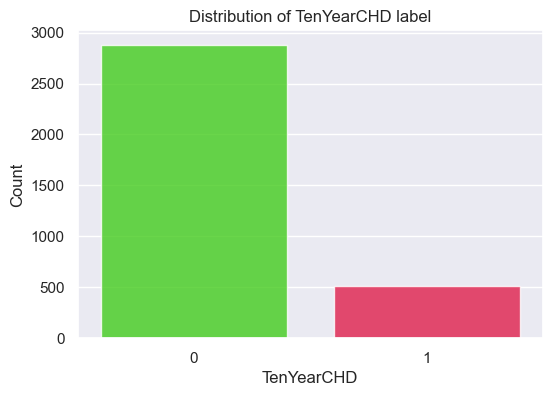

In [51]:
count = data1["TenYearCHD"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel("Count", fontsize=12)
plt.xlabel("TenYearCHD", fontsize=12)
plt.title("Distribution of TenYearCHD label")
plt.show()

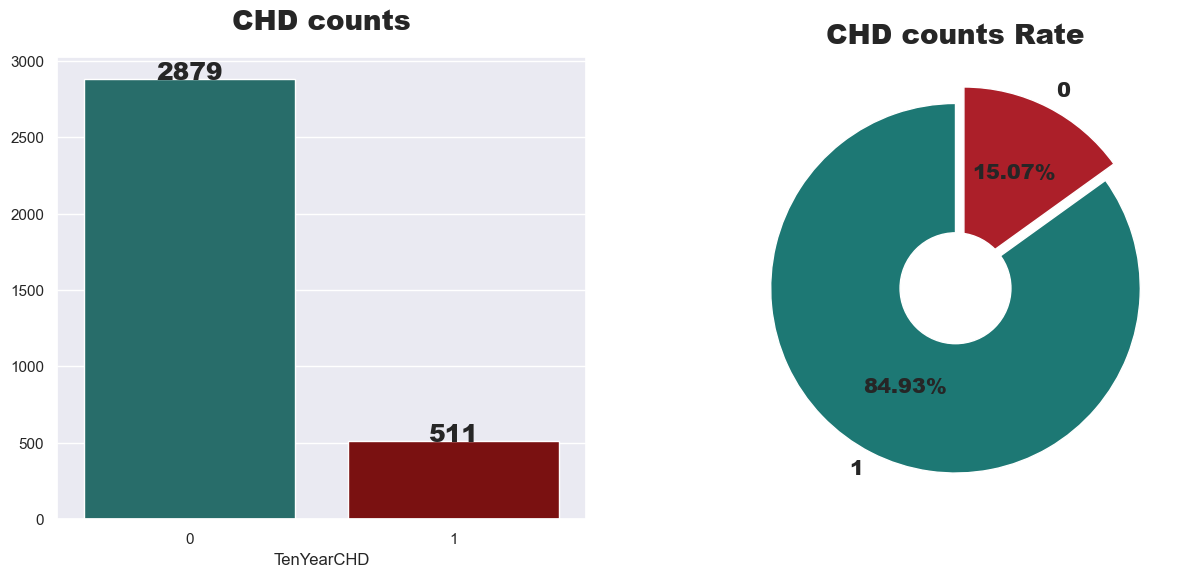

In [52]:
#Visualization to show CHD in Counts.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
accptance_rate = data1["TenYearCHD"].value_counts()
sns.barplot(x=accptance_rate.index, y=accptance_rate.values, palette=["#1d7874","#8B0000"])
plt.title("CHD counts",fontweight="black",size=20,pad=20)
# for i, v in enumerate(accptance_rate.values):
#     plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)
plt.text(0, accptance_rate.values[0], 2879, ha="center", fontweight='black', fontsize=18)
plt.text(1, accptance_rate.values[1], 511, ha="center", fontweight='black', fontsize=18)

#Visualization to show CHD in Percentage.
plt.subplot(1,2,2)
plt.pie(accptance_rate, labels=["1","0"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("CHD counts Rate",fontweight="black",size=20,pad=10)
plt.show()


**Inference:**
* Dataset is highly imbalanced.

## Visualizing age

In [53]:
data1["age"].unique()

array([64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 51, 56, 42, 38, 63, 35,
       54, 62, 47, 34, 39, 59, 45, 49, 60, 40, 52, 48, 37, 65, 57, 68, 67,
       33, 66, 69, 70, 32], dtype=int64)

In [54]:
data1["age"].nunique()

39

##### Which Age group is more vulnerable to coronary heart disease ?

Text(0.5, 1.0, 'Age Distrubution')

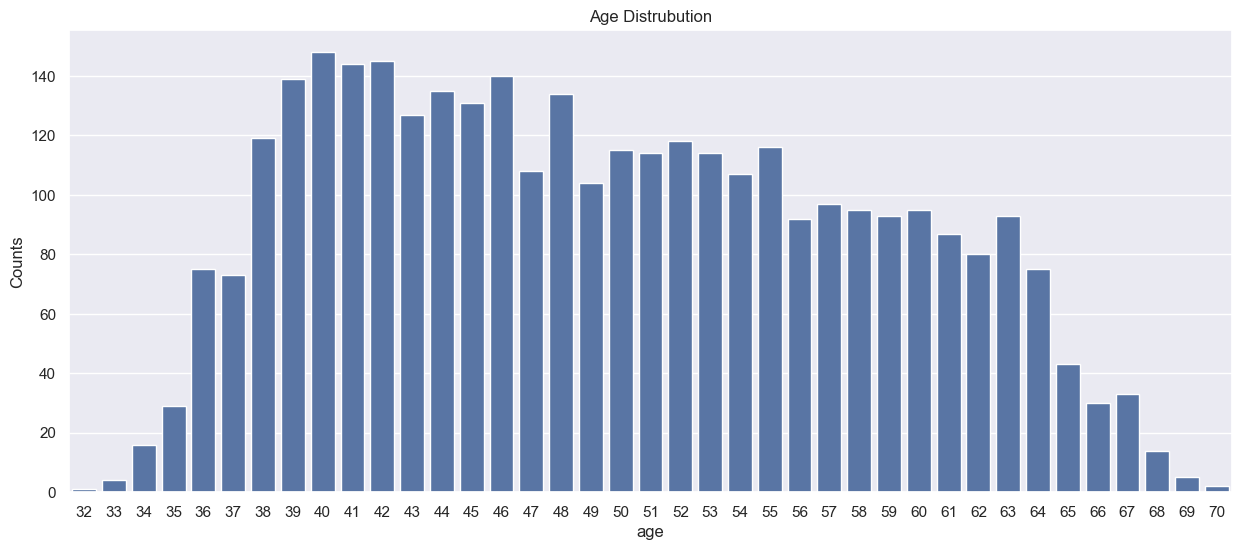

In [55]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['age'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('Age Distrubution')

* Data contains people of age from 32-70 years.

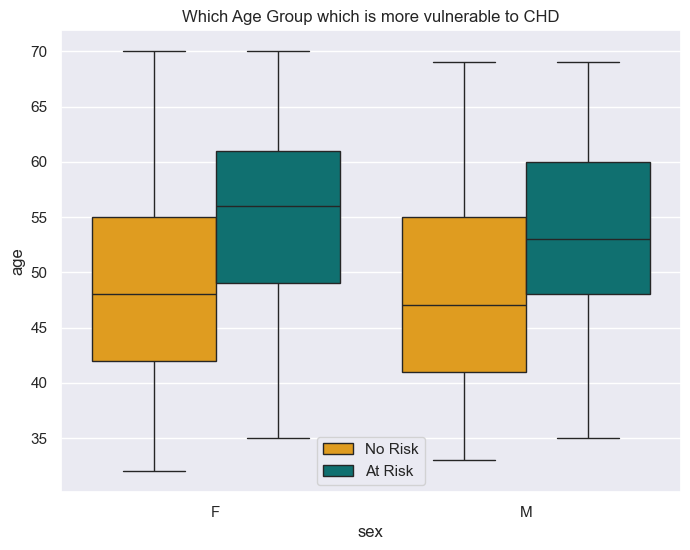

In [56]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (8,6))
ax = sns.boxplot(x = data1['sex'], y = data1['age'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

<Axes: xlabel='age', ylabel='count'>

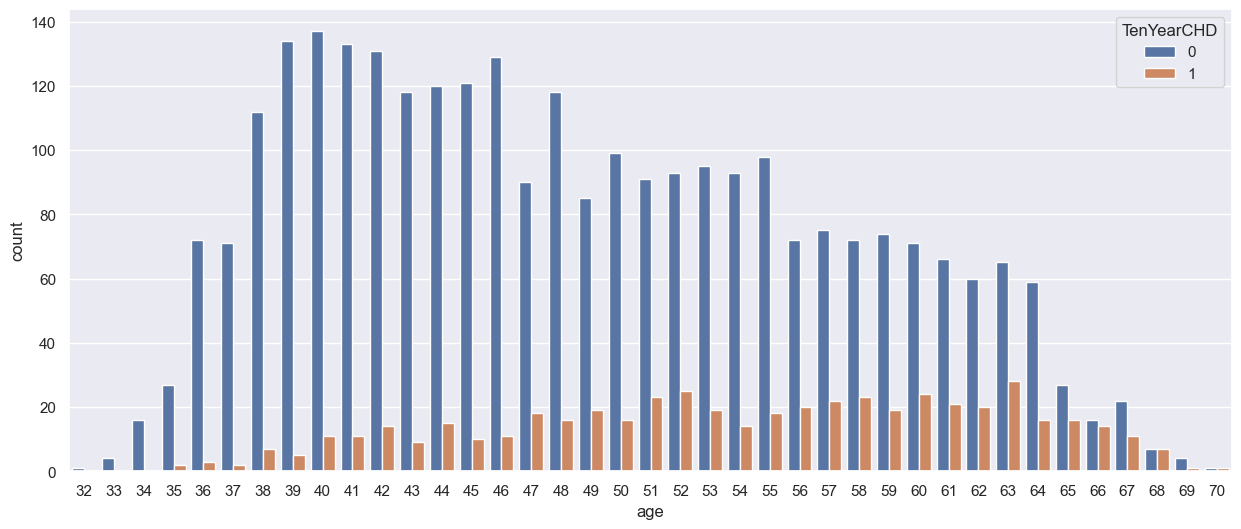

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(x="age", hue="TenYearCHD", data=data)

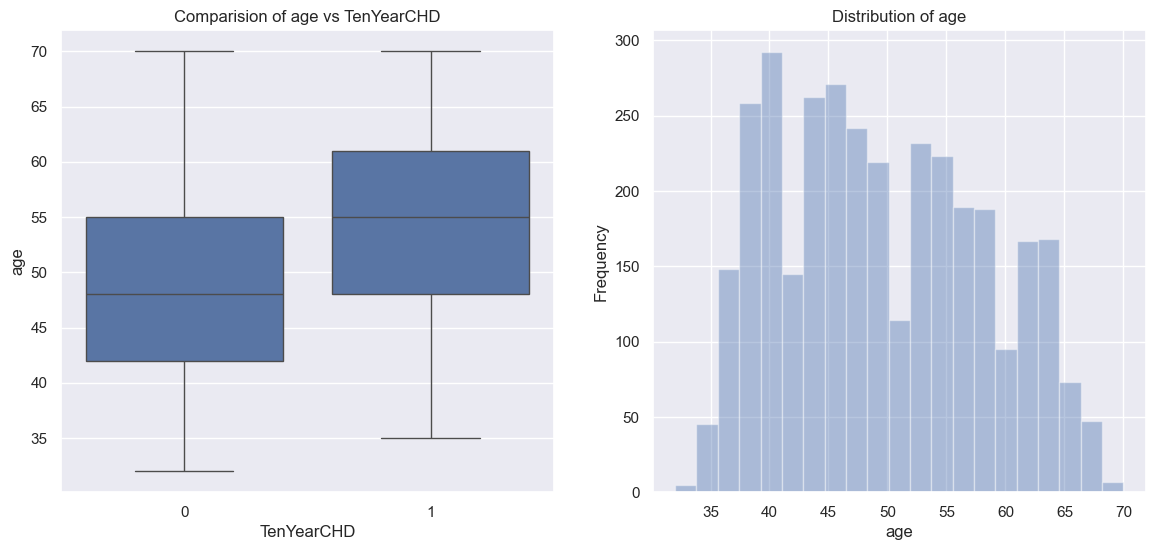

In [58]:
NumericalVariables_targetPlots(data1,segment_by="age")

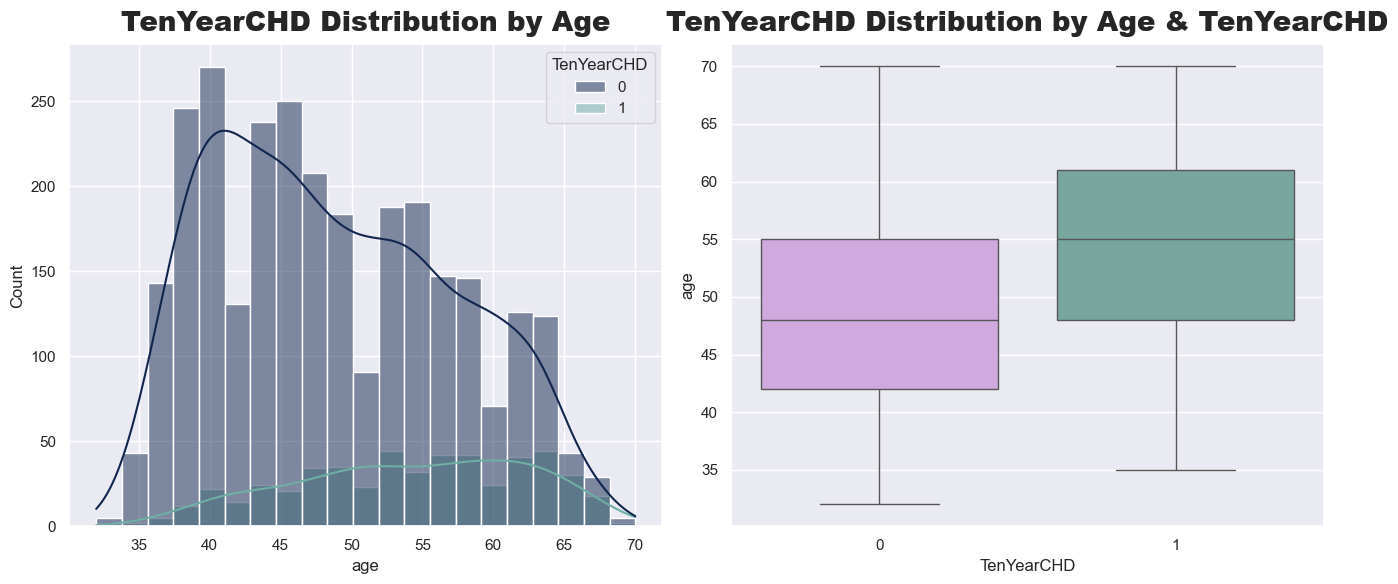

In [59]:
#Visualization to show CHD Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="age",hue="TenYearCHD",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("TenYearCHD Distribution by Age",fontweight="black",size=20,pad=10)

#Visualization to show CHD Distribution by Age & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="TenYearCHD",y="age",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("TenYearCHD Distribution by Age & TenYearCHD",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

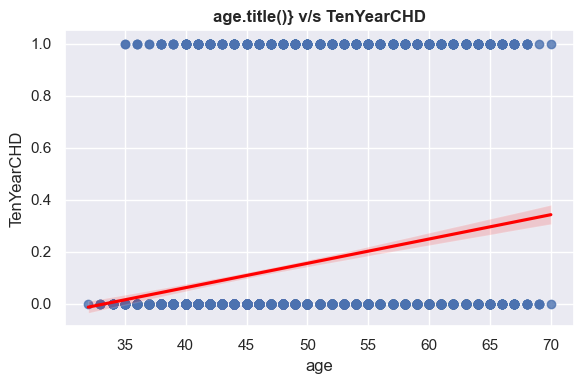

In [60]:
plt.figure(figsize=(6,4))
sns.regplot(x = data1["age"], y =data1['TenYearCHD'],line_kws={"color": "red"})
plt.title('age.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='age'>

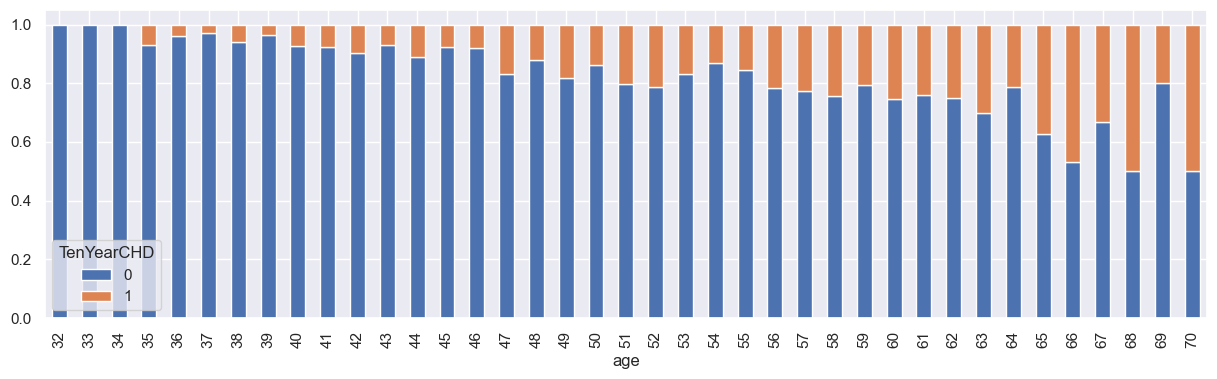

In [61]:

tmp = data1[["TenYearCHD", "age"]]
tmp["age"] = tmp["age"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "age"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "age==\""+row["age"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="TenYearCHD", index="age", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))

In [62]:
# Hypothesis z-test
from statsmodels.stats.weightstats import ztest as ztest

#perform two sample z-test

stats, p_val = ztest(data1["age"][data1["TenYearCHD"]==1], data1["age"][data1["TenYearCHD"]==0], value=0)
print(f"stats : {stats}")
print(f"p_val : {p_val}")
if p_val < 0.05:
    print("We Reject Null Hypothesis i.e means of two groups not equal")
else:
    print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

stats : 13.436518429594438
p_val : 3.6941230591448185e-41
We Reject Null Hypothesis i.e means of two groups not equal


In [63]:
Hypothesisztest(x1=data1.query("TenYearCHD == 1")["age"], x2=data1.query("TenYearCHD == 0")["age"])

Yes_mean : 54.12915851272016
**************************************************
No_mean : 48.72803056616881
**************************************************
Yes_std : 8.12566444199144
**************************************************
No_std : 8.41715644157552
**************************************************
stats : 13.436518429594438
**************************************************
p_val : 3.6941230591448185e-41
We Reject Null Hypothesis i.e means of two groups not equal


In [64]:
Hypothesisztest(data1["age"][data1["TenYearCHD"]==1], data1["age"][data1["TenYearCHD"]==0])

Yes_mean : 54.12915851272016
**************************************************
No_mean : 48.72803056616881
**************************************************
Yes_std : 8.12566444199144
**************************************************
No_std : 8.41715644157552
**************************************************
stats : 13.436518429594438
**************************************************
p_val : 3.6941230591448185e-41
We Reject Null Hypothesis i.e means of two groups not equal


In [65]:
#perform two sample t-test
import scipy.stats as stats
statitics, p_val = stats.ttest_ind(data1["age"][data1["TenYearCHD"]==1], data1["age"][data1["TenYearCHD"]==0], equal_var=True)
print(f"stats : {stats}")
print("*"*50)
print(f"p_val : {p_val}")
if p_val < 0.05:
    print("We Reject Null Hypothesis i.e means of two groups not equal")
else:
    print("We fails to Reject Null Hypothesis i.e means of two groups are equal")

stats : <module 'scipy.stats' from 'C:\\Users\\jyoti\\anaconda3\\envs\\notebook\\Lib\\site-packages\\scipy\\stats\\__init__.py'>
**************************************************
p_val : 3.869151192892592e-40
We Reject Null Hypothesis i.e means of two groups not equal


In [66]:
Hypothesisttest(x1=data1.query("TenYearCHD == 1")["age"], x2=data1.query("TenYearCHD == 0")["age"])

Yes_mean : 54.12915851272016
**************************************************
No_mean : 48.72803056616881
**************************************************
Yes_std : 8.12566444199144
**************************************************
No_std : 8.41715644157552
**************************************************
statics : 13.43651842959444
**************************************************
p_val : 3.869151192892592e-40
We Reject Null Hypothesis i.e means of two groups not equal


In [67]:
Hypothesisttest(data1["age"][data1["TenYearCHD"]==1], data1["age"][data1["TenYearCHD"]==0])

Yes_mean : 54.12915851272016
**************************************************
No_mean : 48.72803056616881
**************************************************
Yes_std : 8.12566444199144
**************************************************
No_std : 8.41715644157552
**************************************************
statics : 13.43651842959444
**************************************************
p_val : 3.869151192892592e-40
We Reject Null Hypothesis i.e means of two groups not equal


## Visualizing education

In [68]:
data1["education"].value_counts()

education
Higher Secorndary(1)    1478
Graduate(2)              990
Post Graduate(3)         549
Doctarte or PHD(4)       373
Name: count, dtype: int64

In [69]:
data["education"].value_counts()

education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64

education
Higher Secorndary(1)    1478
Graduate(2)              990
Post Graduate(3)         549
Doctarte or PHD(4)       373
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'education ratio Proposanate')

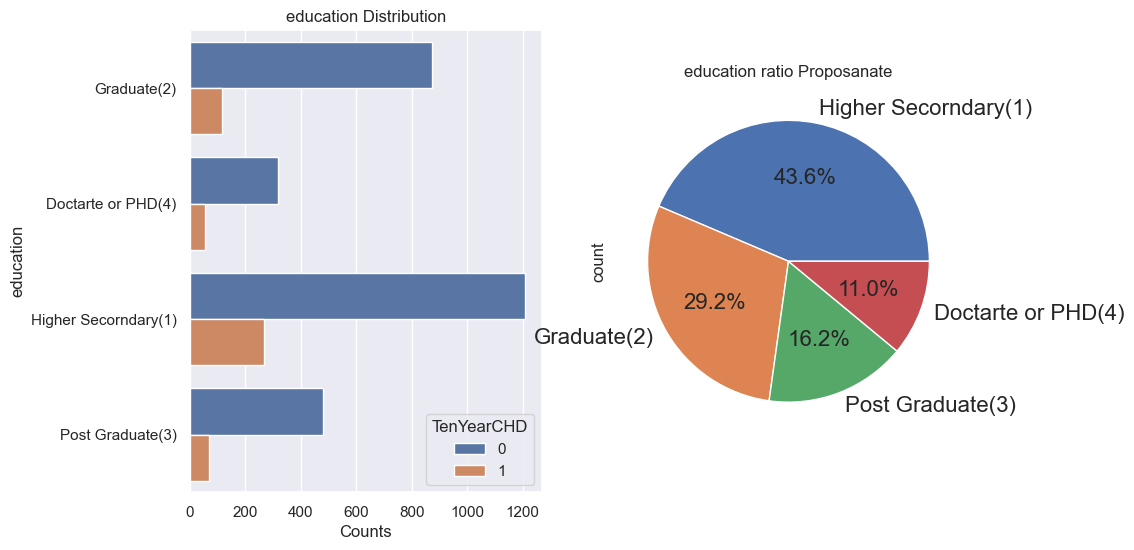

In [70]:
#  Distribution of "education"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="education", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('education')
plt.title('education Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['education'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('education ratio Proposanate')

education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'education ratio Proposanate')

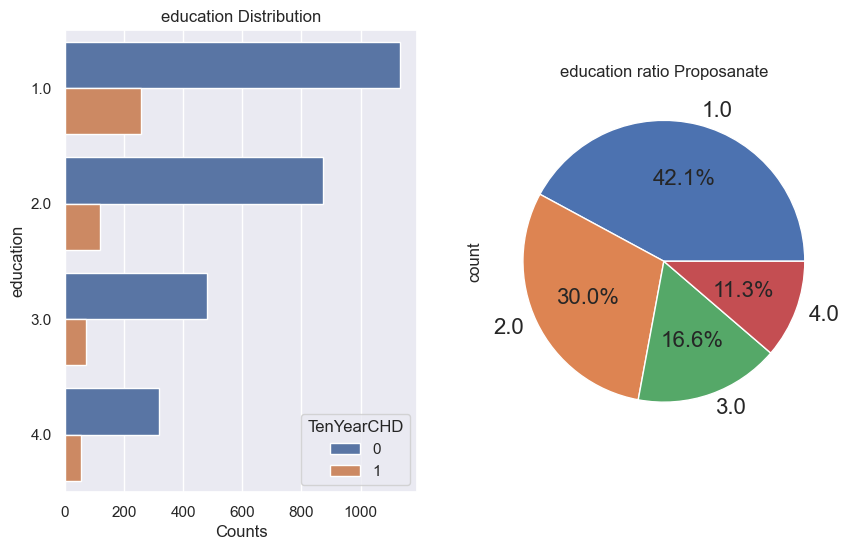

In [71]:
#  Distribution of "education"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="education", hue="TenYearCHD", data=data)
plt.xlabel('Counts')
plt.ylabel('education')
plt.title('education Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data['education'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('education ratio Proposanate')

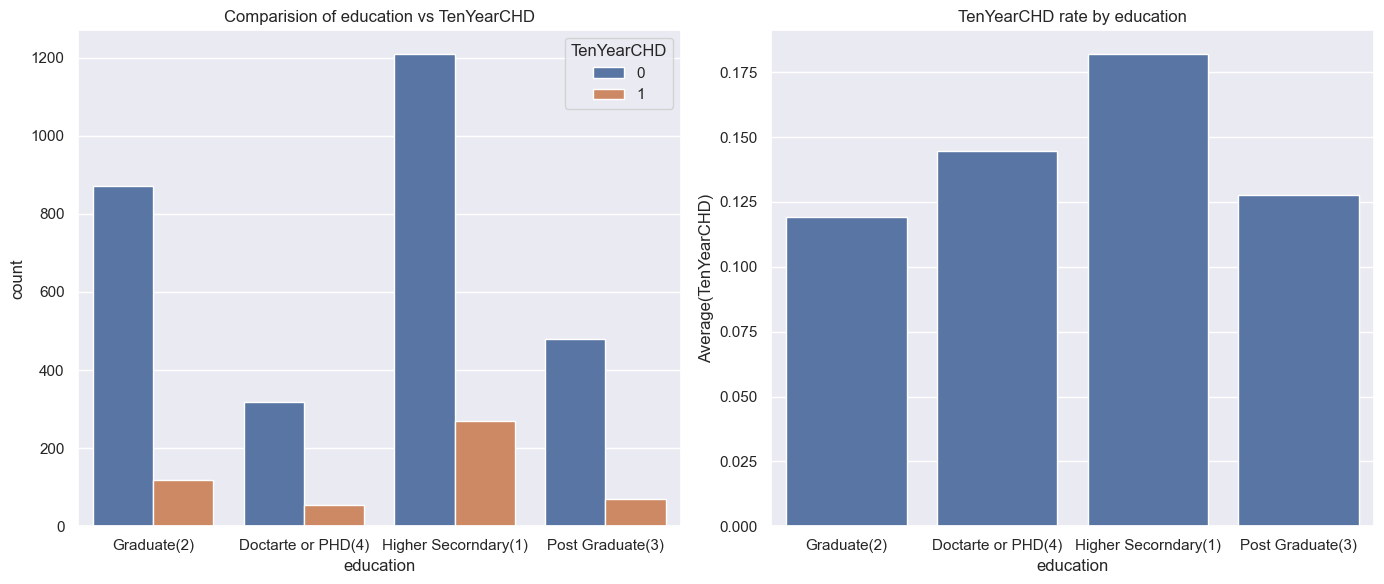

In [72]:
CategoricalVariables_targetPlots(data1,"education")

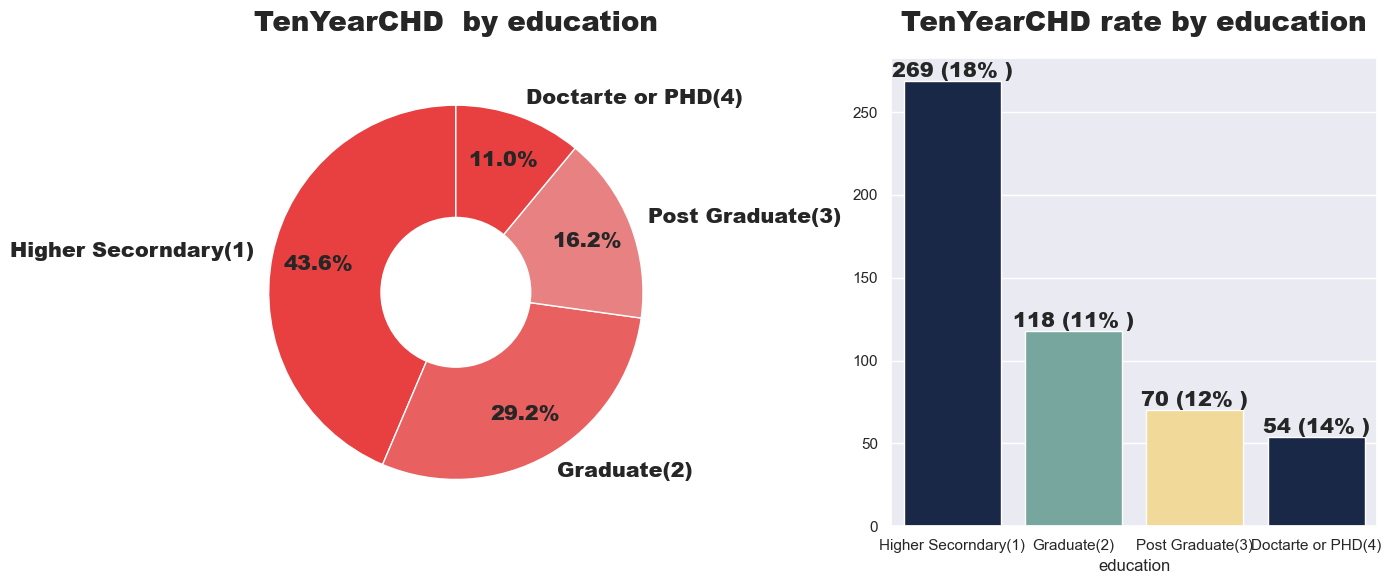

In [73]:
#Visualization to show TenYearCHD by education.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["education"].value_counts()
plt.title("TenYearCHD  by education", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by sex education.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["education"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by education",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


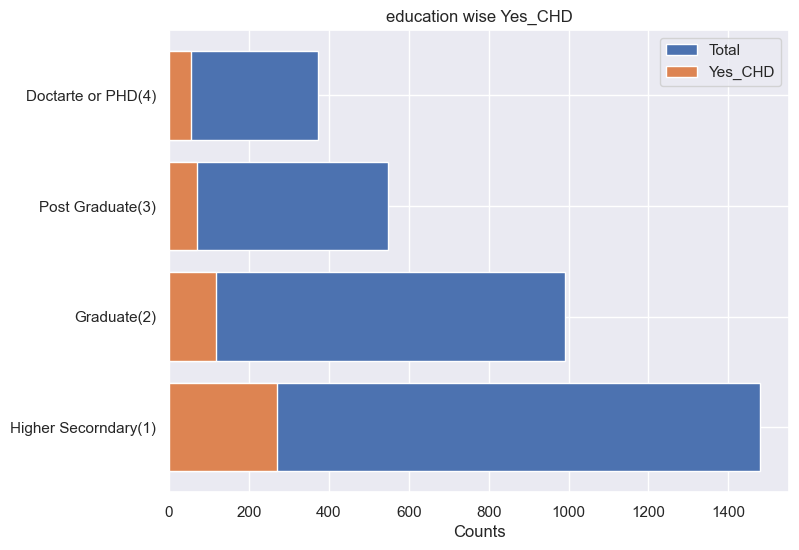

education  Total_Count  % of Total  Yes_CHD  No_CHD  %Yes_CHD  \
2  Higher Secorndary(1)         1478    16.19469      269    1209    18.200   
1           Graduate(2)          990    29.20354      118     872    11.919   
3      Post Graduate(3)          549    11.00295       70     479    12.750   
0    Doctarte or PHD(4)          373    43.59882       54     319    14.477   

   %No_CHD  
2   81.800  
1   88.081  
3   87.250  
0   85.523

In [74]:
Univariate_Analysis1("education")

TenYearCHD             education  count  count_norm
0           0    Doctarte or PHD(4)    319    0.855228
1           0           Graduate(2)    872    0.880808
2           0  Higher Secorndary(1)   1209    0.817997
3           0      Post Graduate(3)    479    0.872495
4           1    Doctarte or PHD(4)     54    0.144772
5           1           Graduate(2)    118    0.119192
6           1  Higher Secorndary(1)    269    0.182003
7           1      Post Graduate(3)     70    0.127505

<Axes: xlabel='education'>

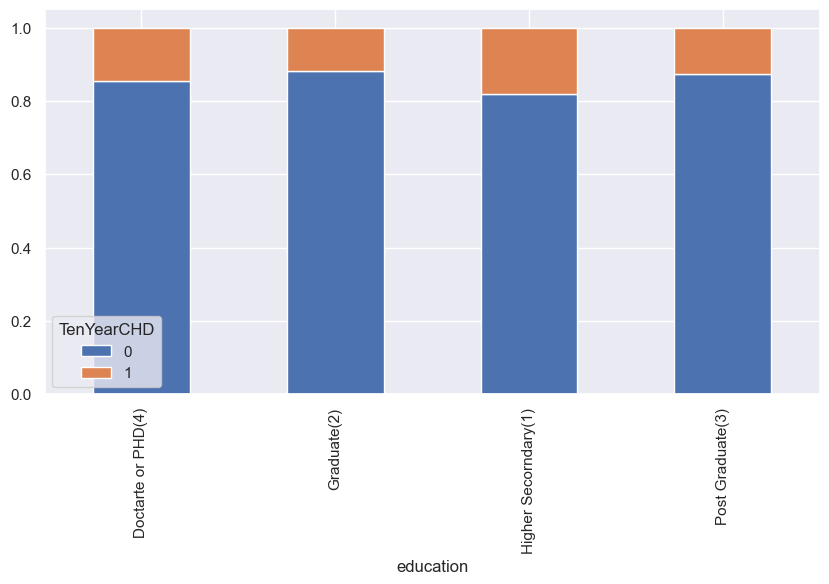

In [75]:
tmp = data1[["TenYearCHD", "education"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "education"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "education==\""+row["education"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="education", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [76]:
# Hypothesis testing on "education" column
stat, p_val, dof = chi_sqred_ind_test(data1, "education", "TenYearCHD", 0.05)

Contigency table: 
 TenYearCHD               0    1
education                      
Doctarte or PHD(4)     319   54
Graduate(2)            872  118
Higher Secorndary(1)  1209  269
Post Graduate(3)       479   70
Statistic: 21.400065537300264
P-value: 8.69389071714776e-05
DOF: 3
probability=0.950, critical=7.815, stat=21.400
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [77]:
t = pd.crosstab(data1.education, data1["TenYearCHD"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=21.400065537300264, pvalue=8.69389071714776e-05, dof=3, expected_freq=array([[ 316.77492625,   56.22507375],
       [ 840.7699115 ,  149.2300885 ],
       [1255.2100295 ,  222.7899705 ],
       [ 466.24513274,   82.75486726]]))

## Visualizing sex

In [78]:
data1["sex"].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

##### Which gender is prone to coronary heart disease?

sex
F    1923
M    1467
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'sex ratio Proposanate')

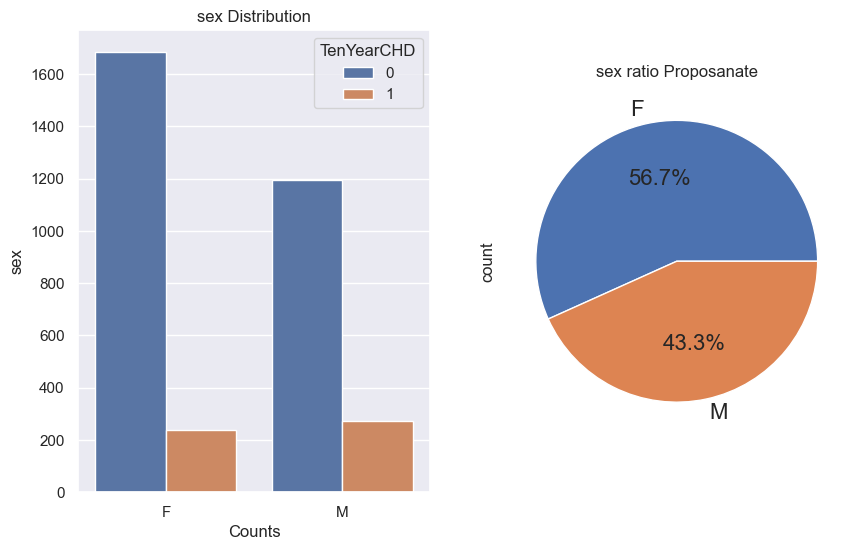

In [79]:
#  Distribution of "sex"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="sex", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('sex')
plt.title('sex Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['sex'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('sex ratio Proposanate')

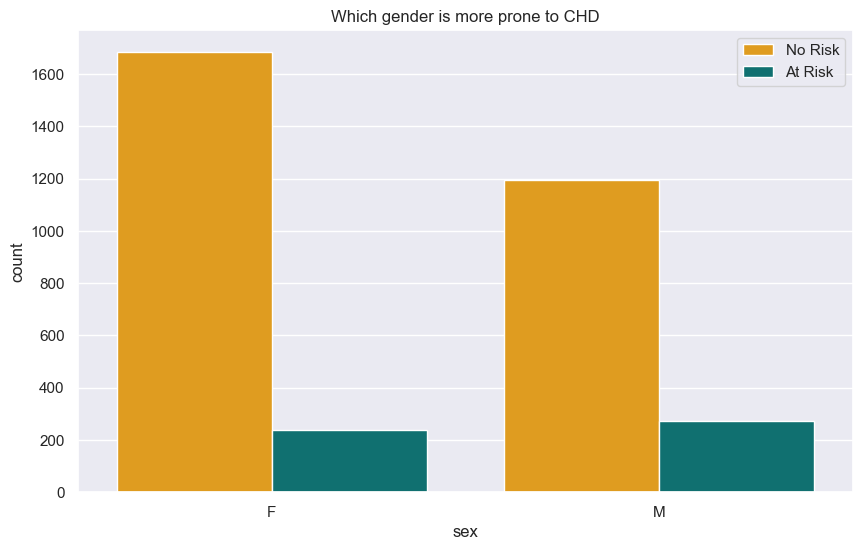

In [80]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,6))
sns.countplot(x = data1['sex'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

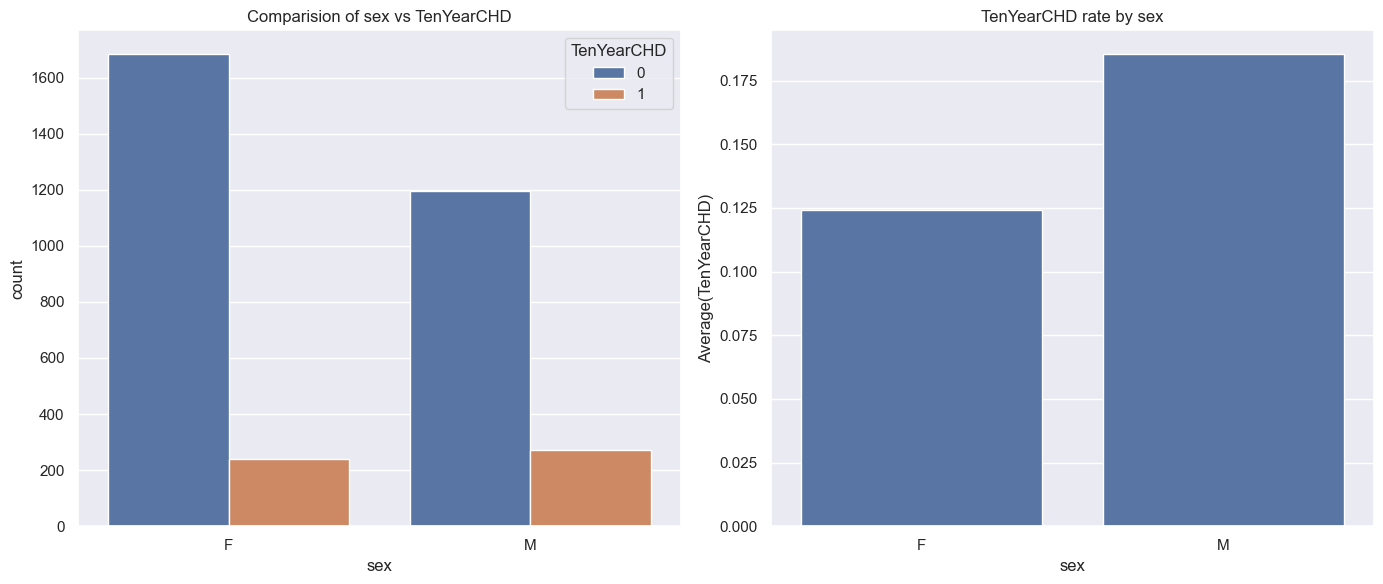

In [81]:
CategoricalVariables_targetPlots(data1,"sex")

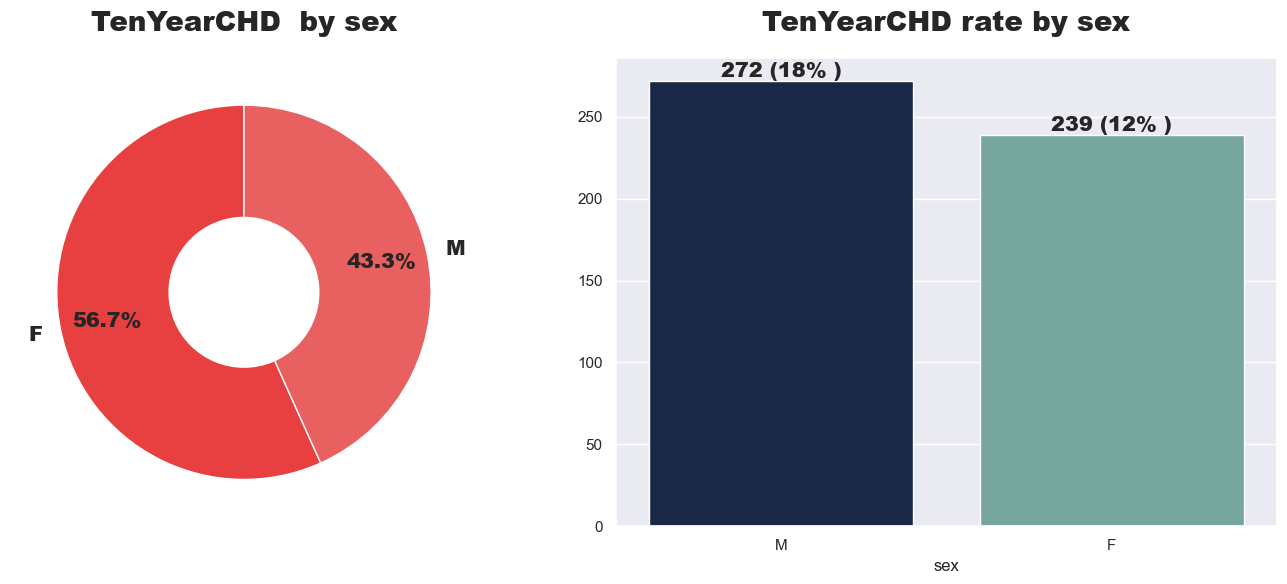

In [82]:
#Visualization to show TenYearCHD by sex.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["sex"].value_counts()
plt.title("TenYearCHD  by sex", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by sex.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["sex"].value_counts()
# acceptance_rate = np.floor((value_2/value_1)*100).values
acceptance_rate = [18, 12]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by sex",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


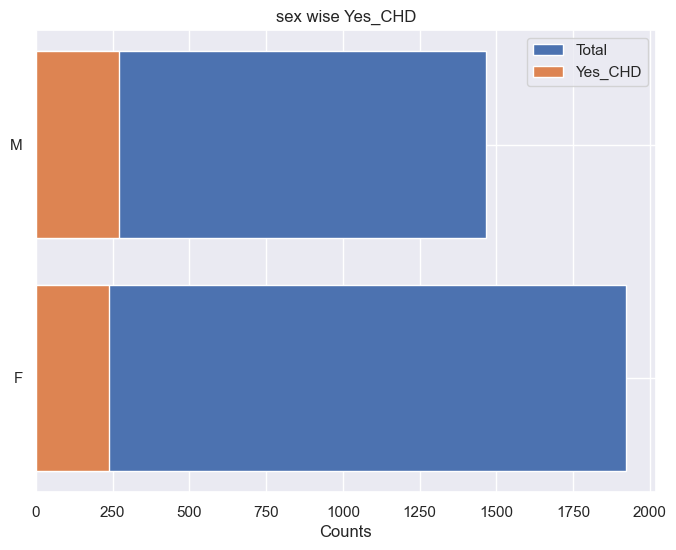

sex  Total_Count  % of Total  Yes_CHD  No_CHD  %Yes_CHD  %No_CHD
0   F         1923   56.725664      239    1684    12.428   87.572
1   M         1467   43.274336      272    1195    18.541   81.459

In [83]:
Univariate_Analysis1("sex")

TenYearCHD sex  count  count_norm
0           0   F   1684    0.875715
1           0   M   1195    0.814588
2           1   F    239    0.124285
3           1   M    272    0.185412

<Axes: xlabel='sex'>

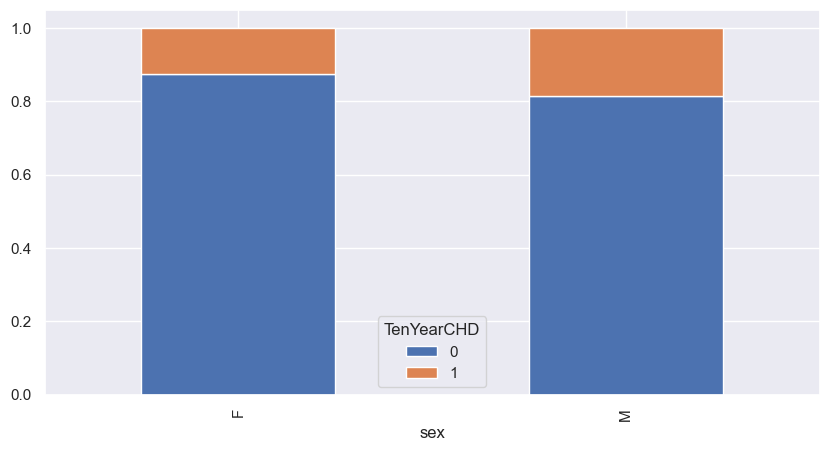

In [84]:
tmp = data1[["TenYearCHD", "sex"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "sex"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "sex==\""+row["sex"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="sex", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [85]:
# Hypothesis testing on "sex" column
stat, p_val, dof = chi_sqred_ind_test(data1, "sex", "TenYearCHD", 0.05)

Contigency table: 
 TenYearCHD     0    1
sex                  
F           1684  239
M           1195  272
Statistic: 23.814363915594157
P-value: 1.060878293561798e-06
DOF: 1
probability=0.950, critical=3.841, stat=23.814
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [86]:
t = pd.crosstab(data1.sex, data1["TenYearCHD"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=23.814363915594157, pvalue=1.060878293561798e-06, dof=1, expected_freq=array([[1633.13185841,  289.86814159],
       [1245.86814159,  221.13185841]]))

## Visualizing is_smoking

In [87]:
data1["education"].value_counts()

education
Higher Secorndary(1)    1478
Graduate(2)              990
Post Graduate(3)         549
Doctarte or PHD(4)       373
Name: count, dtype: int64

##### Are smokers at more risk of coronary heart disease ??

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'is_smoking ratio Proposanate')

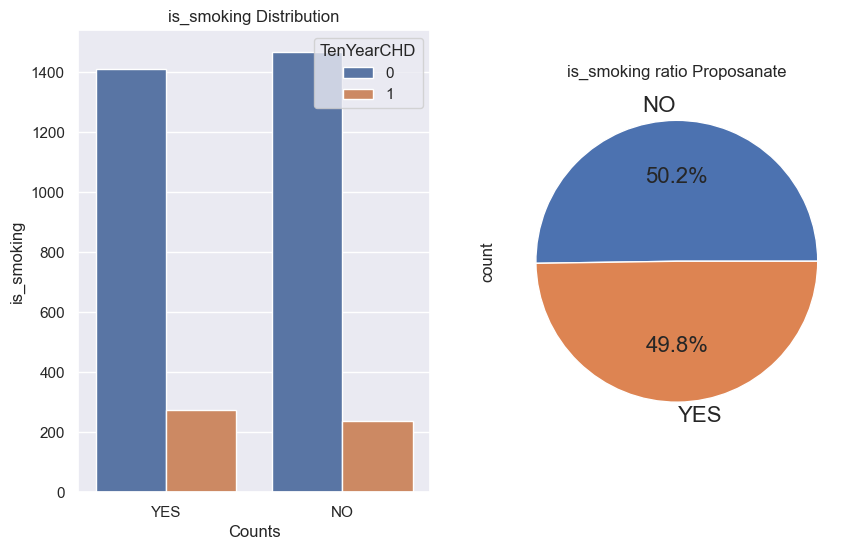

In [88]:
#  Distribution of "is_smoking"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="is_smoking", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('is_smoking')
plt.title('is_smoking Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['is_smoking'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('is_smoking ratio Proposanate')

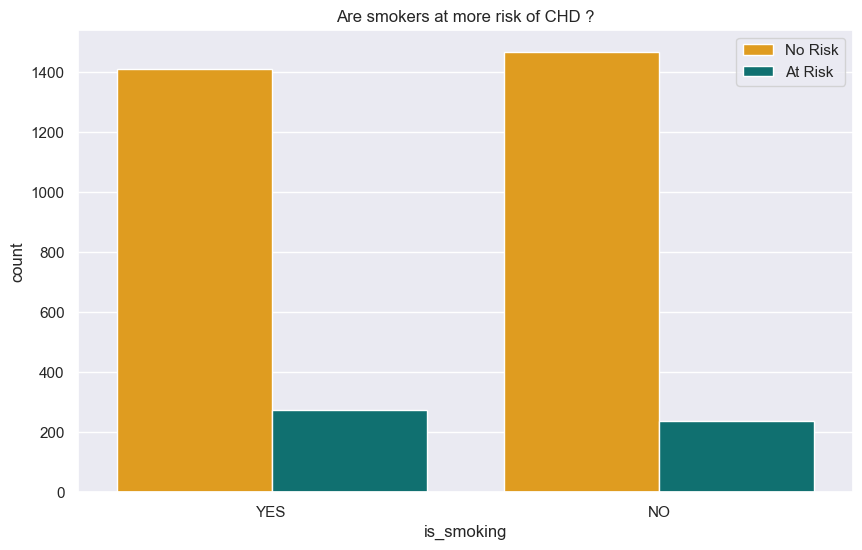

In [89]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['is_smoking'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

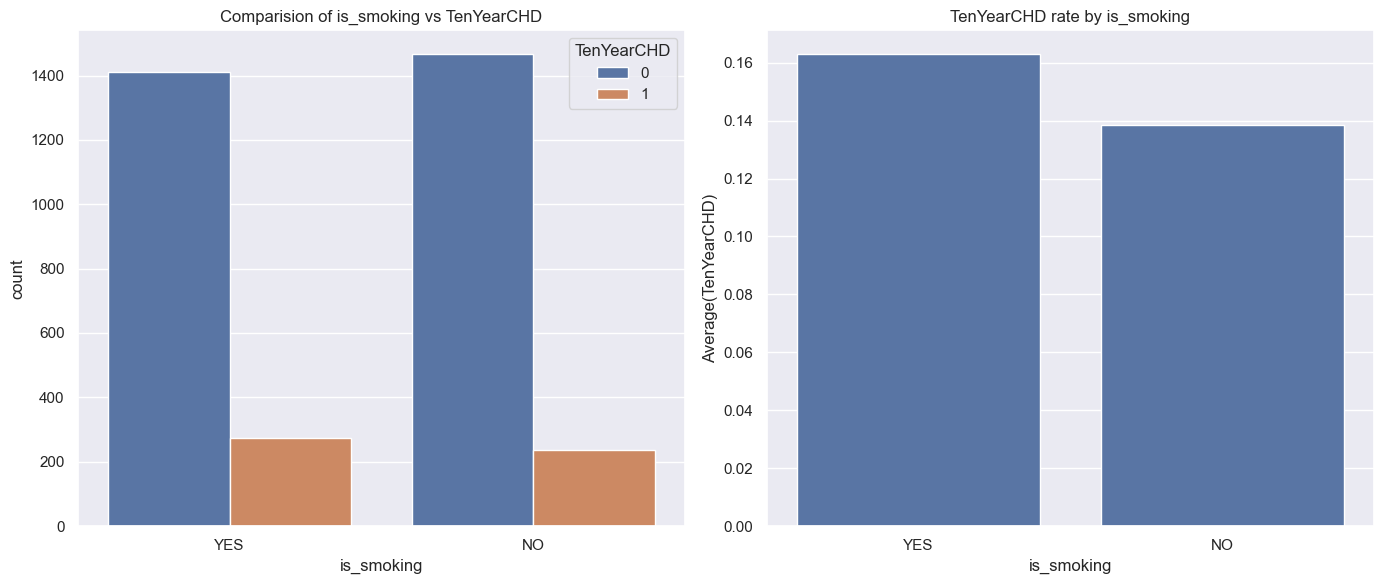

In [90]:
CategoricalVariables_targetPlots(data1,"is_smoking")

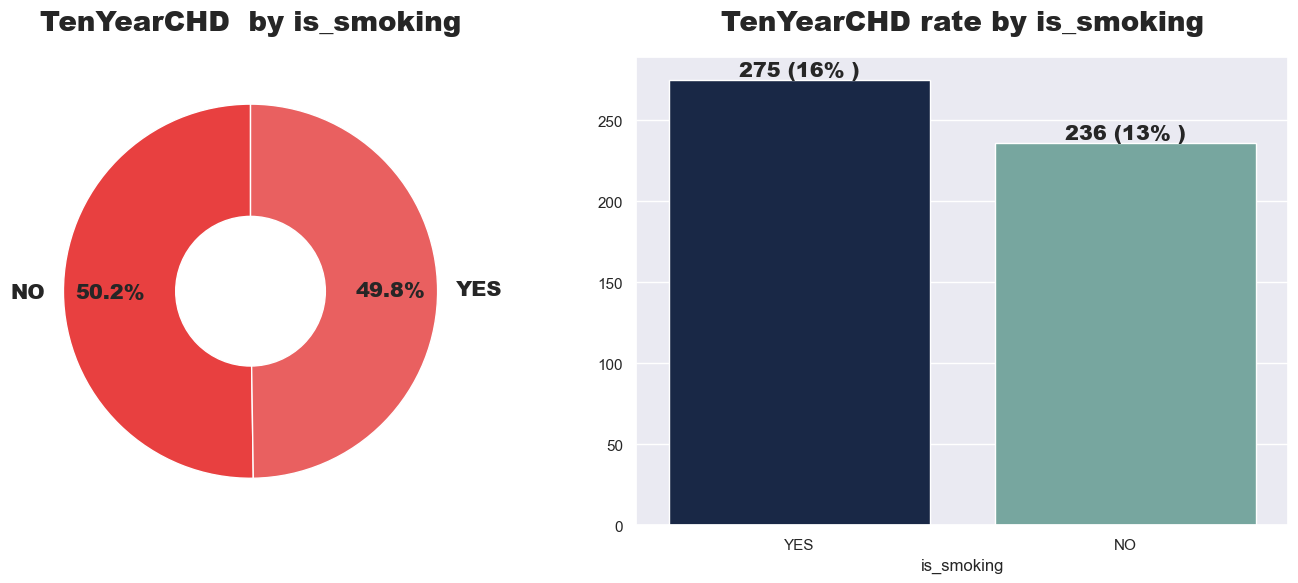

In [91]:
#Visualization to show TenYearCHD by is_smoking.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["is_smoking"].value_counts()
plt.title("TenYearCHD  by is_smoking", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by is_smoking.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["is_smoking"].value_counts()
# acceptance_rate = np.floor((value_2/value_1)*100).values
acceptance_rate = [16, 13]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by is_smoking",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


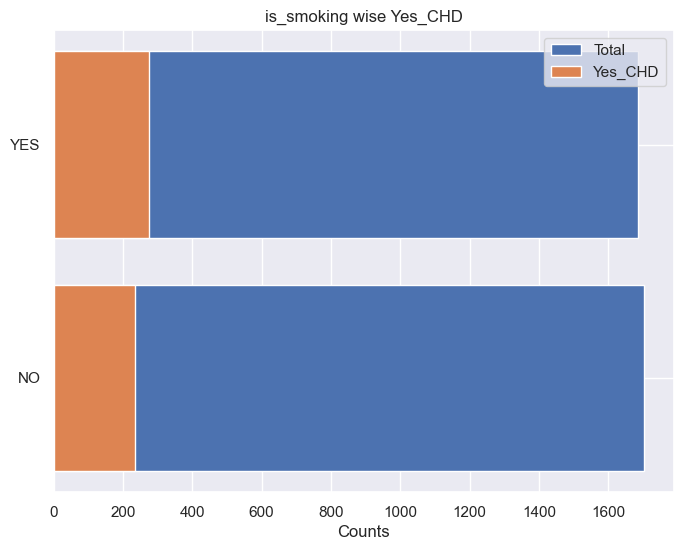

is_smoking  Total_Count  % of Total  Yes_CHD  No_CHD  %Yes_CHD  %No_CHD
0         NO         1703   50.235988      236    1467    13.858   86.142
1        YES         1687   49.764012      275    1412    16.301   83.699

In [92]:
Univariate_Analysis1("is_smoking")

TenYearCHD is_smoking  count  count_norm
0           0         NO   1467    0.861421
1           0        YES   1412    0.836989
2           1         NO    236    0.138579
3           1        YES    275    0.163011

<Axes: xlabel='is_smoking'>

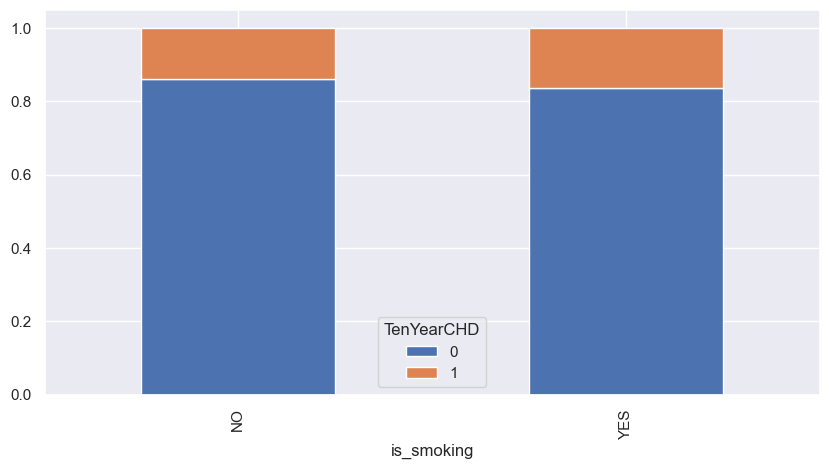

In [93]:
tmp = data1[["TenYearCHD", "is_smoking"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "is_smoking"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "is_smoking==\""+row["is_smoking"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="is_smoking", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))

In [94]:
# Hypothesis testing on "is_smoking" column
stat, p_val, dof = chi_sqred_ind_test(data1, "is_smoking", "TenYearCHD", 0.05)

Contigency table: 
 TenYearCHD     0    1
is_smoking           
NO          1467  236
YES         1412  275
Statistic: 3.763250993795598
P-value: 0.05239062274853224
DOF: 1
probability=0.950, critical=3.841, stat=3.763
Independent (fail to reject Null Hypothesis(H0))
Independent (fail to reject Null Hypothesis(H0))


In [95]:
t = pd.crosstab(data1.is_smoking, data1["TenYearCHD"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=3.763250993795598, pvalue=0.05239062274853224, dof=1, expected_freq=array([[1446.29410029,  256.70589971],
       [1432.70589971,  254.29410029]]))

## Visualizing cigsPerDay

In [96]:
data1["cigsPerDay"].unique()


array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
       43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., 11.,  8.,  4., 14.,
       16., 23., 13., 12., 70., 38.])

In [97]:
data1["cigsPerDay"].nunique()



32

##### how much smoking affect CHD?

Text(0.5, 1.0, 'cigsPerDay Distrubution')

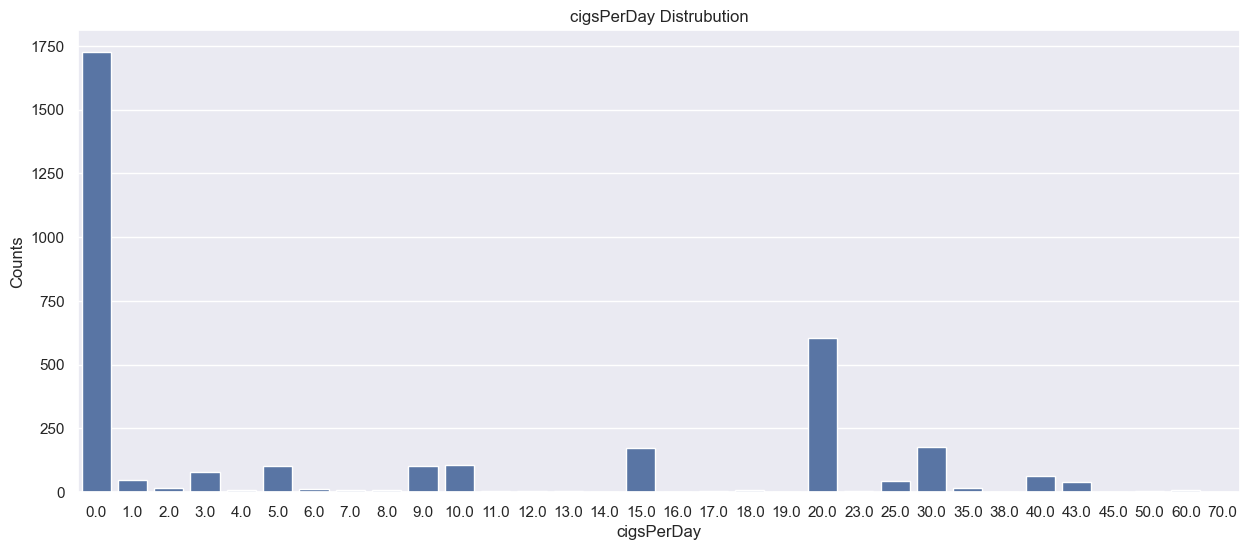

In [98]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['cigsPerDay'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('cigsPerDay Distrubution')

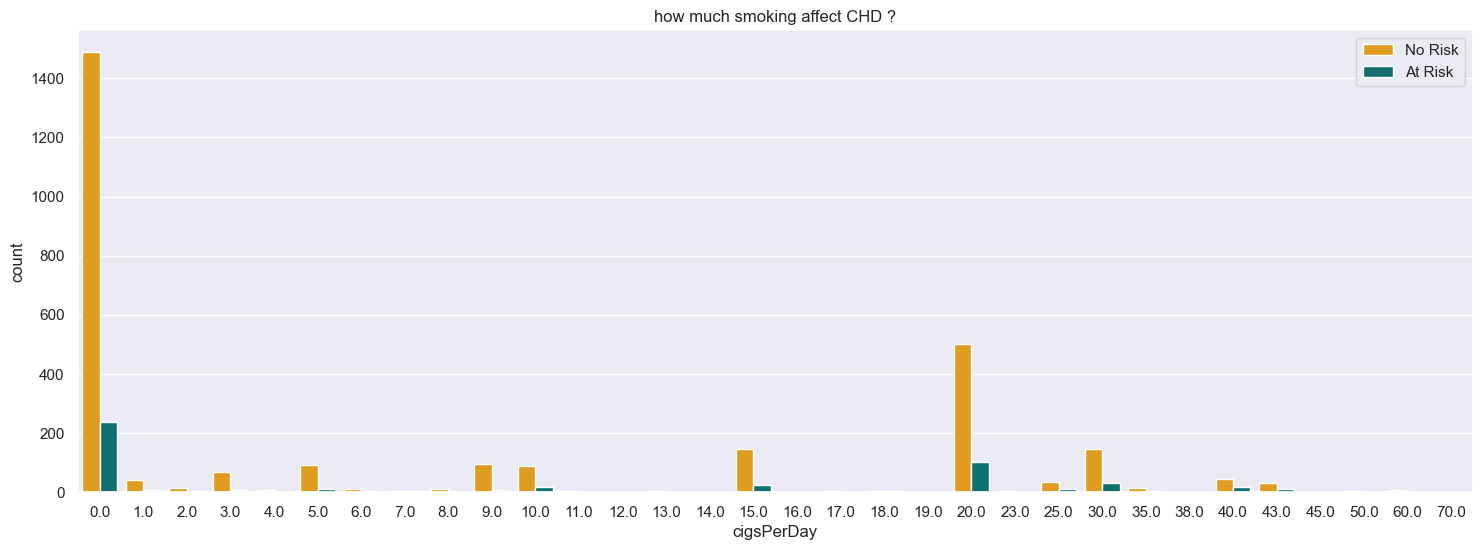

In [99]:
plt.figure(figsize = (18,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data1['cigsPerDay'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

<Axes: xlabel='cigsPerDay', ylabel='count'>

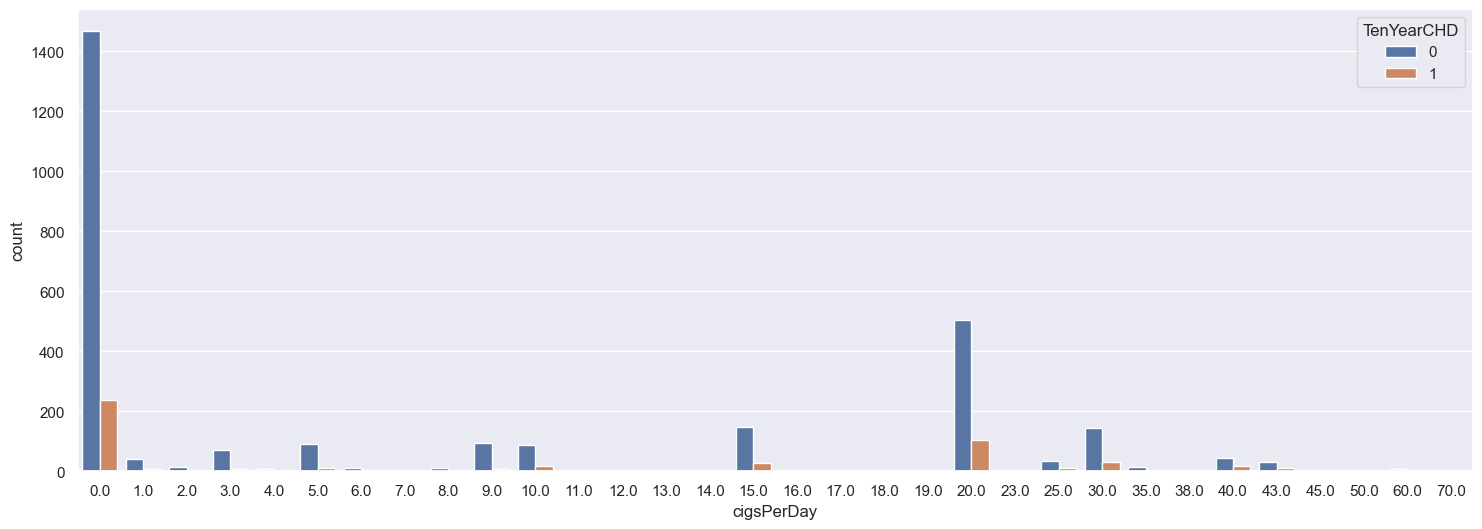

In [100]:
plt.figure(figsize=(18,6))
sns.countplot(x="cigsPerDay", hue="TenYearCHD", data=data)



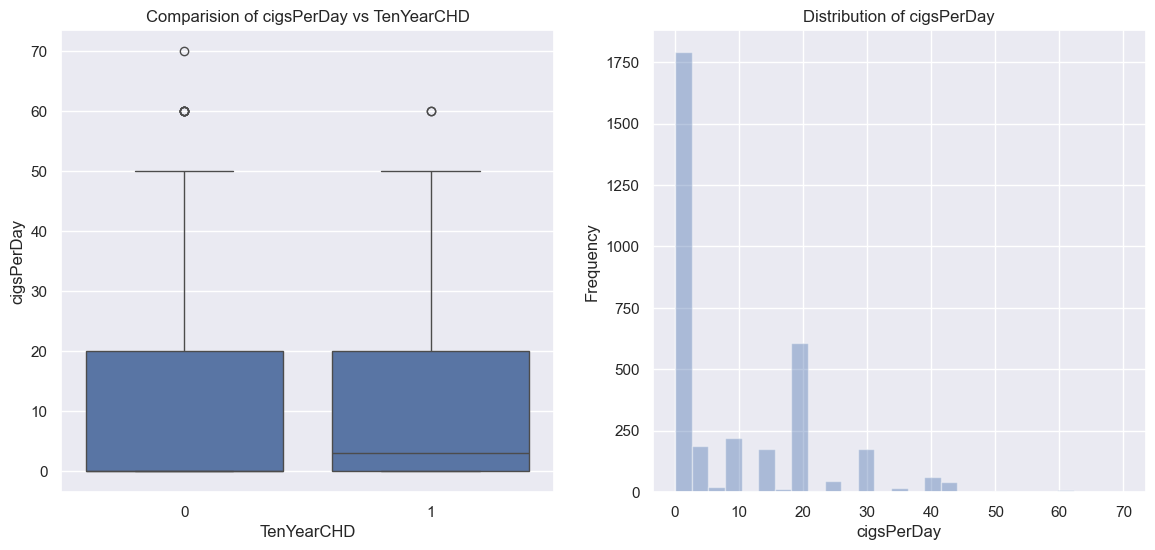

In [101]:
NumericalVariables_targetPlots(data1,segment_by="cigsPerDay")

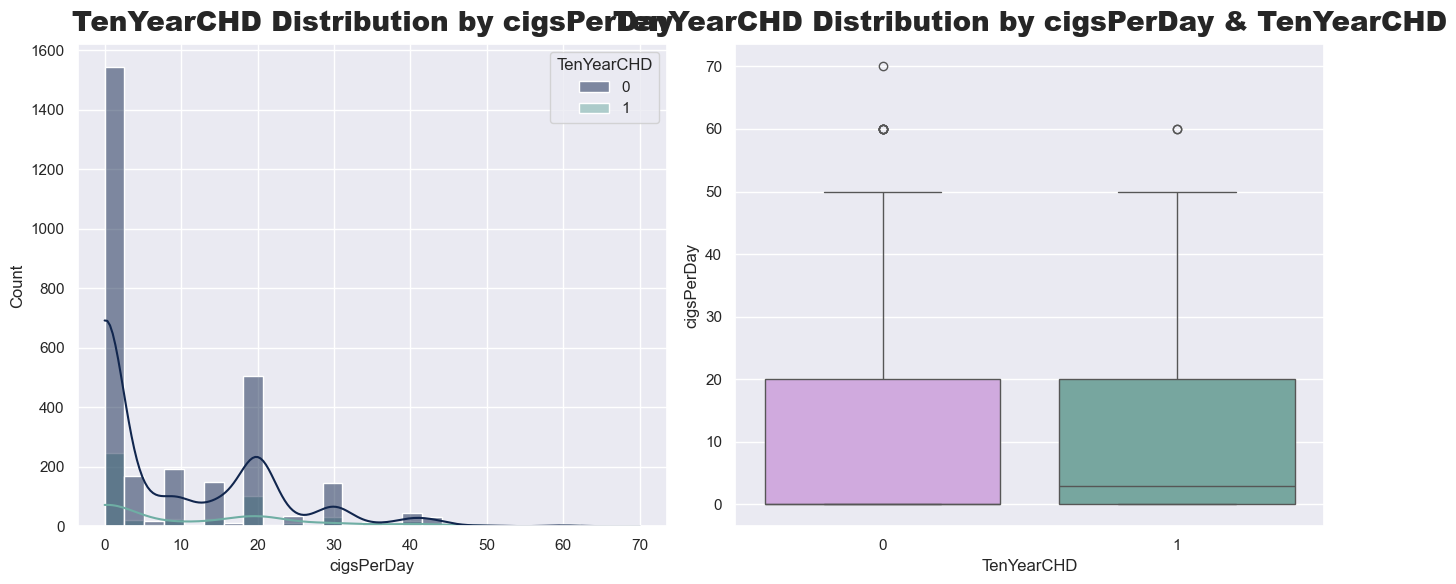

In [102]:
#Visualization to show CHD Distribution by cigsPerDay.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="cigsPerDay",hue="TenYearCHD",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("TenYearCHD Distribution by cigsPerDay",fontweight="black",size=20,pad=10)


#Visualization to show CHD Distribution by cigsPerDay & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="TenYearCHD",y="cigsPerDay",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("TenYearCHD Distribution by cigsPerDay & TenYearCHD",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()


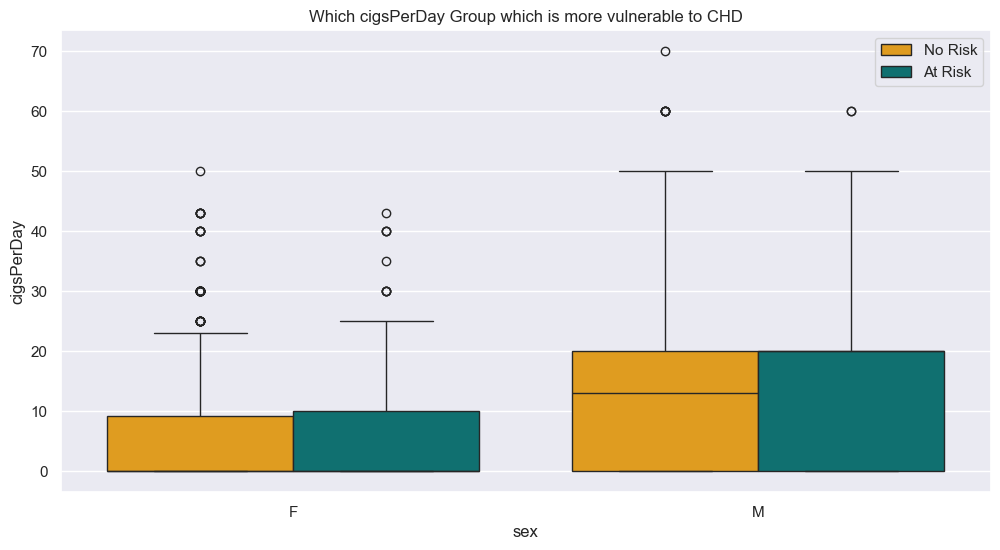

In [103]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data1['sex'], y = data1['cigsPerDay'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which cigsPerDay Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

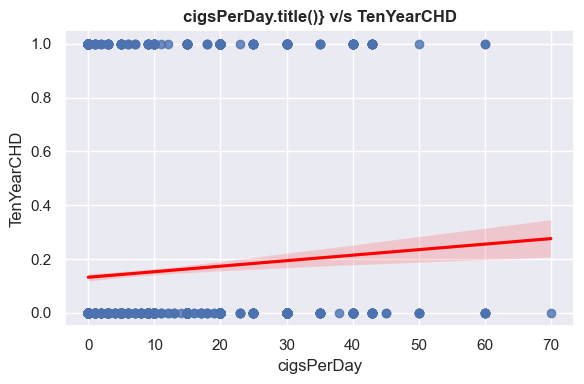

In [104]:
plt.figure(figsize=(6,4))
sns.regplot(x = data1["cigsPerDay"], y =data1['TenYearCHD'],line_kws={"color": "red"})
plt.title('cigsPerDay.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='cigsPerDay'>

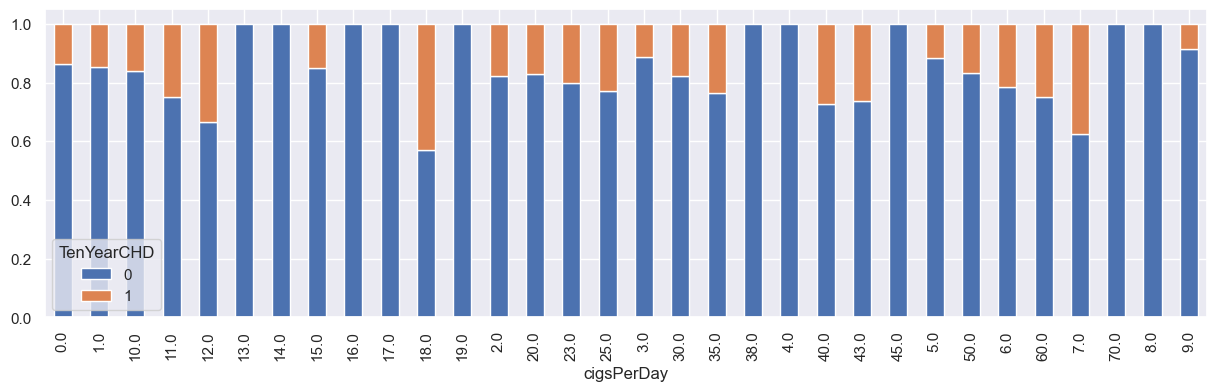

In [105]:
tmp = data1[["TenYearCHD", "cigsPerDay"]]
tmp["cigsPerDay"] = tmp["cigsPerDay"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "cigsPerDay"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "cigsPerDay==\""+row["cigsPerDay"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="TenYearCHD", index="cigsPerDay", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))



In [106]:
# Hypothesis Test (z-test)
Hypothesisztest(data1["cigsPerDay"][data1["TenYearCHD"]==1], data1["cigsPerDay"][data1["TenYearCHD"]==0])



Yes_mean : 10.925636007827789
**************************************************
No_mean : 8.670718999652657
**************************************************
Yes_std : 13.075285335490955
**************************************************
No_std : 11.603925697600708
**************************************************
stats : 3.968407823728232
**************************************************
p_val : 7.23544335553156e-05
We Reject Null Hypothesis i.e means of two groups not equal


In [107]:
# Hypothesis Test (z-test)

Hypothesisztest(x1=data1.query("TenYearCHD == 1")["cigsPerDay"], x2=data1.query("TenYearCHD == 0")["cigsPerDay"])

Yes_mean : 10.925636007827789
**************************************************
No_mean : 8.670718999652657
**************************************************
Yes_std : 13.075285335490955
**************************************************
No_std : 11.603925697600708
**************************************************
stats : 3.968407823728232
**************************************************
p_val : 7.23544335553156e-05
We Reject Null Hypothesis i.e means of two groups not equal


In [108]:
# Hypothesis Test (t-test)

Hypothesisttest(data1["cigsPerDay"][data1["TenYearCHD"]==1], data1["cigsPerDay"][data1["TenYearCHD"]==0])

Yes_mean : 10.925636007827789
**************************************************
No_mean : 8.670718999652657
**************************************************
Yes_std : 13.075285335490955
**************************************************
No_std : 11.603925697600708
**************************************************
statics : 3.968407823728232
**************************************************
p_val : 7.385406644383295e-05
We Reject Null Hypothesis i.e means of two groups not equal


In [109]:
# Hypothesis Test (t-test)

Hypothesisttest(x1=data1.query("TenYearCHD == 1")["cigsPerDay"], x2=data1.query("TenYearCHD == 0")["cigsPerDay"])

Yes_mean : 10.925636007827789
**************************************************
No_mean : 8.670718999652657
**************************************************
Yes_std : 13.075285335490955
**************************************************
No_std : 11.603925697600708
**************************************************
statics : 3.968407823728232
**************************************************
p_val : 7.385406644383295e-05
We Reject Null Hypothesis i.e means of two groups not equal


## Visualizing BPMeds

In [110]:
data1["BPMeds"].value_counts()

BPMeds
No(0)     3290
Yes(1)     100
Name: count, dtype: int64

In [111]:
data["BPMeds"].value_counts()

BPMeds
0.0    3246
1.0     100
Name: count, dtype: int64

##### Are patients with blood pressure on medication at more risk of coronary heart disease ??

BPMeds
No(0)     3290
Yes(1)     100
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'BPMeds ratio Proposanate')

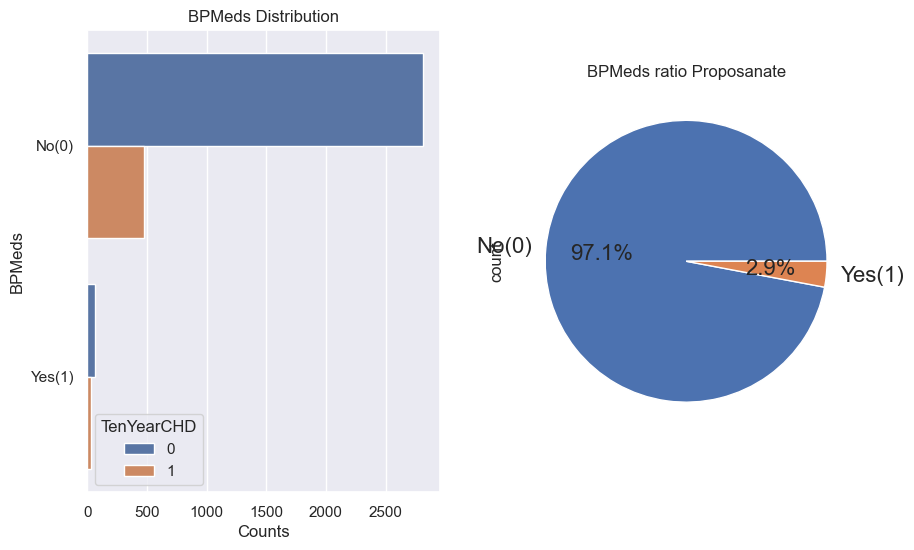

In [112]:
#  Distribution of "BPMeds"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="BPMeds", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('BPMeds')
plt.title('BPMeds Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['BPMeds'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('BPMeds ratio Proposanate')



BPMeds
0.0    3246
1.0     100
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'BPMeds ratio Proposanate')

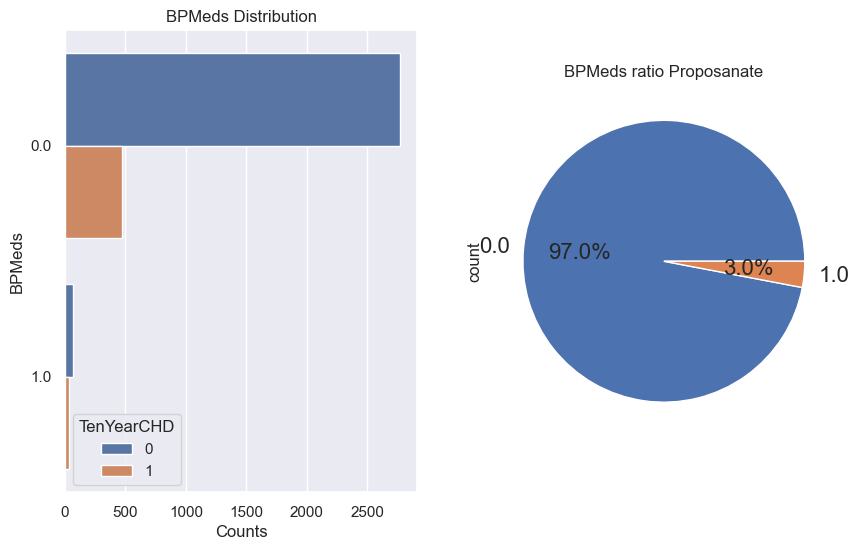

In [113]:
#  Distribution of "BPMeds"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="BPMeds", hue="TenYearCHD", data=data)
plt.xlabel('Counts')
plt.ylabel('BPMeds')
plt.title('BPMeds Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data['BPMeds'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('BPMeds ratio Proposanate')



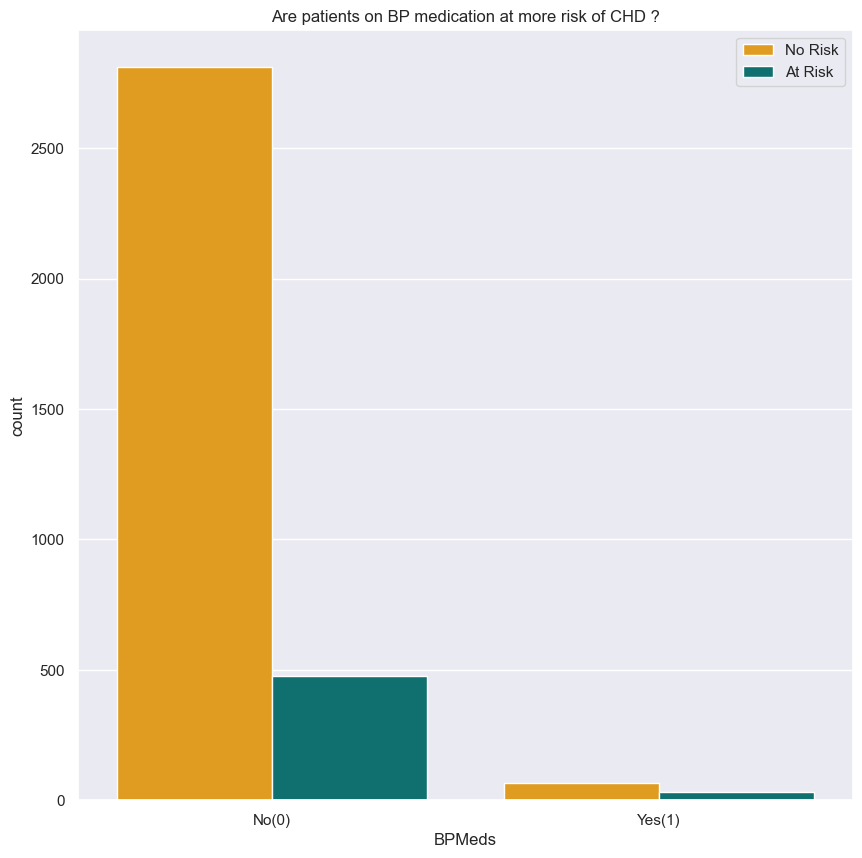

In [114]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = data1['BPMeds'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()
     

Text(0.5, 1.0, 'BP Medication people distribution with Ten years CHD')

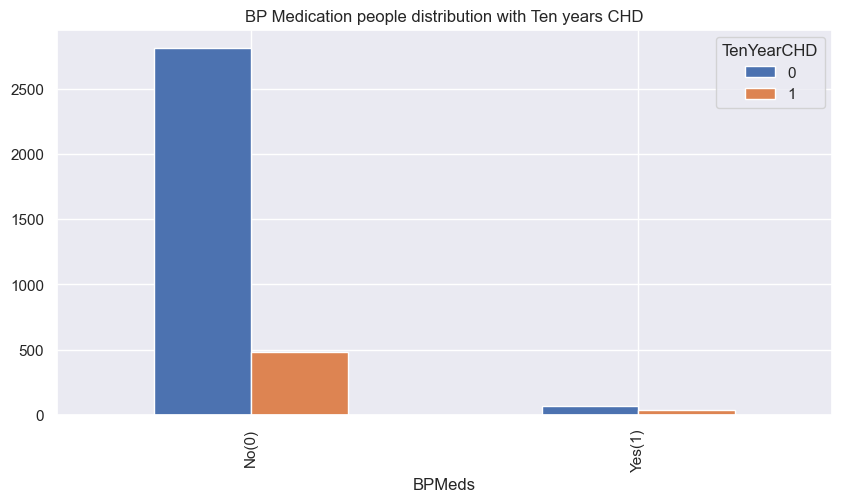

In [115]:
plt.rcParams['figure.figsize'] = (10, 5)
data1.groupby(['BPMeds','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('BP Medication people distribution with Ten years CHD')

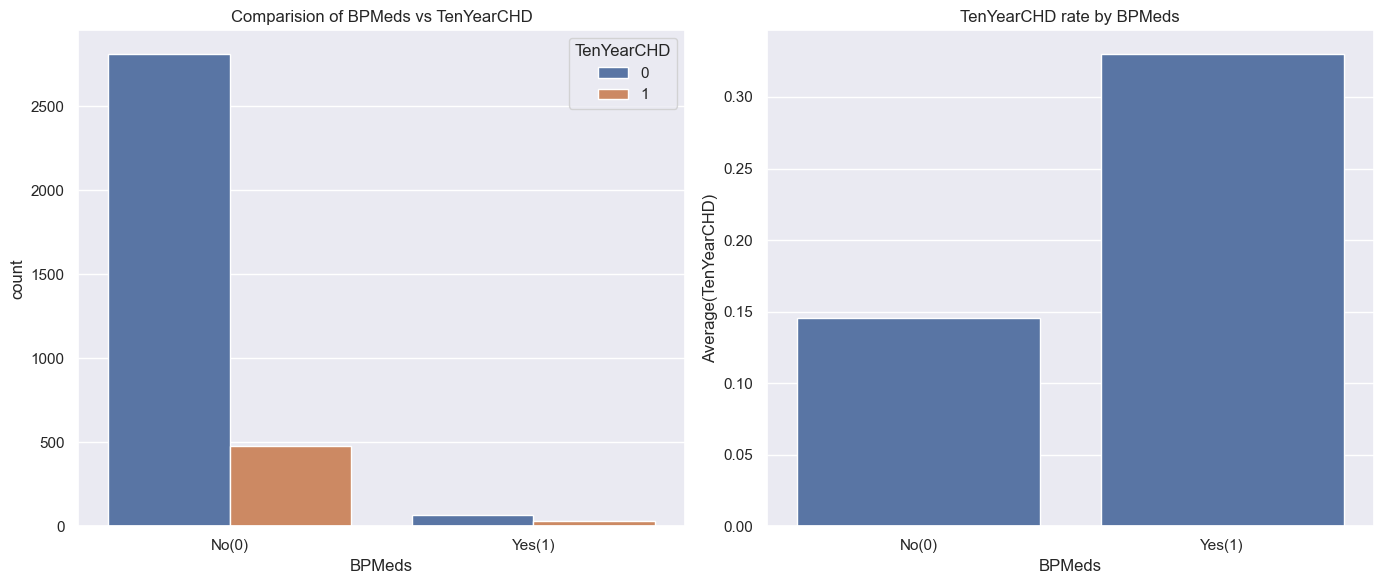

In [116]:

CategoricalVariables_targetPlots(data1,"BPMeds")



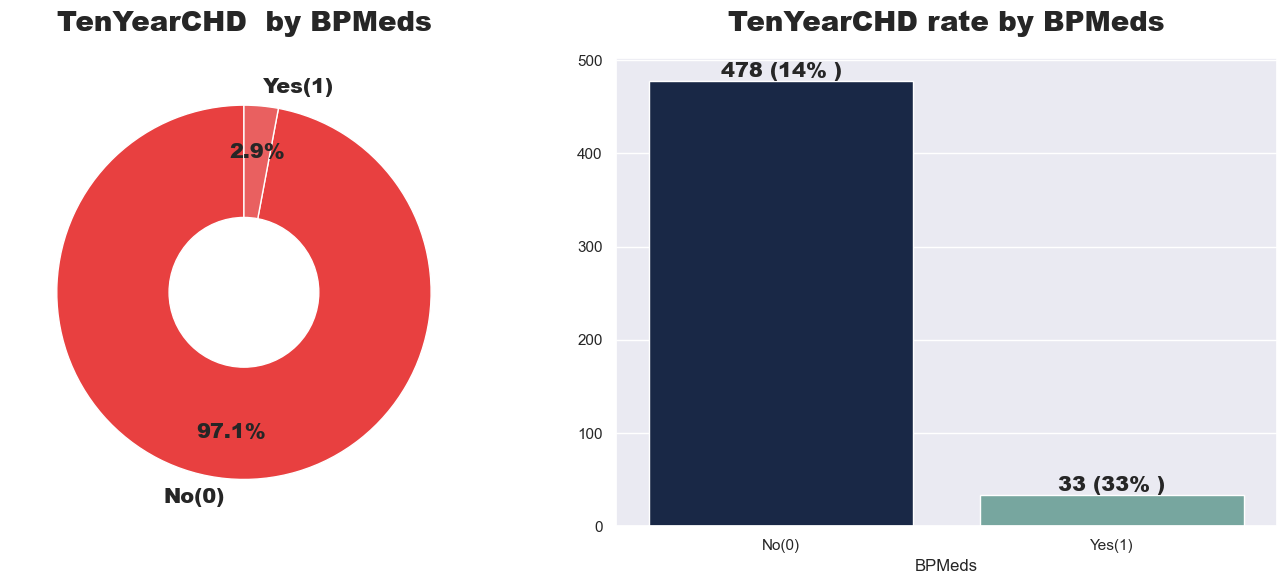

In [117]:

#Visualization to show TenYearCHD by BPMeds.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["BPMeds"].value_counts()
plt.title("TenYearCHD  by BPMeds", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by BPMeds.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["BPMeds"].value_counts()
# acceptance_rate = np.floor((value_2/value_1)*100).values
acceptance_rate = [14, 33]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by BPMeds",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




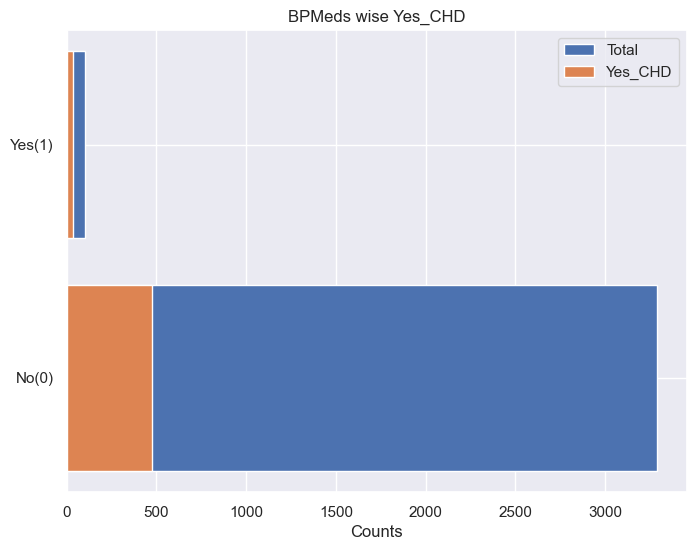

BPMeds  Total_Count  % of Total  Yes_CHD  No_CHD  %Yes_CHD  %No_CHD
0   No(0)         3290   97.050147      478    2812    14.529   85.471
1  Yes(1)          100    2.949853       33      67    33.000   67.000

In [118]:
Univariate_Analysis1("BPMeds")

TenYearCHD  BPMeds  count  count_norm
0           0   No(0)   2812    0.854711
1           0  Yes(1)     67    0.670000
2           1   No(0)    478    0.145289
3           1  Yes(1)     33    0.330000

<Axes: xlabel='BPMeds'>

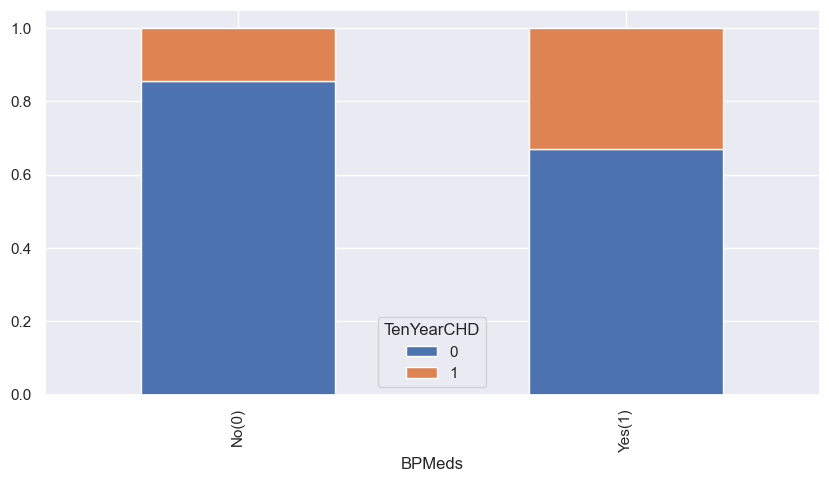

In [119]:
tmp = data1[["TenYearCHD", "BPMeds"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "BPMeds"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "BPMeds==\""+row["BPMeds"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="BPMeds", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))


In [120]:

# Hypothesis testing on "BPMeds" column
stat, p_val, dof = chi_sqred_ind_test(data1, "BPMeds", "TenYearCHD", 0.05)



Contigency table: 
 TenYearCHD     0    1
BPMeds               
No(0)       2812  478
Yes(1)        67   33
Statistic: 24.442672895212937
P-value: 7.6554102539106e-07
DOF: 1
probability=0.950, critical=3.841, stat=24.443
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [121]:

t = pd.crosstab(data1.BPMeds, data1["TenYearCHD"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=24.442672895212937, pvalue=7.6554102539106e-07, dof=1, expected_freq=array([[2794.07374631,  495.92625369],
       [  84.92625369,   15.07374631]]))

## Visualizing prevalentStroke

In [122]:
data1["prevalentStroke"].value_counts()

prevalentStroke
No(0)     3368
Yes(1)      22
Name: count, dtype: int64

##### Whether a person who had a stroke earlier more prone to CHD?

prevalentStroke
No(0)     3368
Yes(1)      22
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'prevalentStroke ratio Proposanate')

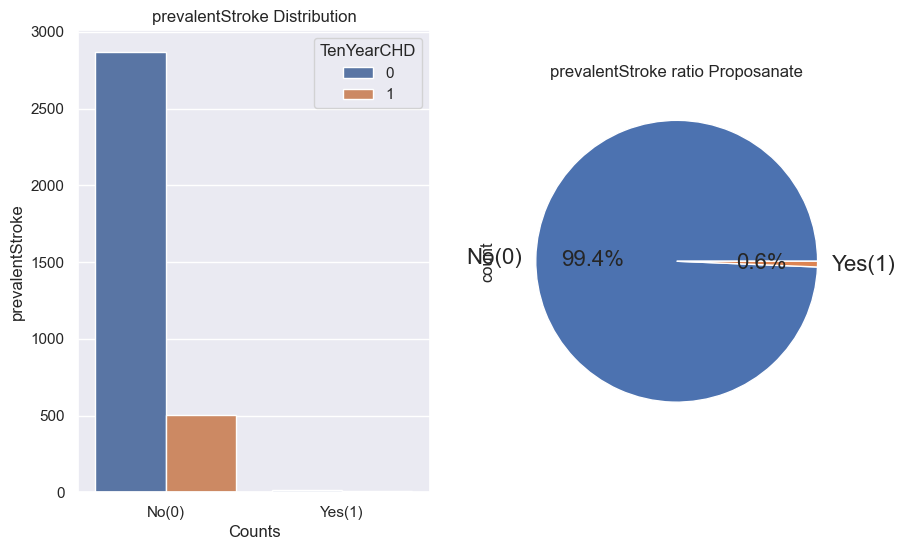

In [123]:
#  Distribution of "prevalentStroke"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="prevalentStroke", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('prevalentStroke')
plt.title('prevalentStroke Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['prevalentStroke'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('prevalentStroke ratio Proposanate')



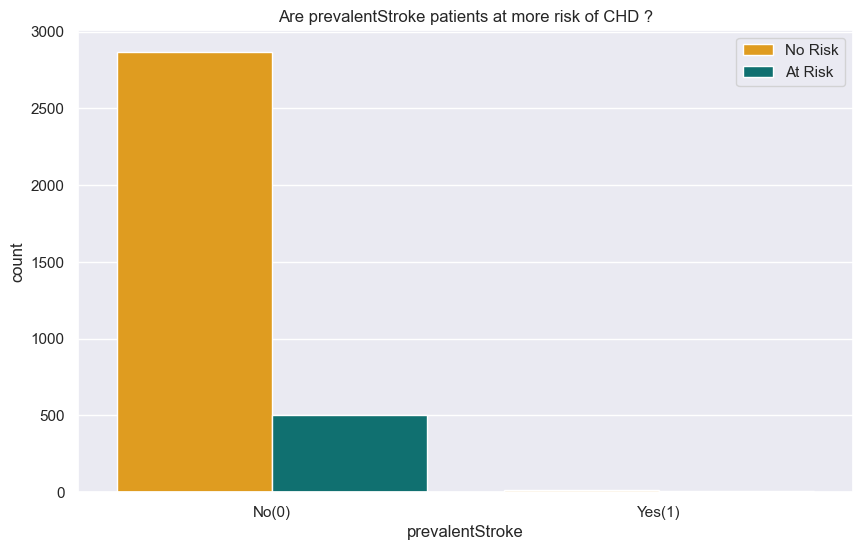

In [124]:

plt.figure(figsize = (10,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data1['prevalentStroke'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are prevalentStroke patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

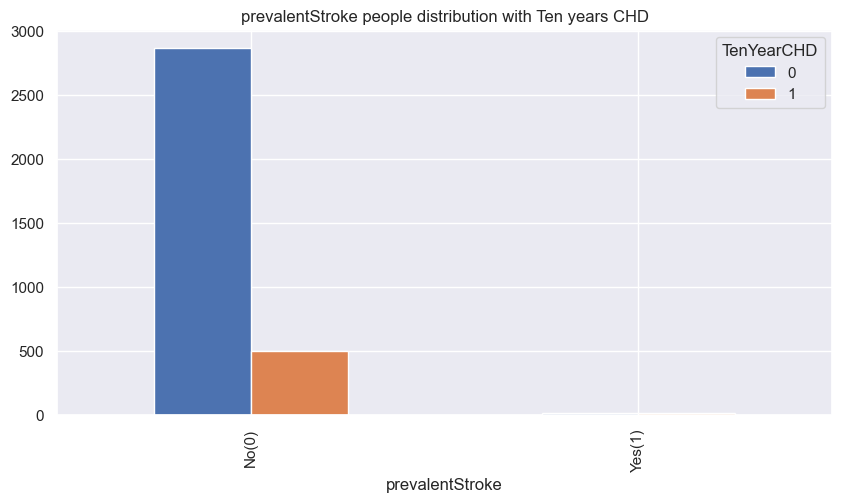

In [125]:
plt.rcParams['figure.figsize'] = (10, 5)
data1.groupby(['prevalentStroke','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

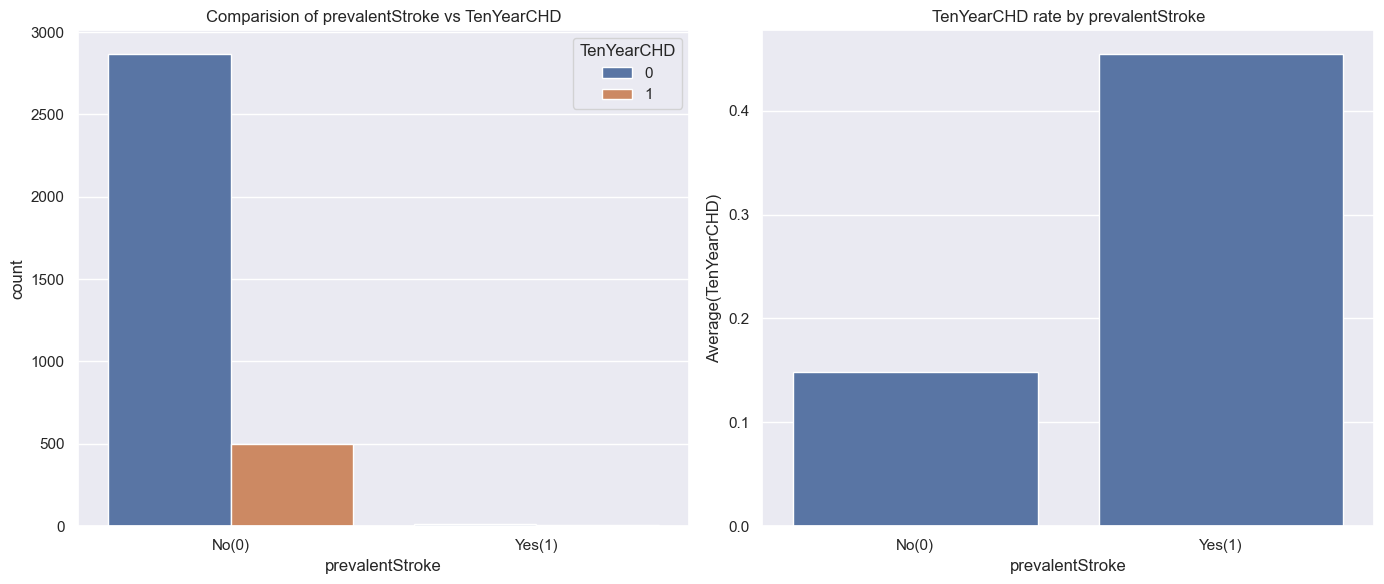

In [126]:
CategoricalVariables_targetPlots(data1,"prevalentStroke")

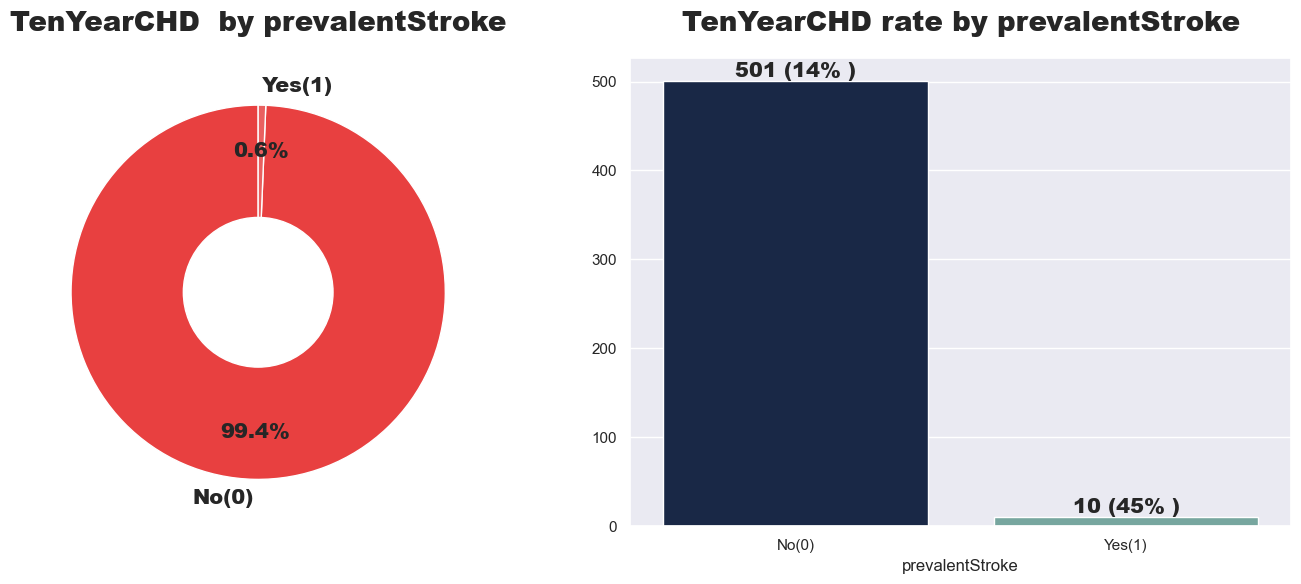

In [127]:
#Visualization to show TenYearCHD by prevalentStroke.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["prevalentStroke"].value_counts()
plt.title("TenYearCHD  by prevalentStroke", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by prevalentStroke.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["prevalentStroke"].value_counts()
# acceptance_rate = np.floor((value_2/value_1)*100).values
acceptance_rate = [14, 45]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by prevalentStroke",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




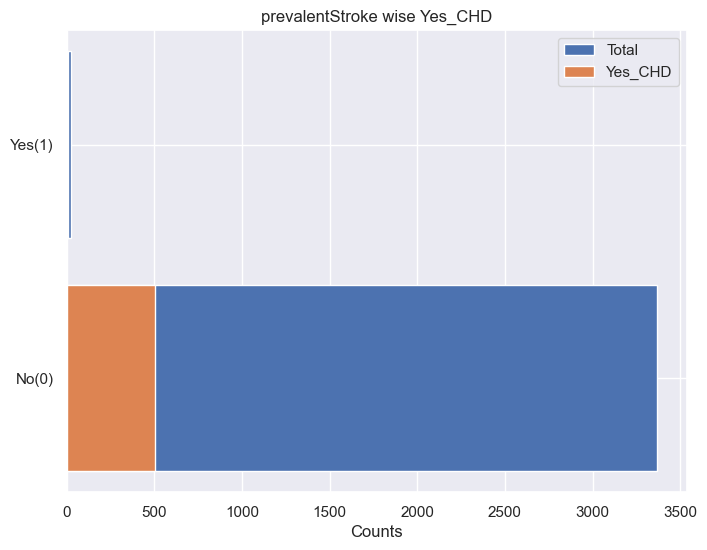

prevalentStroke  Total_Count  % of Total  Yes_CHD  No_CHD  %Yes_CHD  %No_CHD
0           No(0)         3368   99.351032      501    2867    14.875   85.125
1          Yes(1)           22    0.648968       10      12    45.455   54.545

In [128]:
Univariate_Analysis1("prevalentStroke")

TenYearCHD prevalentStroke  count  count_norm
0           0           No(0)   2867    0.851247
1           0          Yes(1)     12    0.545455
2           1           No(0)    501    0.148753
3           1          Yes(1)     10    0.454545

<Axes: xlabel='prevalentStroke'>

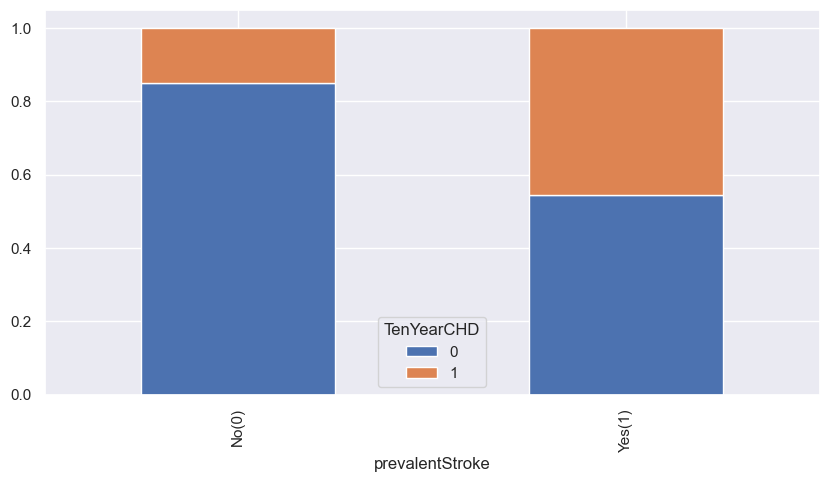

In [129]:
tmp = data1[["TenYearCHD", "prevalentStroke"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "prevalentStroke"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "prevalentStroke==\""+row["prevalentStroke"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="prevalentStroke", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))




In [130]:
# Hypothesis testing on "prevalentStroke" column
stat, p_val, dof = chi_sqred_ind_test(data1, "prevalentStroke", "TenYearCHD", 0.05)

Contigency table: 
 TenYearCHD          0    1
prevalentStroke           
No(0)            2867  501
Yes(1)             12   10
Statistic: 13.666246132442092
P-value: 0.0002183439934300794
DOF: 1
probability=0.950, critical=3.841, stat=13.666
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [131]:
t = pd.crosstab(data1.prevalentStroke, data1["TenYearCHD"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=13.666246132442092, pvalue=0.0002183439934300794, dof=1, expected_freq=array([[2860.31622419,  507.68377581],
       [  18.68377581,    3.31622419]]))

## Visualizing prevalentHyp

In [132]:
data1["prevalentHyp"].value_counts()

prevalentHyp
No(0)     2321
Yes(1)    1069
Name: count, dtype: int64

##### Are hypertensive patients at more risk of coronary heart disease ??

prevalentHyp
No(0)     2321
Yes(1)    1069
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'prevalentHyp ratio Proposanate')

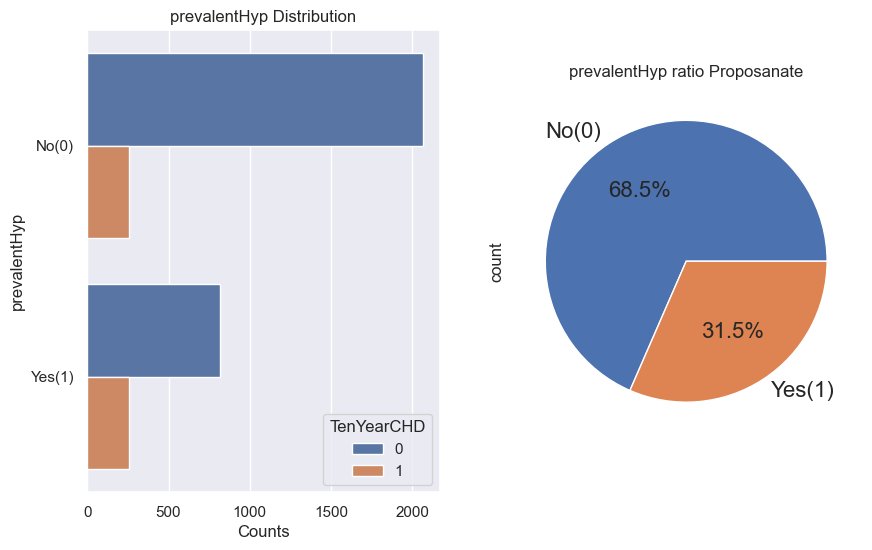

In [133]:
#  Distribution of "prevalentHyp"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="prevalentHyp", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('prevalentHyp')
plt.title('prevalentHyp Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['prevalentHyp'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('prevalentHyp ratio Proposanate')



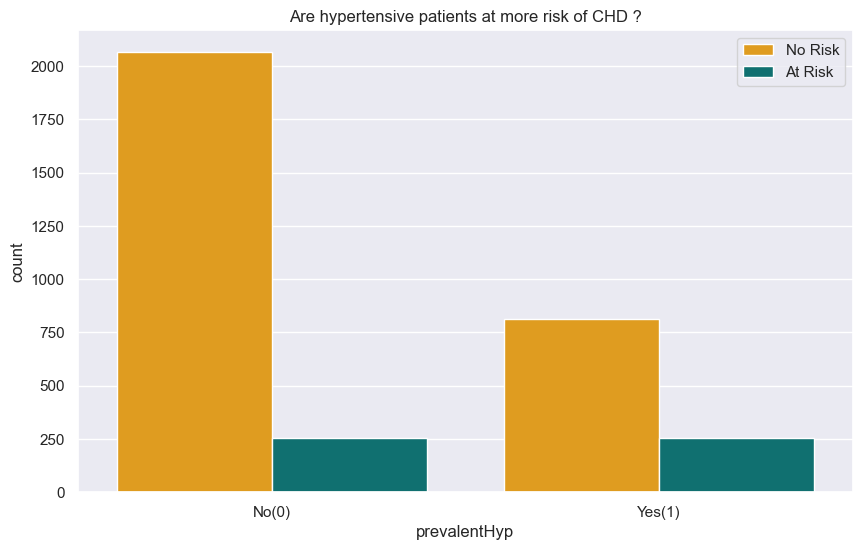

In [134]:
plt.figure(figsize = (10,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data1['prevalentHyp'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

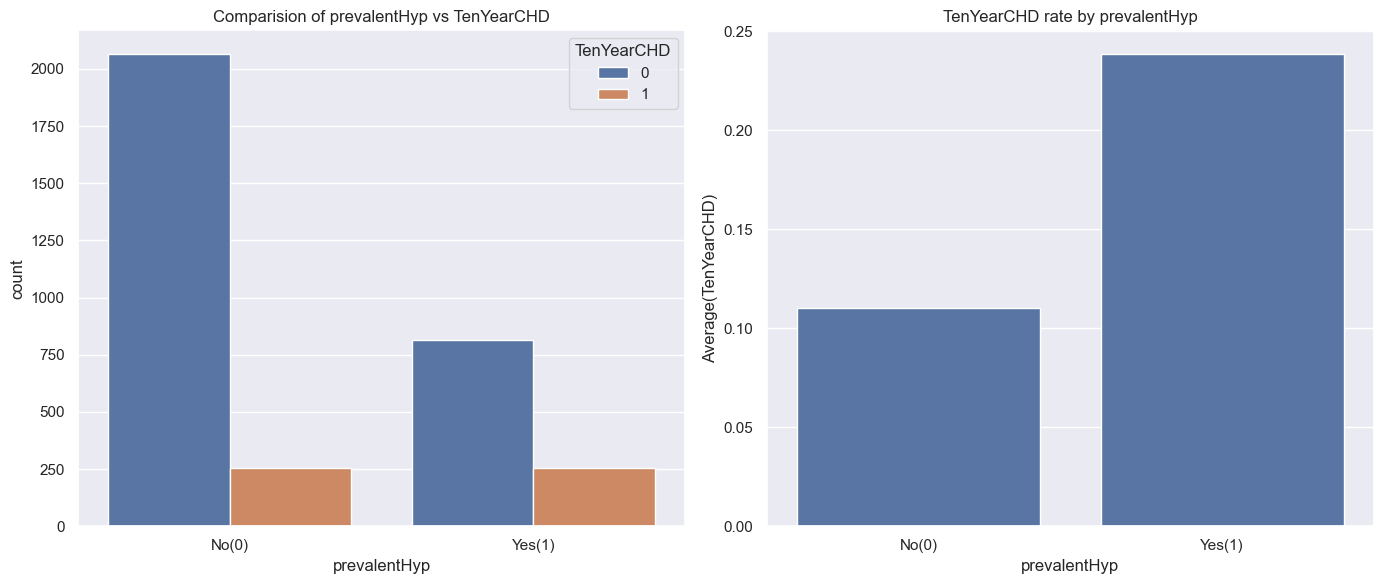

In [135]:
CategoricalVariables_targetPlots(data1,"prevalentHyp")

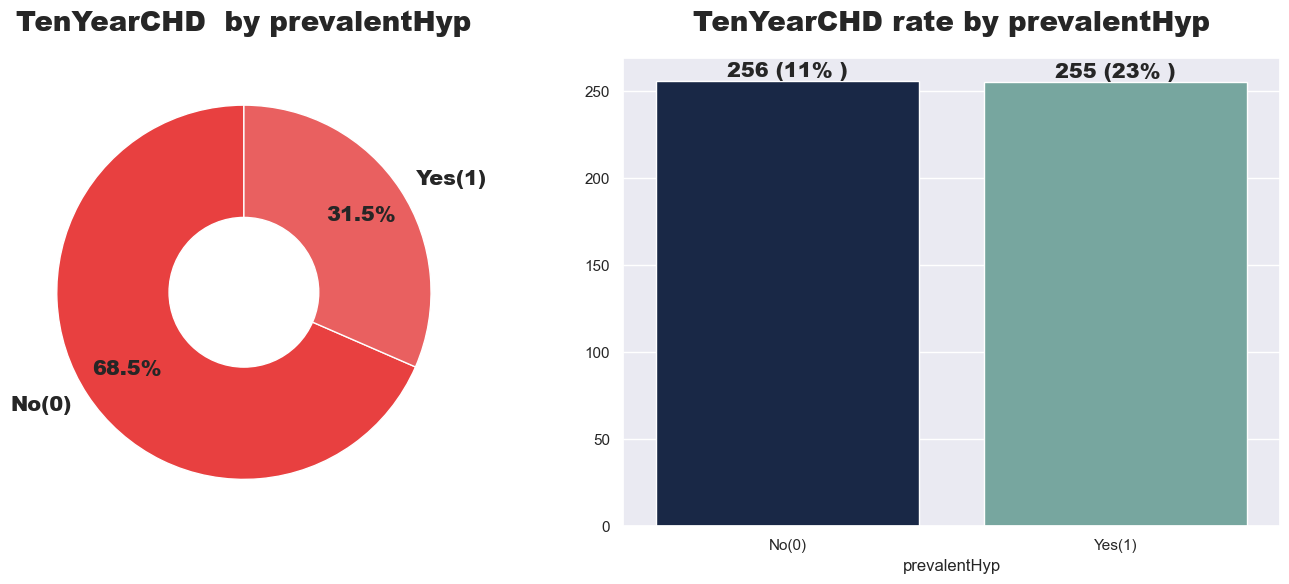

In [136]:
#Visualization to show TenYearCHD by prevalentHyp.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["prevalentHyp"].value_counts()
plt.title("TenYearCHD  by prevalentHyp", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by prevalentHyp.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["prevalentHyp"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
# acceptance_rate = [11, 23]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by prevalentHyp",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




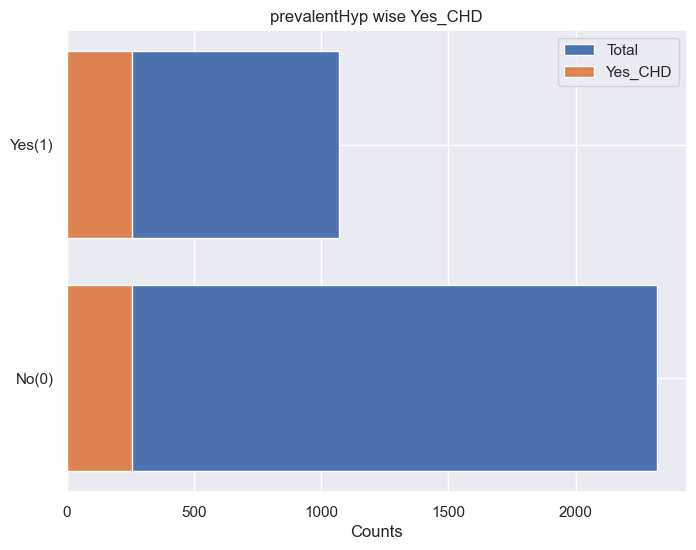

prevalentHyp  Total_Count  % of Total  Yes_CHD  No_CHD  %Yes_CHD  %No_CHD
0        No(0)         2321   68.466077      256    2065    11.030   88.970
1       Yes(1)         1069   31.533923      255     814    23.854   76.146

In [137]:
Univariate_Analysis1("prevalentHyp")

TenYearCHD prevalentHyp  count  count_norm
0           0        No(0)   2065    0.889703
1           0       Yes(1)    814    0.761459
2           1        No(0)    256    0.110297
3           1       Yes(1)    255    0.238541

<Axes: xlabel='prevalentHyp'>

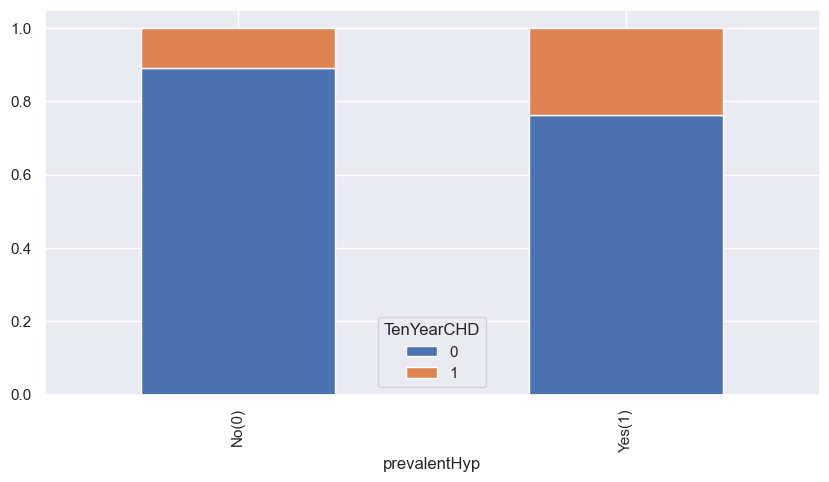

In [138]:
tmp = data1[["TenYearCHD", "prevalentHyp"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "prevalentHyp"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "prevalentHyp==\""+row["prevalentHyp"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="prevalentHyp", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))


In [139]:
# Hypothesis testing on "BPMeds" column
stat, p_val, dof = chi_sqred_ind_test(data1, "prevalentHyp", "TenYearCHD", 0.05)

Contigency table: 
 TenYearCHD       0    1
prevalentHyp           
No(0)         2065  256
Yes(1)         814  255
Statistic: 93.02951112773958
P-value: 5.152036591565972e-22
DOF: 1
probability=0.950, critical=3.841, stat=93.030
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [140]:
t = pd.crosstab(data1.prevalentHyp, data1["TenYearCHD"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=93.02951112773958, pvalue=5.152036591565972e-22, dof=1, expected_freq=array([[1971.13834808,  349.86165192],
       [ 907.86165192,  161.13834808]]))

## Visualizing diabetes

In [141]:
data1["diabetes"].value_counts()

diabetes
No(0)     3303
Yes(1)      87
Name: count, dtype: int64

##### Are diabetic patients at more risk of coronary heart disease ??

diabetes
No(0)     3303
Yes(1)      87
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'diabetes ratio Proposanate')

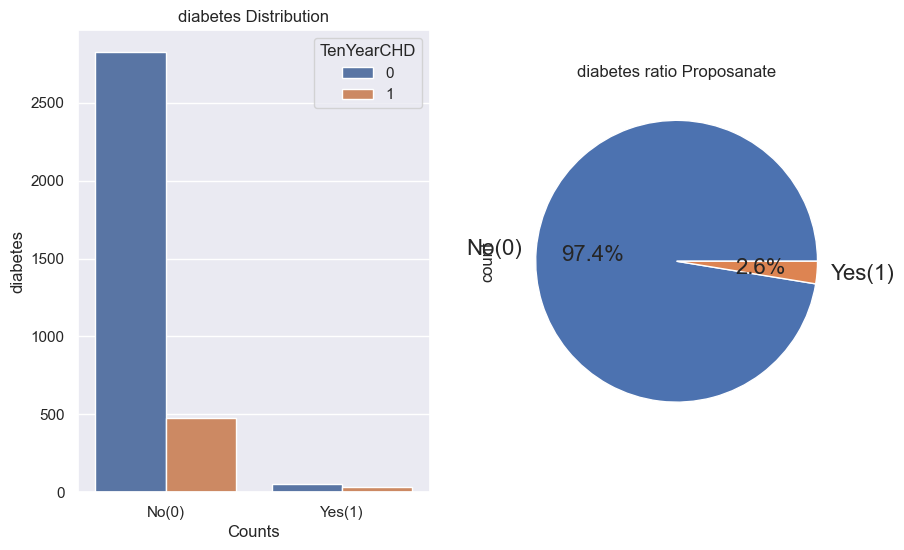

In [142]:
#  Distribution of "diabetes"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(x="diabetes", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('diabetes')
plt.title('diabetes Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['diabetes'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('diabetes ratio Proposanate')



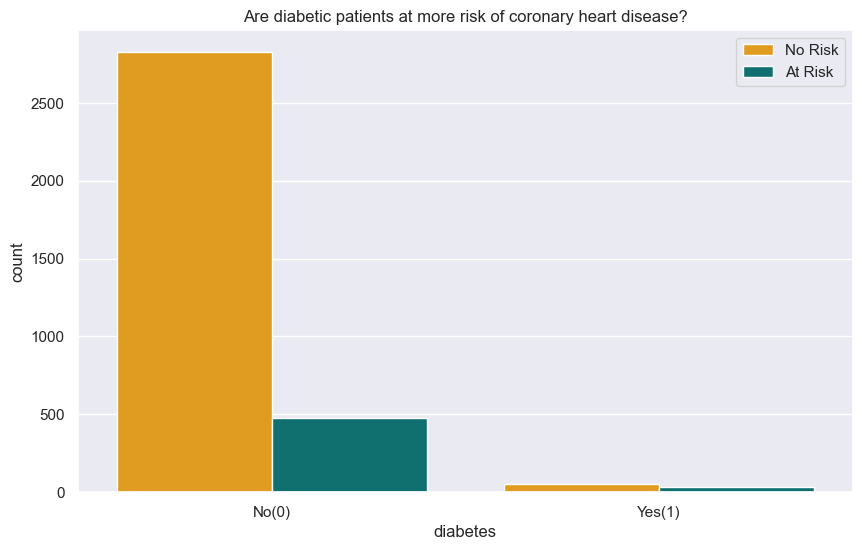

In [143]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,6))
sns.countplot(x = data1['diabetes'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

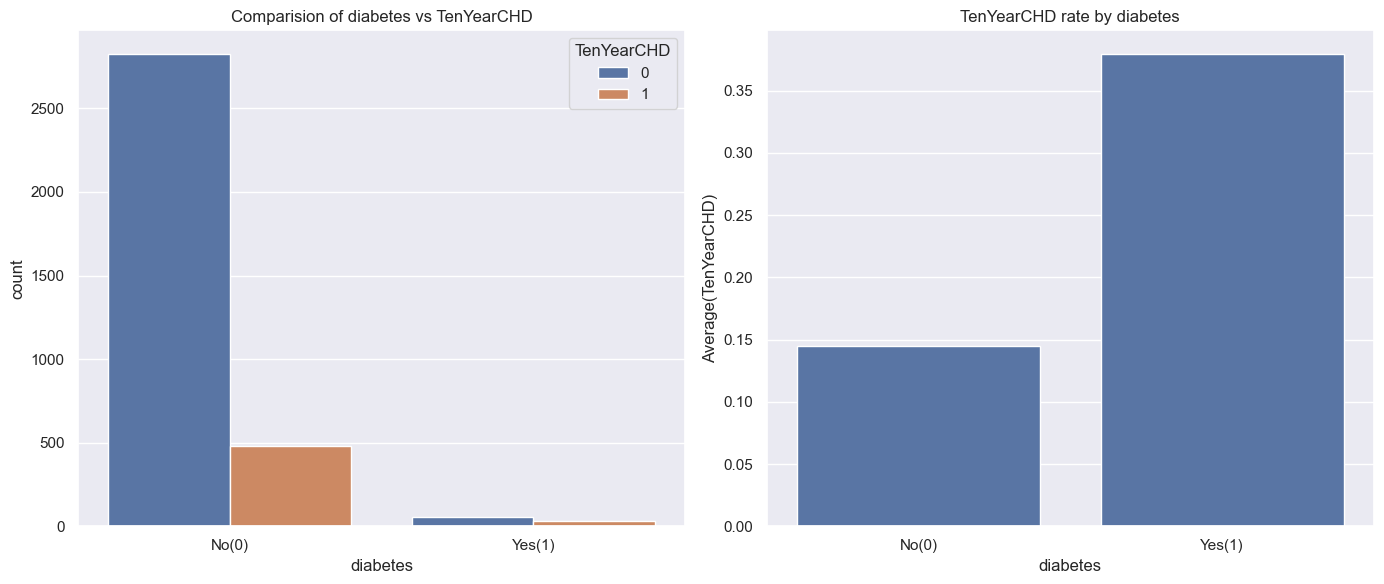

In [144]:
CategoricalVariables_targetPlots(data1,"diabetes")

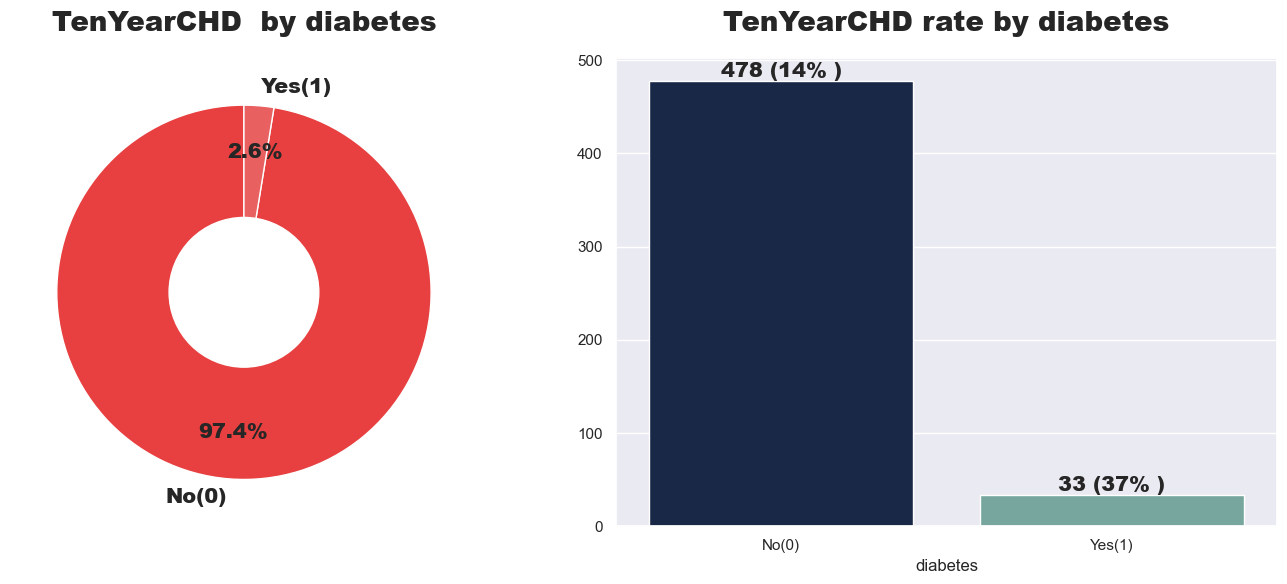

In [145]:
#Visualization to show TenYearCHD by diabetes.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["diabetes"].value_counts()
plt.title("TenYearCHD  by diabetes", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by diabetes.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["diabetes"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
# acceptance_rate = [16, 13]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by diabetes",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




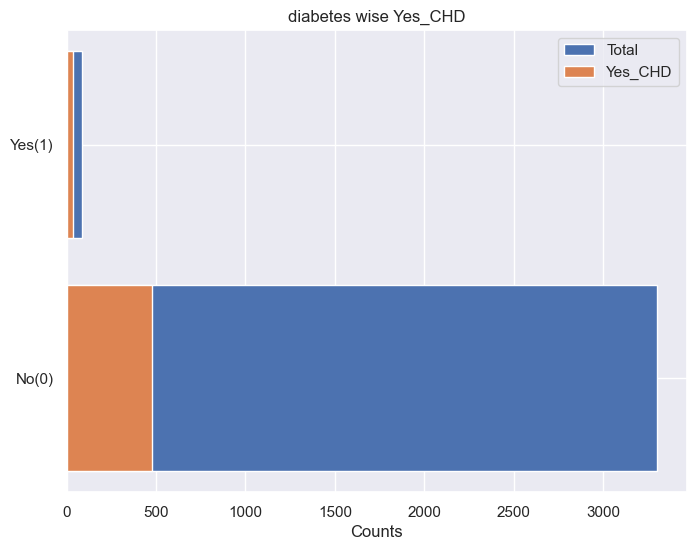

diabetes  Total_Count  % of Total  Yes_CHD  No_CHD  %Yes_CHD  %No_CHD
0    No(0)         3303   97.433628      478    2825    14.472   85.528
1   Yes(1)           87    2.566372       33      54    37.931   62.069

In [146]:
Univariate_Analysis1("diabetes")

TenYearCHD diabetes  count  count_norm
0           0    No(0)   2825    0.855283
1           0   Yes(1)     54    0.620690
2           1    No(0)    478    0.144717
3           1   Yes(1)     33    0.379310

<Axes: xlabel='diabetes'>

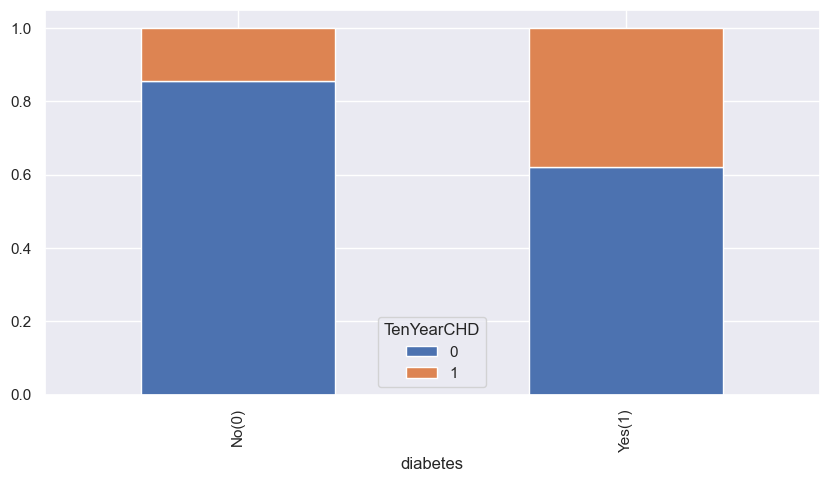

In [147]:
tmp = data1[["TenYearCHD", "diabetes"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "diabetes"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "diabetes==\""+row["diabetes"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="diabetes", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))




In [148]:
# Hypothesis testing on "diabetes" column
stat, p_val, dof = chi_sqred_ind_test(data1, "diabetes", "TenYearCHD", 0.05)

Contigency table: 
 TenYearCHD     0    1
diabetes             
No(0)       2825  478
Yes(1)        54   33
Statistic: 34.63203270914867
P-value: 3.982978687382329e-09
DOF: 1
probability=0.950, critical=3.841, stat=34.632
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


In [149]:
t = pd.crosstab(data1.diabetes, data1["TenYearCHD"], margins=False)
stats.chi2_contingency(observed=t)

Chi2ContingencyResult(statistic=34.63203270914867, pvalue=3.982978687382329e-09, dof=1, expected_freq=array([[2805.11415929,  497.88584071],
       [  73.88584071,   13.11415929]]))

## Visualizing totChol

In [150]:
data1["totChol"].unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326., 234.,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 264., 156.,
       260., 225., 183., 246., 174., 288., 254., 150., 211., 161., 274.,
       214., 195., 165., 302., 265., 251., 205., 209., 258., 222., 247.,
       189., 173., 281., 382., 181., 200., 244., 218., 261., 229., 291.,
       312., 170., 176., 290., 204., 239., 162., 314., 194., 271., 313.,
       305., 285., 169., 224., 201., 185., 307., 179., 280., 219., 391.,
       300., 253., 345., 278., 282., 255., 191., 439., 327., 287., 236.,
       332., 207., 230., 155., 335., 325., 223., 231., 197., 184., 310.,
       157., 228., 166., 303., 320., 163., 259., 178., 137., 217., 342.,
       328., 168., 167., 299., 304., 152., 289., 30

In [151]:
data1["totChol"].nunique()

240

##### Are Total Cholestrol levels related to coronary heart disease ??

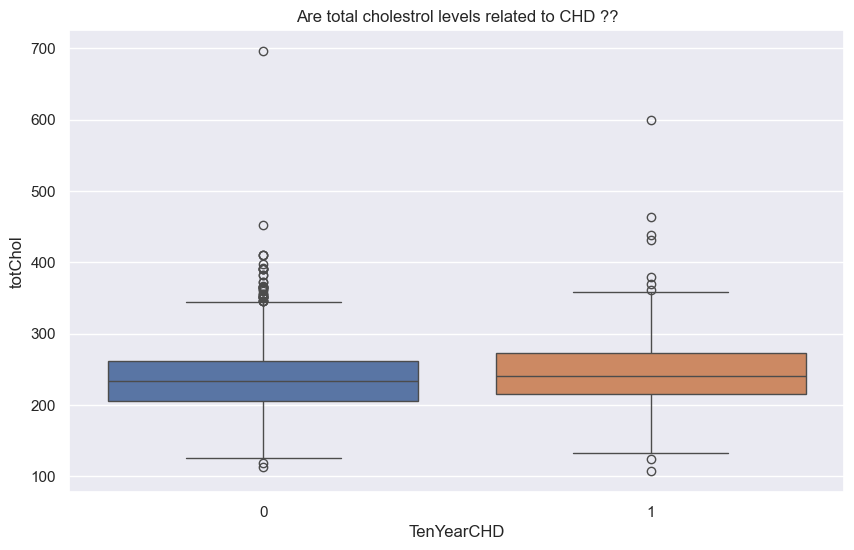

In [152]:
plt.figure(figsize = (10,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.boxplot(x=data1['TenYearCHD'], y=data1['totChol'], palette = sns.color_palette())
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

Text(0.5, 1.0, 'totChol Distrubution')

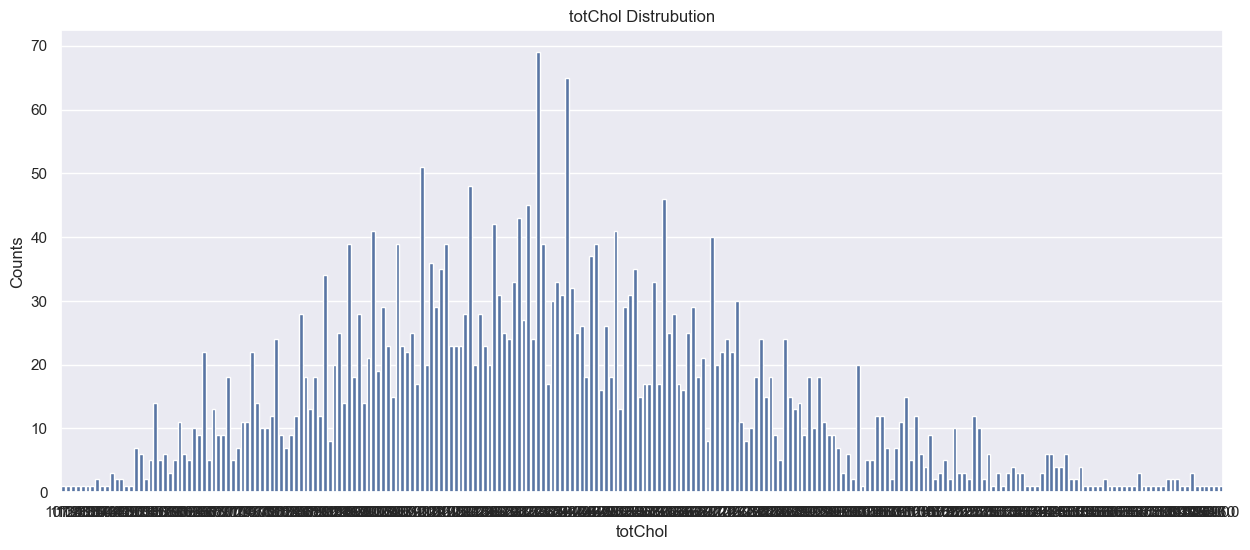

In [153]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['totChol'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('totChol Distrubution')

<Axes: xlabel='totChol', ylabel='count'>

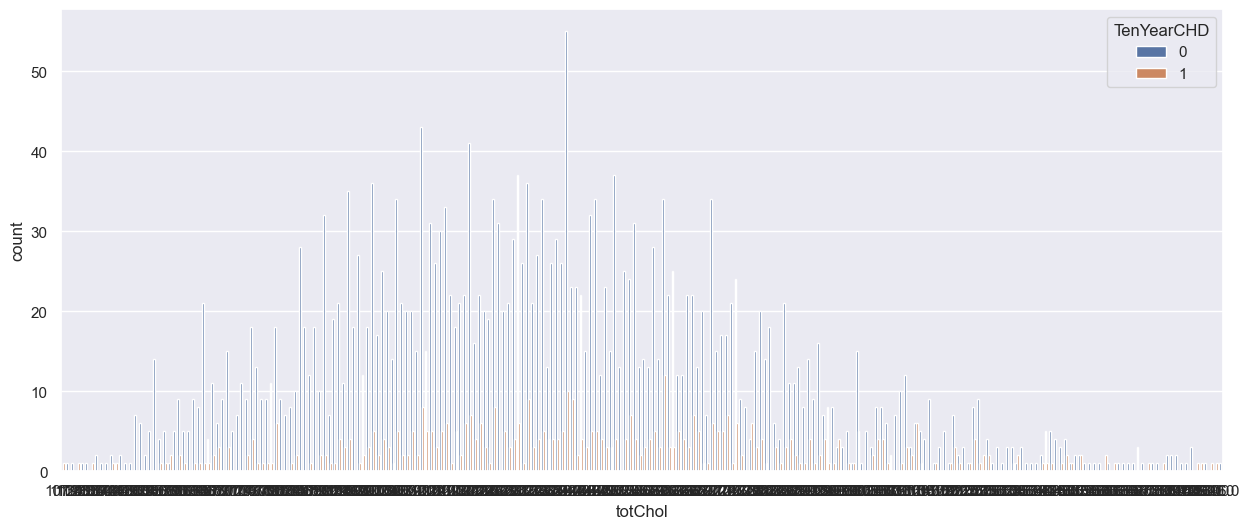

In [154]:
plt.figure(figsize=(15,6))
sns.countplot(x="totChol", hue="TenYearCHD", data=data)

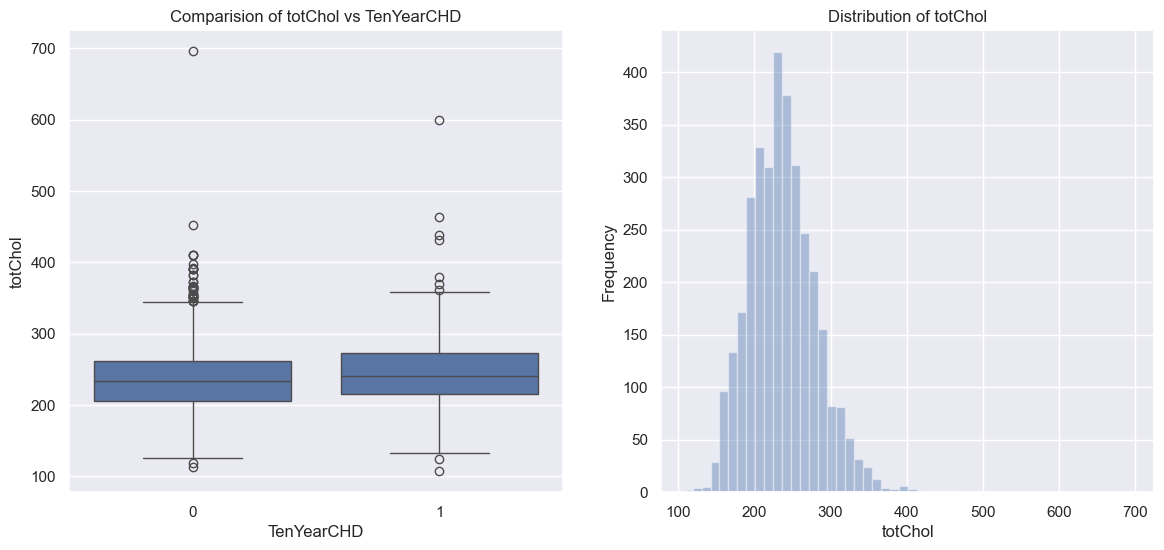

In [155]:
NumericalVariables_targetPlots(data1,segment_by="totChol")

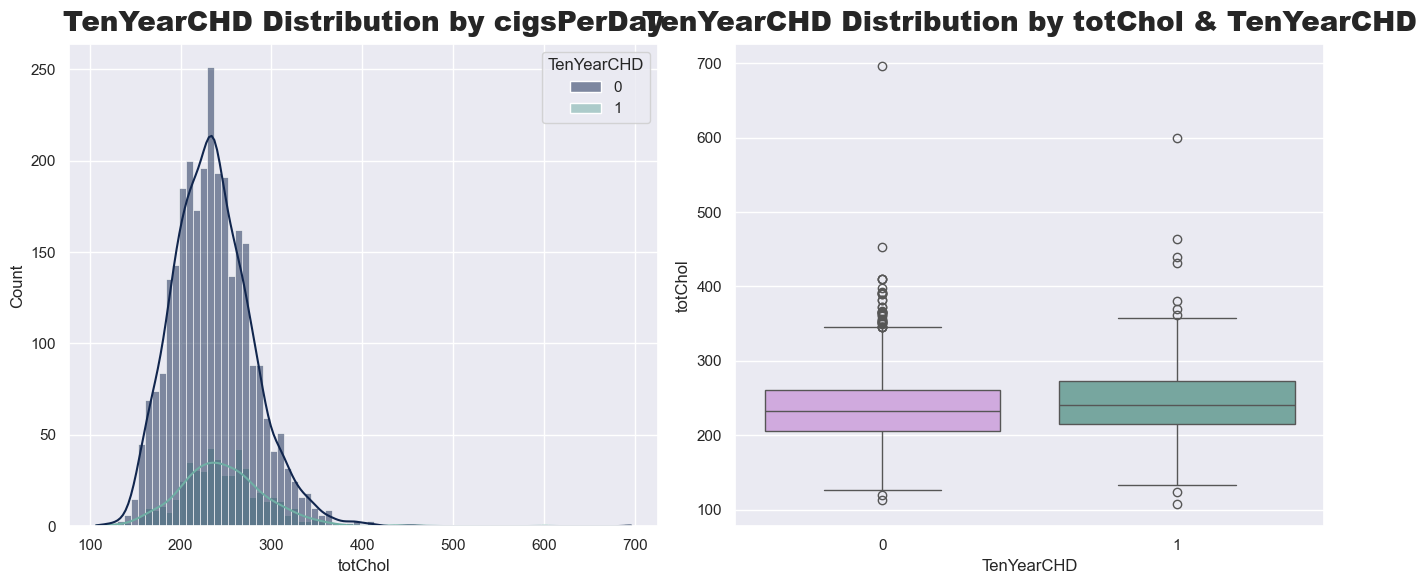

In [156]:
#Visualization to show CHD Distribution by cigsPerDay.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="totChol",hue="TenYearCHD",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("TenYearCHD Distribution by cigsPerDay",fontweight="black",size=20,pad=10)


#Visualization to show CHD Distribution by cigsPerDay & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="TenYearCHD",y="totChol",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("TenYearCHD Distribution by totChol & TenYearCHD",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

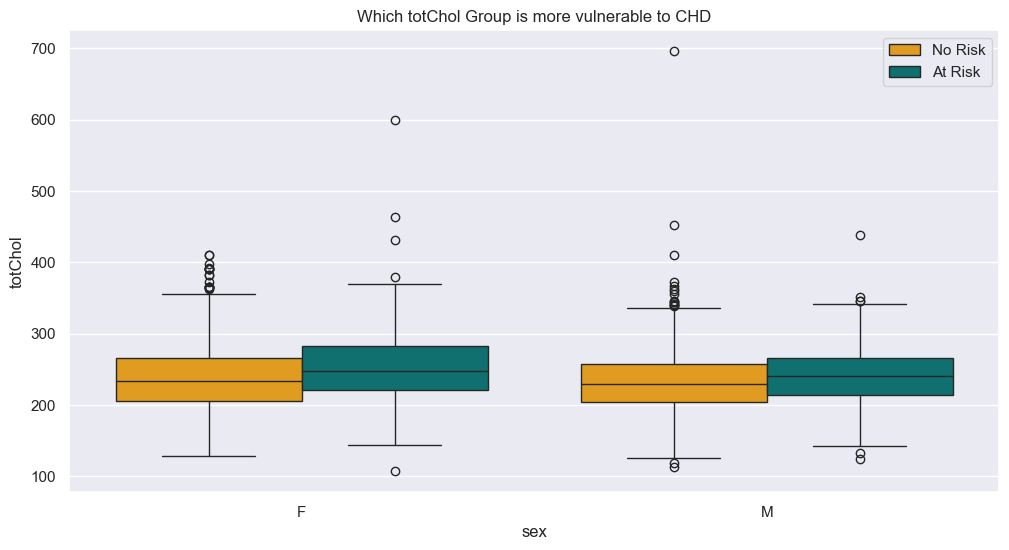

In [157]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data1['sex'], y = data1['totChol'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which totChol Group is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

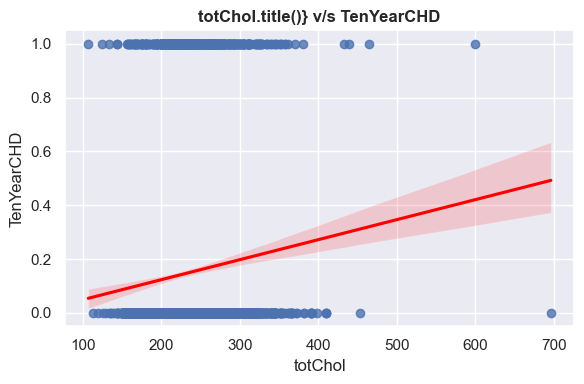

In [158]:
plt.figure(figsize=(6,4))
sns.regplot(x = data1["totChol"], y =data1['TenYearCHD'],line_kws={"color": "red"})
plt.title('totChol.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='totChol'>

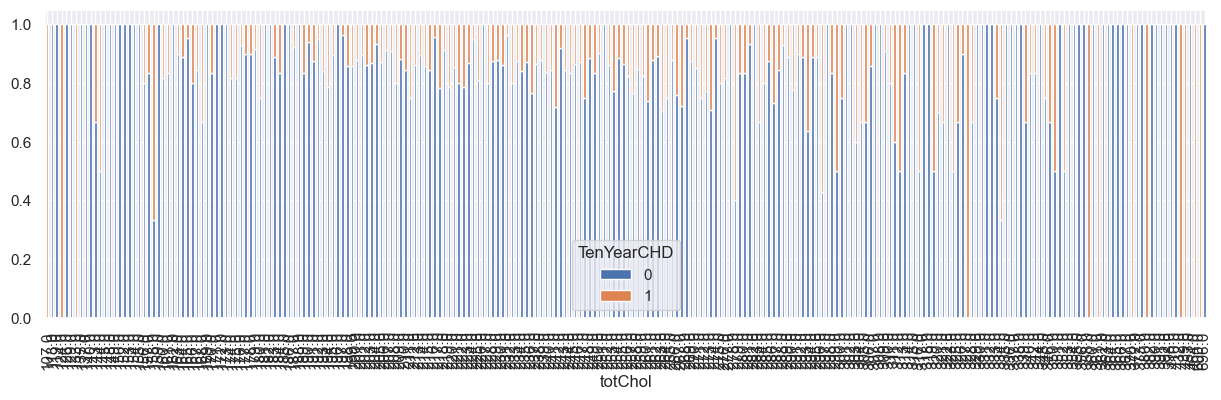

In [159]:
tmp = data1[["TenYearCHD", "totChol"]]
tmp["totChol"] = tmp["totChol"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "totChol"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "totChol==\""+row["totChol"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="TenYearCHD", index="totChol", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))

In [160]:
# Hypothesis Test (z-test)
Hypothesisztest(data1["totChol"][data1["TenYearCHD"]==1], data1["totChol"][data1["TenYearCHD"]==0])

Yes_mean : 247.03522504892368
**************************************************
No_mean : 235.26571726293852
**************************************************
Yes_std : 49.154605352410414
**************************************************
No_std : 43.9873067731546
**************************************************
stats : 5.472428011978694
**************************************************
p_val : 4.439111050422782e-08
We Reject Null Hypothesis i.e means of two groups not equal


In [161]:
# Hypothesis Test (z-test)

Hypothesisztest(x1=data1.query("TenYearCHD == 1")["totChol"], x2=data1.query("TenYearCHD == 0")["totChol"])

Yes_mean : 247.03522504892368
**************************************************
No_mean : 235.26571726293852
**************************************************
Yes_std : 49.154605352410414
**************************************************
No_std : 43.9873067731546
**************************************************
stats : 5.472428011978694
**************************************************
p_val : 4.439111050422782e-08
We Reject Null Hypothesis i.e means of two groups not equal


In [162]:
# Hypothesis Test (z-test)
Hypothesisztest(data["totChol"][data["TenYearCHD"]==1], data["totChol"][data["TenYearCHD"]==0])

Yes_mean : 247.21626984126985
**************************************************
No_mean : 235.27949438202248
**************************************************
Yes_std : 49.471228391291675
**************************************************
No_std : 44.22594032745406
**************************************************
stats : nan
**************************************************
p_val : nan
We fails to Reject Null Hypothesis i.e means of two groups are equal


In [163]:
# Hypothesis Test (z-test)

Hypothesisztest(x1=data.query("TenYearCHD == 1")["totChol"], x2=data.query("TenYearCHD == 0")["totChol"])

Yes_mean : 247.21626984126985
**************************************************
No_mean : 235.27949438202248
**************************************************
Yes_std : 49.471228391291675
**************************************************
No_std : 44.22594032745406
**************************************************
stats : nan
**************************************************
p_val : nan
We fails to Reject Null Hypothesis i.e means of two groups are equal


In [164]:
# Hypothesis Test (t-test)

Hypothesisttest(data1["totChol"][data1["TenYearCHD"]==1], data1["totChol"][data1["TenYearCHD"]==0])

Yes_mean : 247.03522504892368
**************************************************
No_mean : 235.26571726293852
**************************************************
Yes_std : 49.154605352410414
**************************************************
No_std : 43.9873067731546
**************************************************
statics : 5.472428011978694
**************************************************
p_val : 4.761617144774368e-08
We Reject Null Hypothesis i.e means of two groups not equal


In [165]:
# Hypothesis Test (t-test)

Hypothesisttest(x1=data.query("TenYearCHD == 1")["totChol"], x2=data.query("TenYearCHD == 0")["totChol"])

Yes_mean : 247.21626984126985
**************************************************
No_mean : 235.27949438202248
**************************************************
Yes_std : 49.471228391291675
**************************************************
No_std : 44.22594032745406
**************************************************
statics : nan
**************************************************
p_val : nan
We fails to Reject Null Hypothesis i.e means of two groups are equal


**Inference**
This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

## Visualizing sysBP

In [166]:
data1["sysBP"].unique()

array([148. , 168. , 116. , 158. , 136.5, 182. , 232. , 102. , 126. ,
       144. , 185. , 138. ,  96. , 146.5, 160. , 146. , 163. , 129. ,
       122.5, 130. , 141. , 142. , 113. , 172.5, 107. , 105. , 122. ,
       155. , 134. , 152. , 142.5, 149. , 106.5, 186.5, 114. , 104. ,
       101. , 112. , 165. , 131. , 111. , 133. , 109. , 121.5, 120. ,
       178. , 150. , 152.5, 193. , 151. , 118.5, 125. , 110. , 136. ,
       113.5, 127. , 115. , 108. , 103. , 124. , 135. , 118. , 132. ,
       128. , 100. , 115.5, 127.5, 123. , 174.5, 129.5, 117. , 117.5,
       147. , 177.5, 109.5, 157.5, 106. , 112.5, 107.5, 137. , 124.5,
       192. , 207. , 119. , 179.5, 157. , 176. ,  90. , 140. , 159. ,
       150.5, 202. , 116.5, 108.5, 158.5, 169. , 121. ,  95. , 120.5,
       156. , 145. , 141.5, 143.5, 119.5, 131.5, 125.5, 180. , 105.5,
       126.5, 153. , 154. , 182.5, 166.5, 175. , 170. , 143. ,  99. ,
       244. , 161.5, 100.5, 132.5, 139. , 186. ,  94. , 172. , 149.5,
       137.5, 191. ,

In [167]:
data1["sysBP"].nunique()

226

##### Are patients with systolic BP at risk of CHD?

Text(0.5, 1.0, 'sysBP Distrubution')

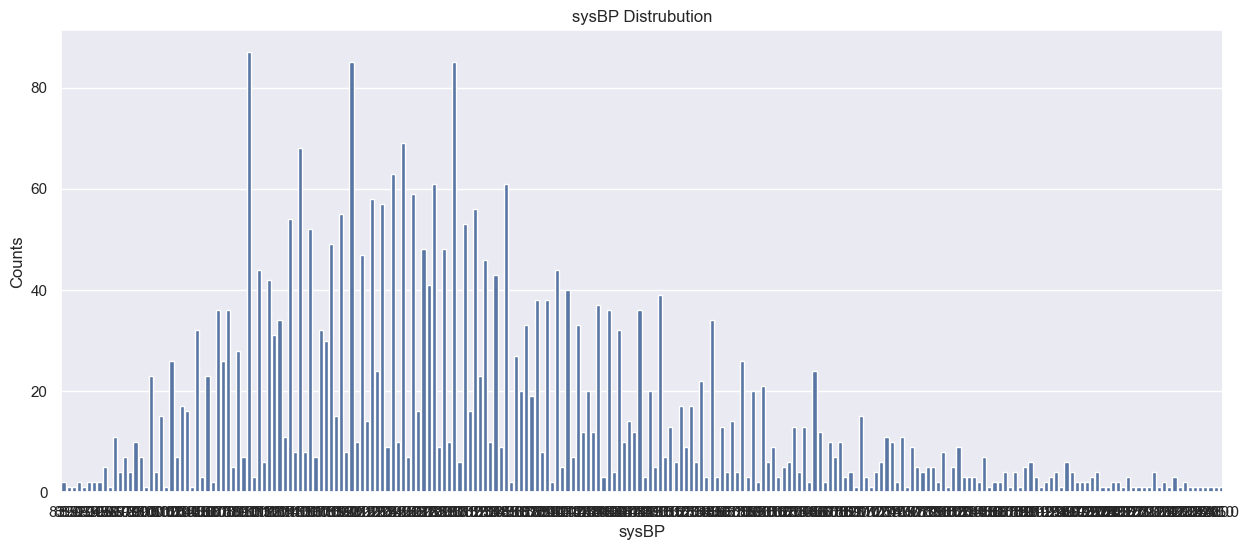

In [168]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['sysBP'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('sysBP Distrubution')

<Axes: xlabel='sysBP', ylabel='count'>

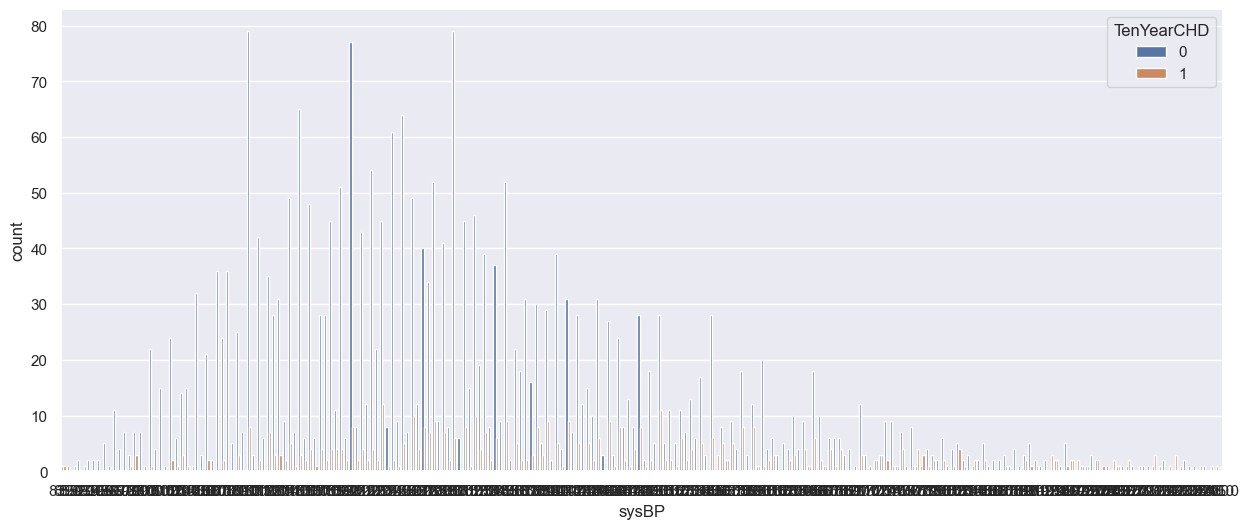

In [169]:
plt.figure(figsize=(15,6))
sns.countplot(x="sysBP", hue="TenYearCHD", data=data)

In [170]:
# plt.figure(figsize = (10,6))
# sns.boxplot(x=data1['TenYearCHD'], y=data1['sysBP'], palette = my_palette)
# plt.title("Are patients with systolic BP at risk of CHD?")
# plt.show()

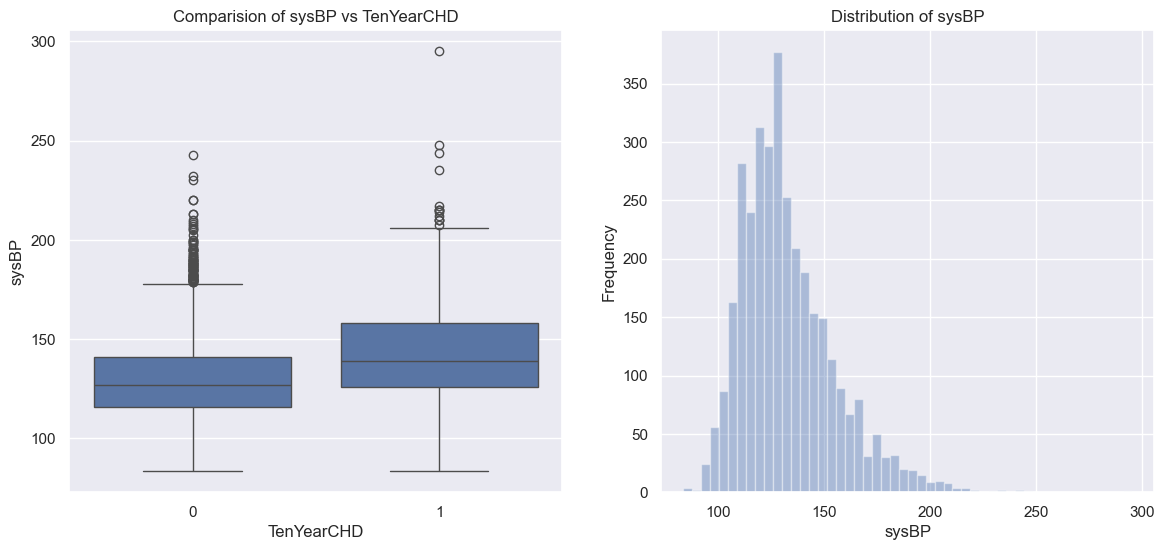

In [171]:
NumericalVariables_targetPlots(data1,segment_by="sysBP")

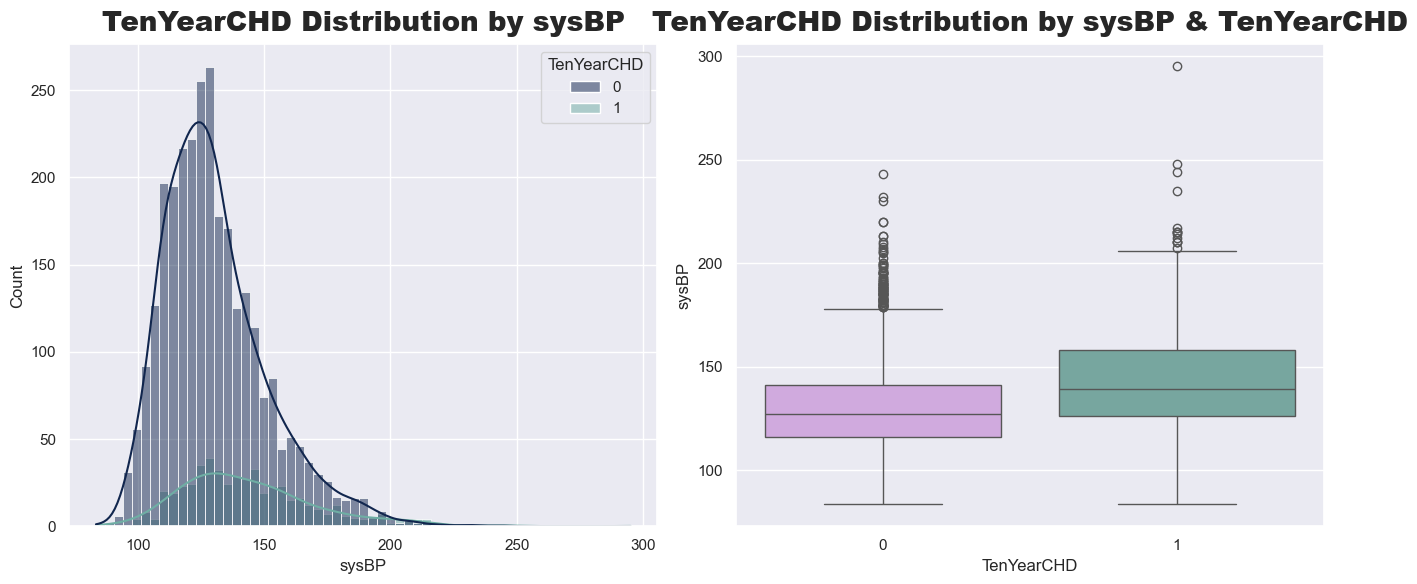

In [172]:
#Visualization to show CHD Distribution by sysBP.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="sysBP",hue="TenYearCHD",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("TenYearCHD Distribution by sysBP",fontweight="black",size=20,pad=10)


#Visualization to show CHD Distribution by sysBP & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="TenYearCHD",y="sysBP",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("TenYearCHD Distribution by sysBP & TenYearCHD",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

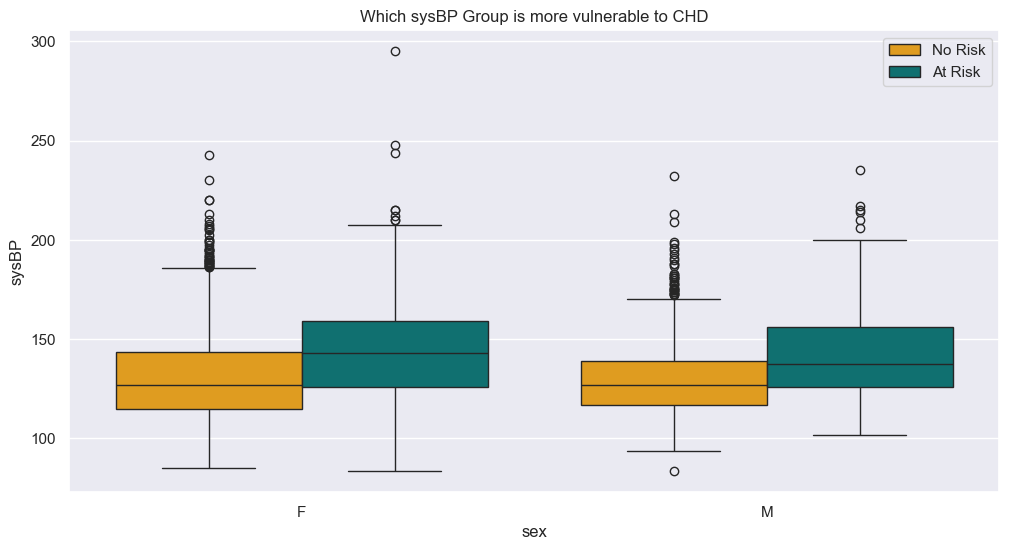

In [173]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data1['sex'], y = data1['sysBP'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which sysBP Group is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

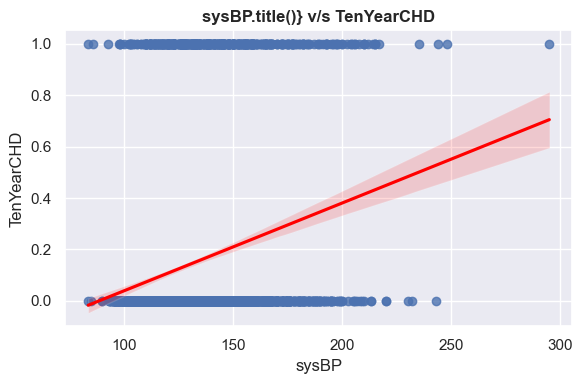

In [174]:
plt.figure(figsize=(6,4))
sns.regplot(x = data1["sysBP"], y =data1['TenYearCHD'],line_kws={"color": "red"})
plt.title('sysBP.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='sysBP'>

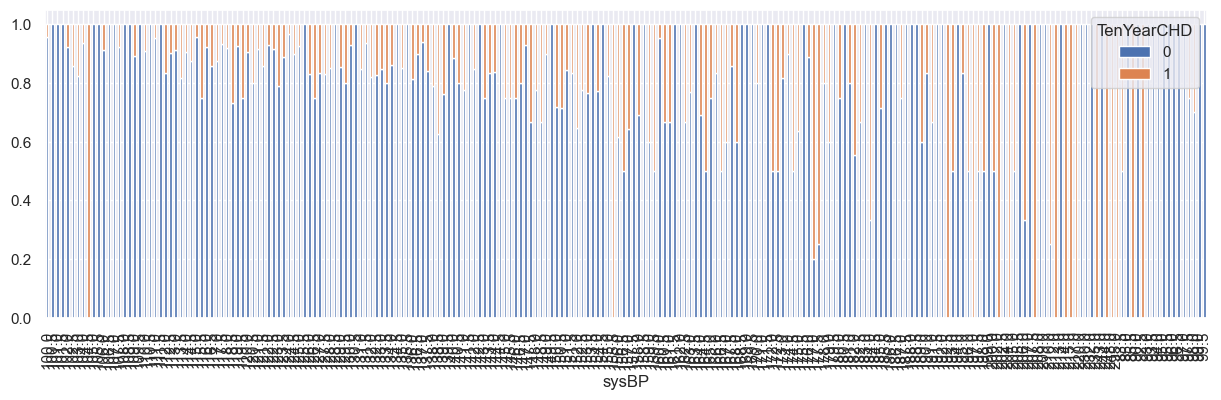

In [175]:
tmp = data1[["TenYearCHD", "sysBP"]]
tmp["sysBP"] = tmp["sysBP"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "sysBP"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "sysBP==\""+row["sysBP"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="TenYearCHD", index="sysBP", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))

In [176]:
# Hypothesis Test (z-test)
Hypothesisztest(data1["sysBP"][data1["TenYearCHD"]==1], data1["sysBP"][data1["TenYearCHD"]==0])

Yes_mean : 143.8542074363992
**************************************************
No_mean : 130.60385550538382
**************************************************
Yes_std : 27.061219211335334
**************************************************
No_std : 20.710452548282294
**************************************************
stats : 12.670642025318122
**************************************************
p_val : 8.600756100235644e-37
We Reject Null Hypothesis i.e means of two groups not equal


In [177]:
# Hypothesis Test (z-test)

Hypothesisztest(x1=data1.query("TenYearCHD == 1")["sysBP"], x2=data1.query("TenYearCHD == 0")["sysBP"])

Yes_mean : 143.8542074363992
**************************************************
No_mean : 130.60385550538382
**************************************************
Yes_std : 27.061219211335334
**************************************************
No_std : 20.710452548282294
**************************************************
stats : 12.670642025318122
**************************************************
p_val : 8.600756100235644e-37
We Reject Null Hypothesis i.e means of two groups not equal


In [178]:
# Hypothesis Test (t-test)

Hypothesisttest(data1["sysBP"][data1["TenYearCHD"]==1], data1["sysBP"][data1["TenYearCHD"]==0])


Yes_mean : 143.8542074363992
**************************************************
No_mean : 130.60385550538382
**************************************************
Yes_std : 27.061219211335334
**************************************************
No_std : 20.710452548282294
**************************************************
statics : 12.670642025318122
**************************************************
p_val : 5.5635302193044975e-36
We Reject Null Hypothesis i.e means of two groups not equal


In [179]:
# Hypothesis Test (t-test)

Hypothesisttest(x1=data1.query("TenYearCHD == 1")["sysBP"], x2=data1.query("TenYearCHD == 0")["sysBP"])

Yes_mean : 143.8542074363992
**************************************************
No_mean : 130.60385550538382
**************************************************
Yes_std : 27.061219211335334
**************************************************
No_std : 20.710452548282294
**************************************************
statics : 12.670642025318122
**************************************************
p_val : 5.5635302193044975e-36
We Reject Null Hypothesis i.e means of two groups not equal


## Visualizing diaBP

In [180]:
data1["diaBP"].unique()




array([ 85. ,  98. ,  71. ,  88. , 121. , 136. ,  68. ,  78. ,  81. ,
        86.5,  62. ,  97. , 120. ,  89. , 105. ,  93. ,  91. ,  92. ,
        86. ,  73. ,  70. ,  74.5,  84. ,  80. ,  82. ,  70.5,  74. ,
        63. ,  65. ,  76. ,  64. , 106. ,  75.5,  79.5,  89.5,  83. ,
        94. ,  97.5,  75. ,  57. ,  90. ,  87. , 103. ,  96. , 104. ,
        82.5,  80.5,  66.5, 100. ,  72. ,  99. ,  67.5,  77.5,  85.5,
        95. ,  79. ,  77. ,  69. ,  72.5,  73.5, 101.5,  62.5,  96.5,
        68.5, 102. , 122.5, 114. ,  60. ,  84.5, 124. , 100.5,  59. ,
        88.5, 108. ,  66. ,  67. ,  95.5, 107. ,  78.5, 101. ,  92.5,
        81.5,  91.5,  98.5,  93.5, 109.5,  61. ,  76.5, 115.5,  87.5,
        83.5, 109. ,  64.5, 104.5,  94.5, 110. ,  55. , 102.5,  59.5,
       107.5, 130. ,  61.5, 129. ,  65.5,  60.5,  58. ,  48. , 106.5,
       116. , 118. , 111. , 115. , 113. , 117. , 103.5,  71.5,  50. ,
       105.5, 112. , 135. ,  54. , 112.5, 125. ,  52. , 133. , 123. ,
       128. , 117.5,

In [181]:
data1["diaBP"].nunique()

142

##### Are patients with Diastolic BP at risk of CHD?

Text(0.5, 1.0, 'diaBP Distrubution')

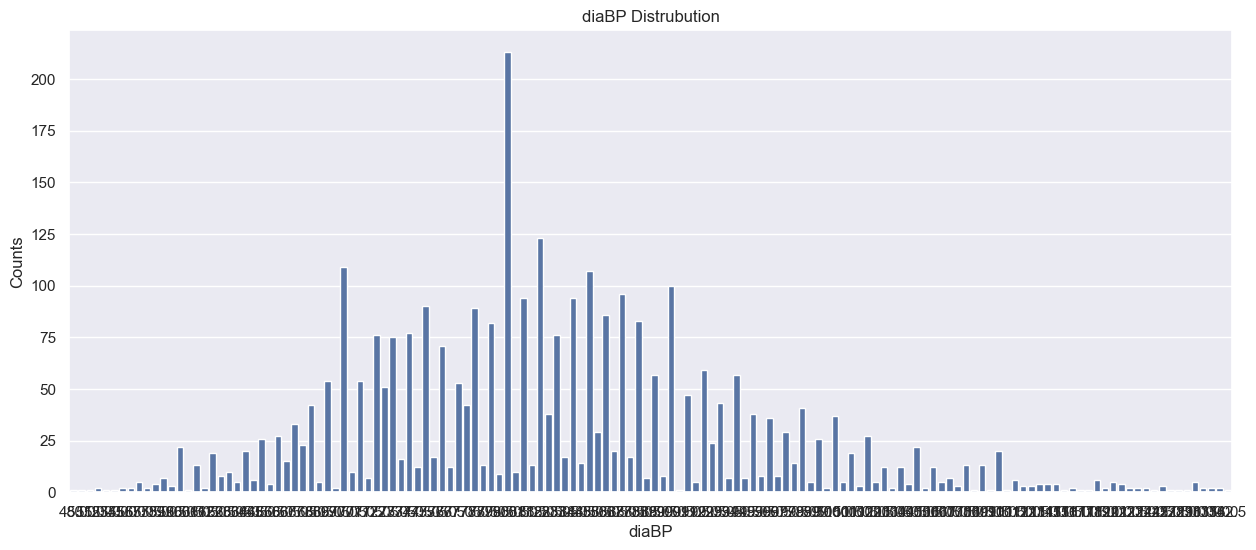

In [182]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['diaBP'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('diaBP Distrubution')

<Axes: xlabel='diaBP', ylabel='count'>

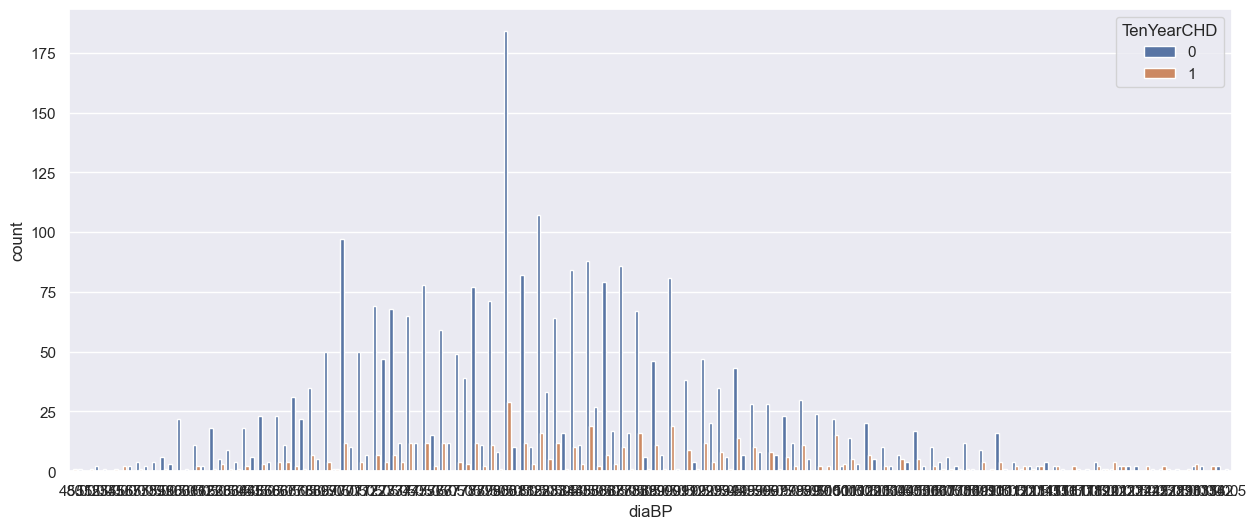

In [183]:
plt.figure(figsize=(15,6))
sns.countplot(x="diaBP", hue="TenYearCHD", data=data)

In [184]:
# plt.figure(figsize = (10,6))
# sns.boxplot(x=data1['TenYearCHD'], y=data1['diaBP'], palette = my_palette)
# plt.title("Are patients with Diastolic BP at risk of CHD?")
# plt.show()

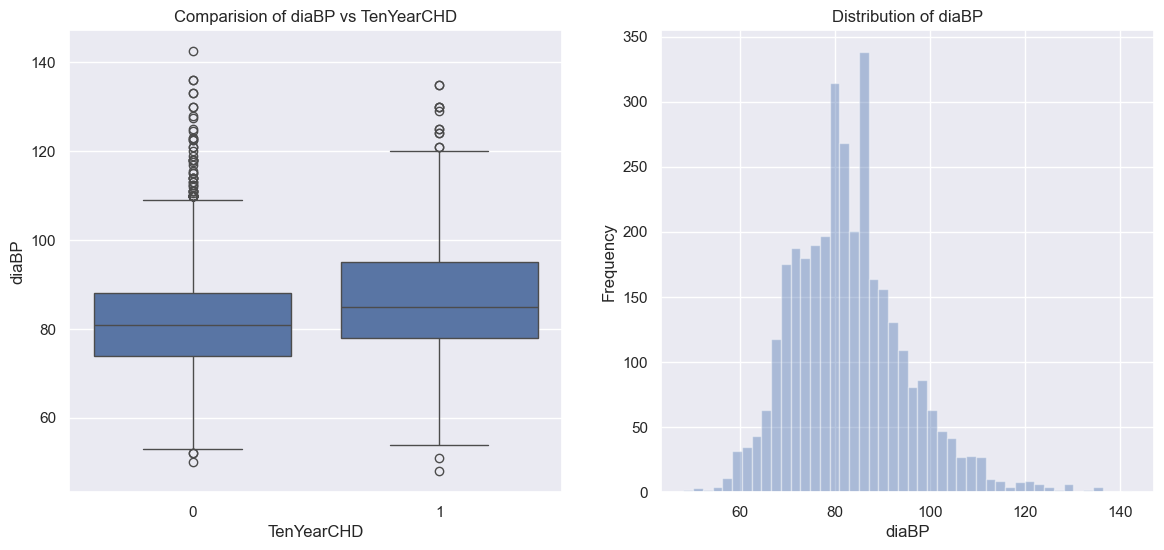

In [185]:
NumericalVariables_targetPlots(data1,segment_by="diaBP")

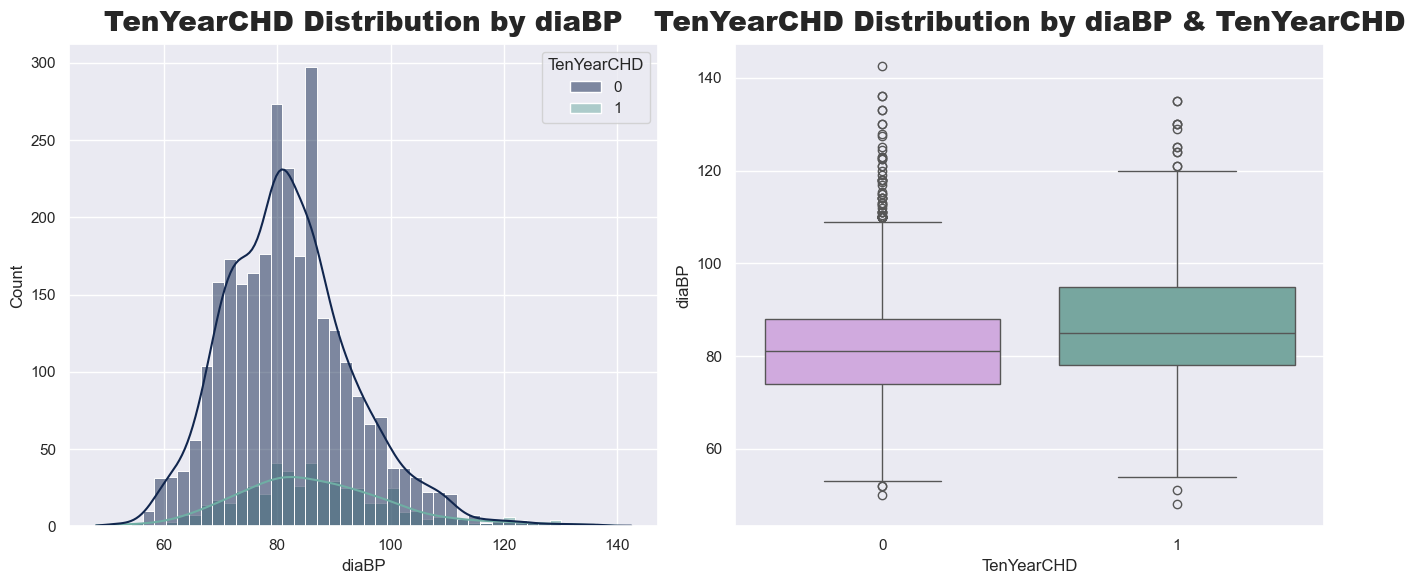

In [186]:
#Visualization to show CHD Distribution by diaBP.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="diaBP",hue="TenYearCHD",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("TenYearCHD Distribution by diaBP",fontweight="black",size=20,pad=10)


#Visualization to show CHD Distribution by diaBP & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="TenYearCHD",y="diaBP",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("TenYearCHD Distribution by diaBP & TenYearCHD",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()


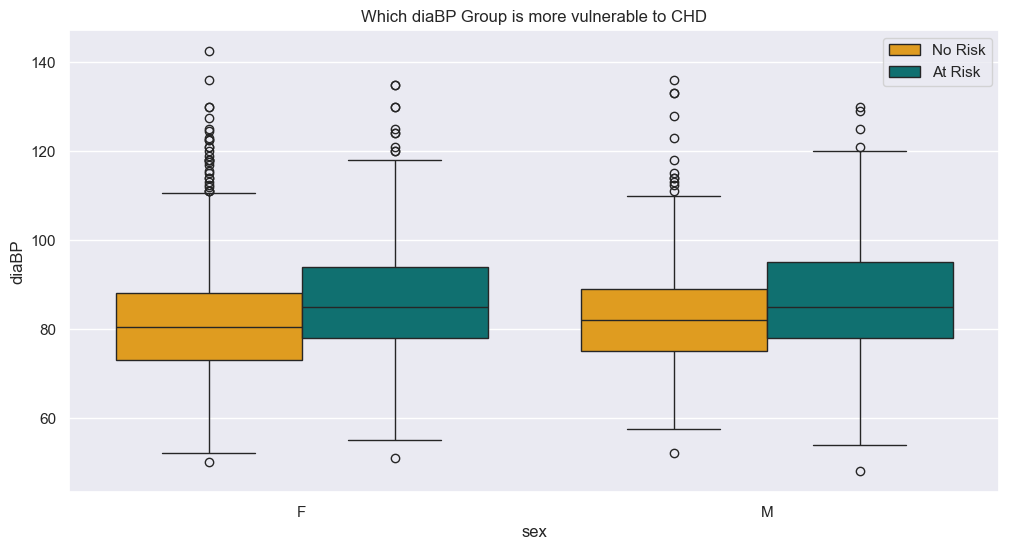

In [187]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data1['sex'], y = data1['diaBP'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which diaBP Group is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

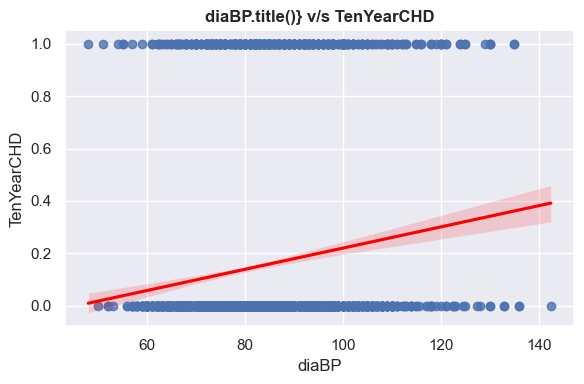

In [188]:
plt.figure(figsize=(6,4))
sns.regplot(x = data1["diaBP"], y =data1['TenYearCHD'],line_kws={"color": "red"})
plt.title('diaBP.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='diaBP'>

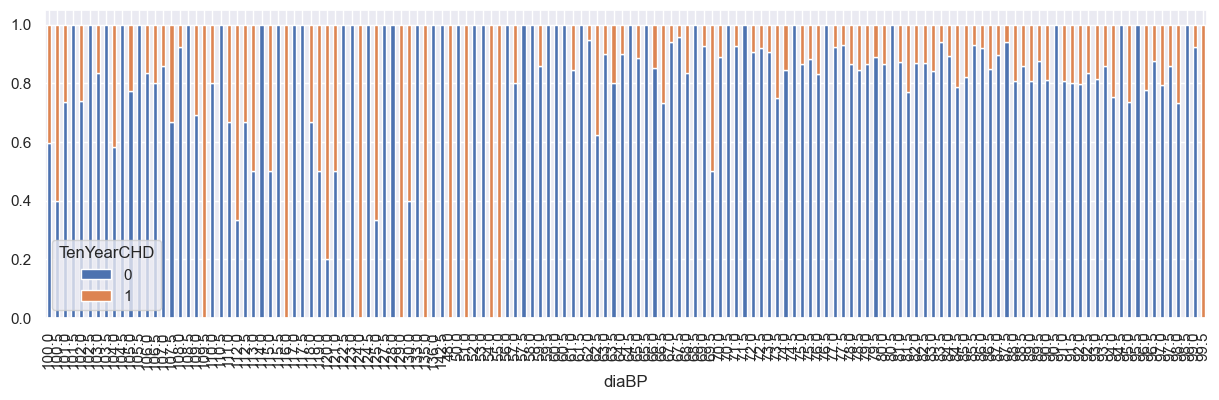

In [189]:
tmp = data1[["TenYearCHD", "diaBP"]]
tmp["diaBP"] = tmp["diaBP"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "diaBP"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "diaBP==\""+row["diaBP"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="TenYearCHD", index="diaBP", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))


In [190]:
# Hypothesis Test (z-test)
Hypothesisztest(data1["diaBP"][data1["TenYearCHD"]==1], data1["diaBP"][data1["TenYearCHD"]==0])

Yes_mean : 86.76320939334639
**************************************************
No_mean : 82.19433831191385
**************************************************
Yes_std : 14.043025506131945
**************************************************
No_std : 11.495255656618042
**************************************************
stats : 7.989049200996602
**************************************************
p_val : 1.3598342060867842e-15
We Reject Null Hypothesis i.e means of two groups not equal


In [191]:
# Hypothesis Test (t-test)

Hypothesisttest(data1["diaBP"][data1["TenYearCHD"]==1], data1["diaBP"][data1["TenYearCHD"]==0])

Yes_mean : 86.76320939334639
**************************************************
No_mean : 82.19433831191385
**************************************************
Yes_std : 14.043025506131945
**************************************************
No_std : 11.495255656618042
**************************************************
statics : 7.989049200996602
**************************************************
p_val : 1.846880472716653e-15
We Reject Null Hypothesis i.e means of two groups not equal


**Inference**
Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.

## Visualizing BMI

In [192]:
data1["BMI"].unique()

array([25.38, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

In [193]:
data1["BMI"].nunique()

1259

##### Is patients BMI important to show the risk of CHD?

Text(0.5, 1.0, 'BMI Distrubution')

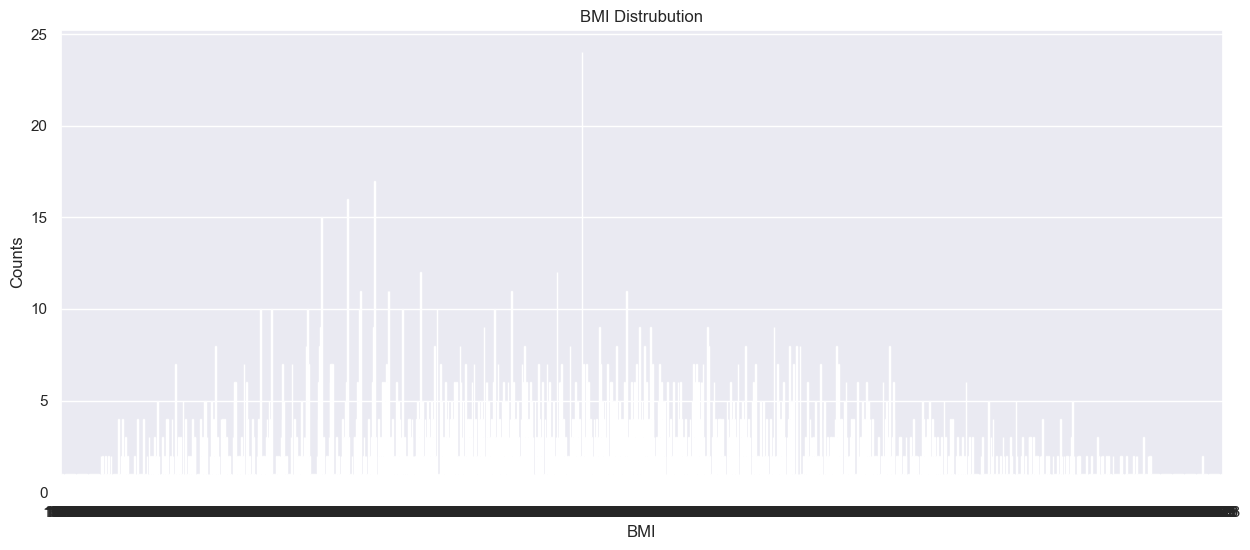

In [194]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['BMI'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('BMI Distrubution')

<Axes: xlabel='BMI', ylabel='count'>

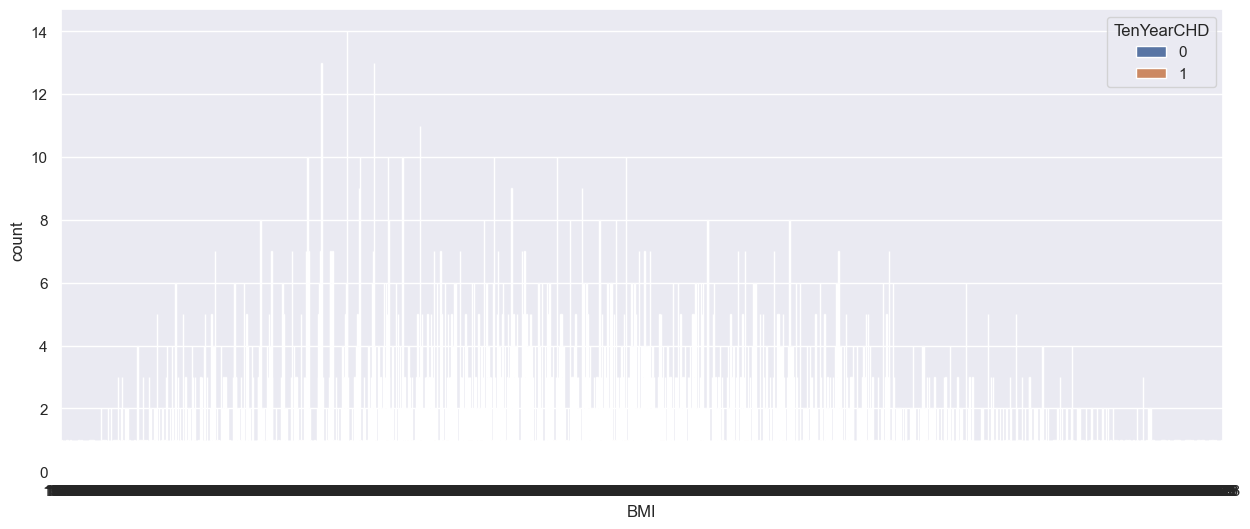

In [195]:
plt.figure(figsize=(15,6))
sns.countplot(x="BMI", hue="TenYearCHD", data=data)

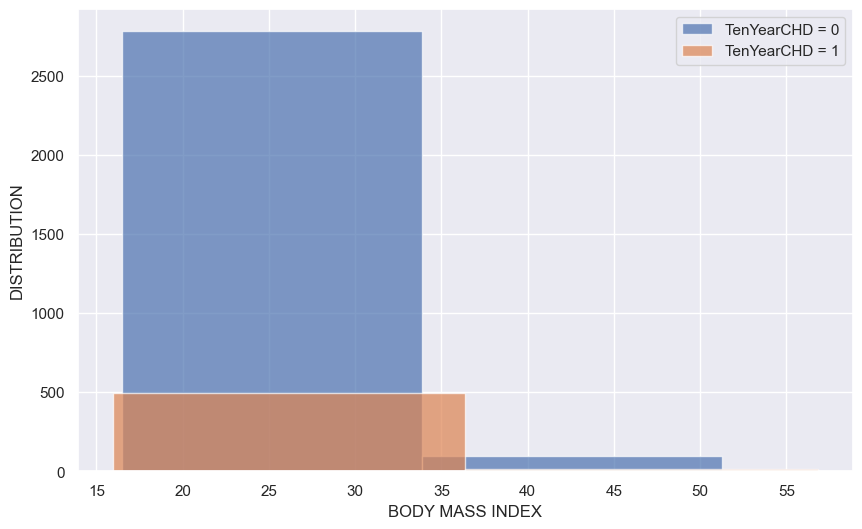

In [196]:
plt.figure(figsize=(10,6))

plt.hist(data1['BMI'][data1['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(data1['BMI'][data1['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('BODY MASS INDEX')
plt.legend()


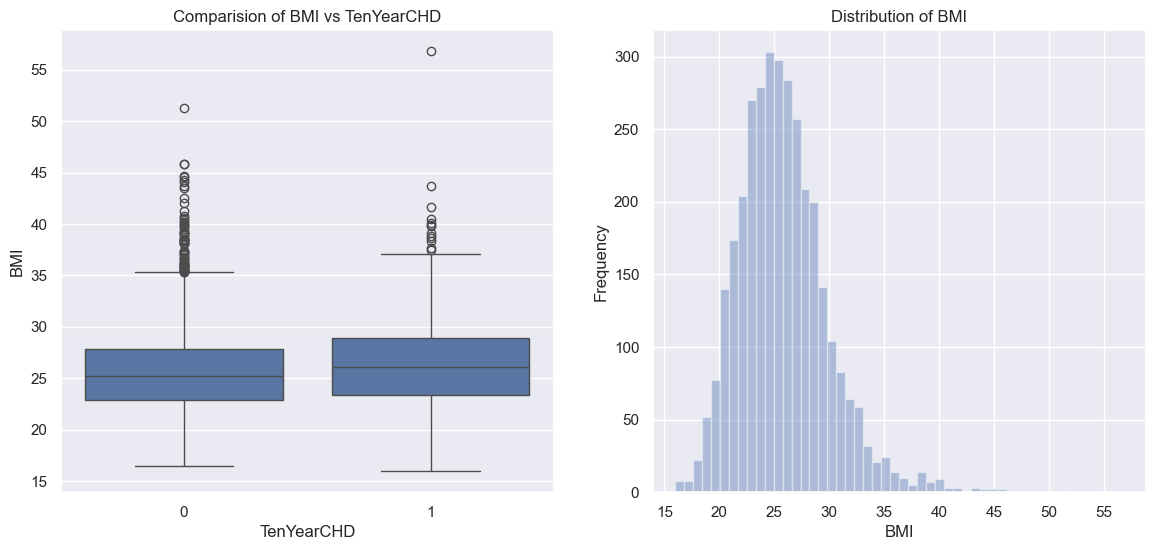

In [197]:
NumericalVariables_targetPlots(data1,segment_by="BMI")

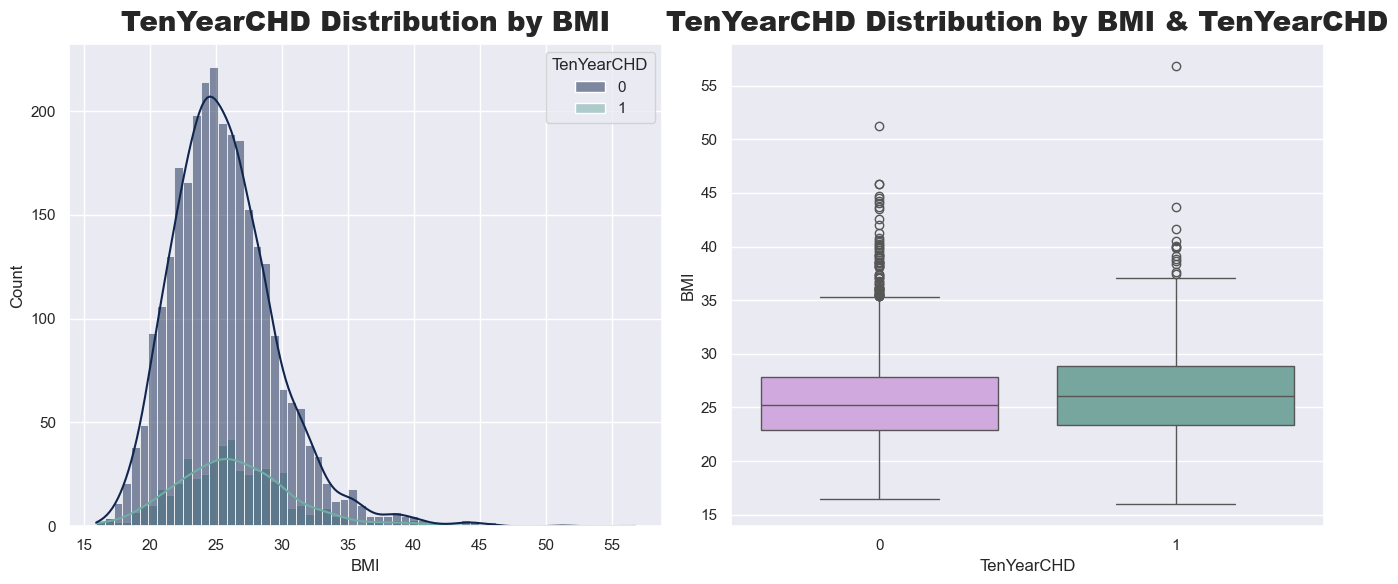

In [198]:
#Visualization to show CHD Distribution by BMI.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="BMI",hue="TenYearCHD",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("TenYearCHD Distribution by BMI",fontweight="black",size=20,pad=10)


#Visualization to show CHD Distribution by BMI & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="TenYearCHD",y="BMI",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("TenYearCHD Distribution by BMI & TenYearCHD",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

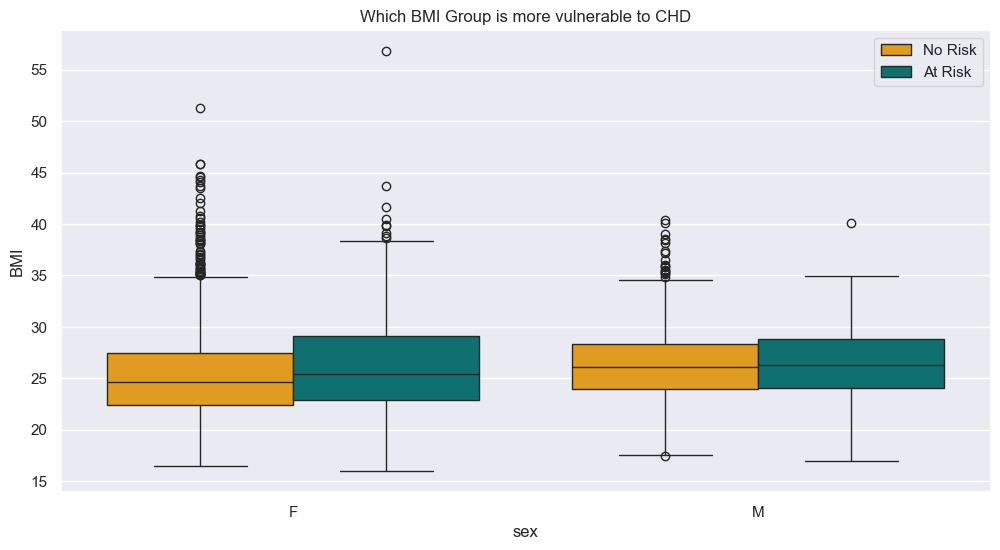

In [199]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data1['sex'], y = data1['BMI'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which BMI Group is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

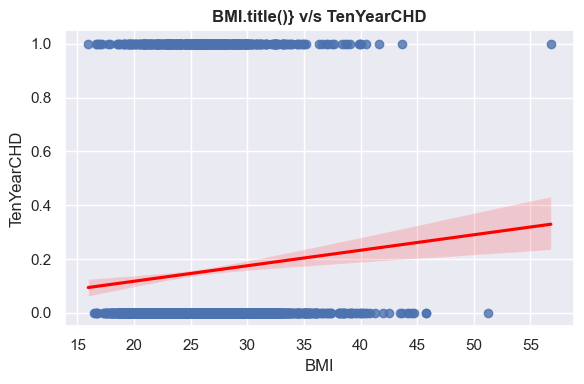

In [200]:
plt.figure(figsize=(6,4))
sns.regplot(x = data1["BMI"], y =data1['TenYearCHD'],line_kws={"color": "red"})
plt.title('BMI.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='BMI'>

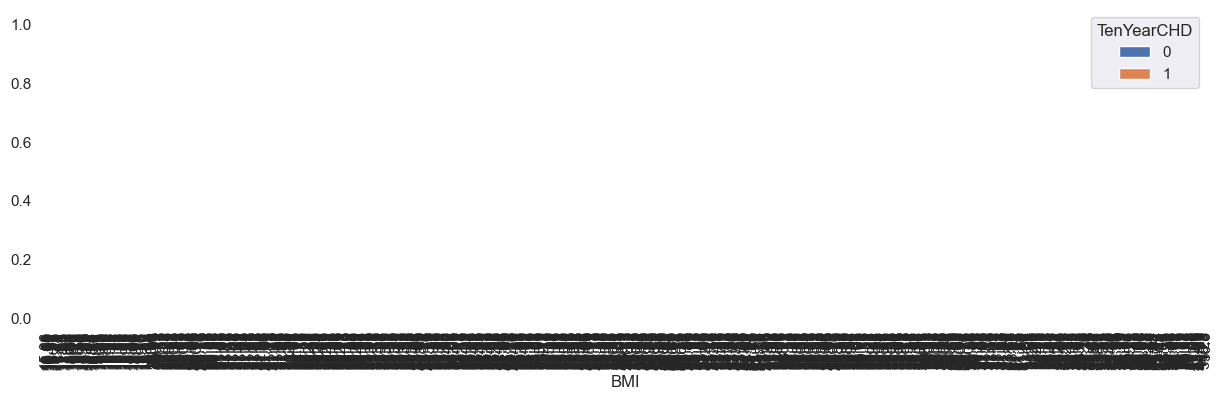

In [201]:
tmp = data1[["TenYearCHD", "BMI"]]
tmp["BMI"] = tmp["BMI"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "BMI"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "BMI==\""+row["BMI"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="TenYearCHD", index="BMI", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))


In [202]:
# Hypothesis Test (z-test)
Hypothesisztest(data1["BMI"][data1["TenYearCHD"]==1], data1["BMI"][data1["TenYearCHD"]==0])

Yes_mean : 26.437866927592957
**************************************************
No_mean : 25.67883640152831
**************************************************
Yes_std : 4.560699373387142
**************************************************
No_std : 4.011211165109581
**************************************************
stats : 3.857900324819694
**************************************************
p_val : 0.00011436526623959193
We Reject Null Hypothesis i.e means of two groups not equal


In [203]:
# Hypothesis Test (z-test)
Hypothesisztest(data["BMI"][data["TenYearCHD"]==1], data["BMI"][data["TenYearCHD"]==0])

Yes_mean : 26.452559523809523
**************************************************
No_mean : 25.6795647632312
**************************************************
Yes_std : 4.590604719022398
**************************************************
No_std : 4.016071030987019
**************************************************
stats : nan
**************************************************
p_val : nan
We fails to Reject Null Hypothesis i.e means of two groups are equal


In [204]:
# Hypothesis Test (t-test)

Hypothesisttest(data1["BMI"][data1["TenYearCHD"]==1], data1["BMI"][data1["TenYearCHD"]==0])

Yes_mean : 26.437866927592957
**************************************************
No_mean : 25.67883640152831
**************************************************
Yes_std : 4.560699373387142
**************************************************
No_std : 4.011211165109581
**************************************************
statics : 3.857900324819694
**************************************************
p_val : 0.0001164939853383209
We Reject Null Hypothesis i.e means of two groups not equal


In [205]:
# Hypothesis Test (t-test)

Hypothesisttest(data["BMI"][data["TenYearCHD"]==1], data["BMI"][data["TenYearCHD"]==0])

Yes_mean : 26.452559523809523
**************************************************
No_mean : 25.6795647632312
**************************************************
Yes_std : 4.590604719022398
**************************************************
No_std : 4.016071030987019
**************************************************
statics : nan
**************************************************
p_val : nan
We fails to Reject Null Hypothesis i.e means of two groups are equal


## Visualizing heartRate

In [206]:
data1["heartRate"].unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47., 125., 105., 122.,  51.,
       140.,  97.])

In [207]:
data1["heartRate"].nunique()

68

Text(0.5, 1.0, 'heartRate Distrubution')

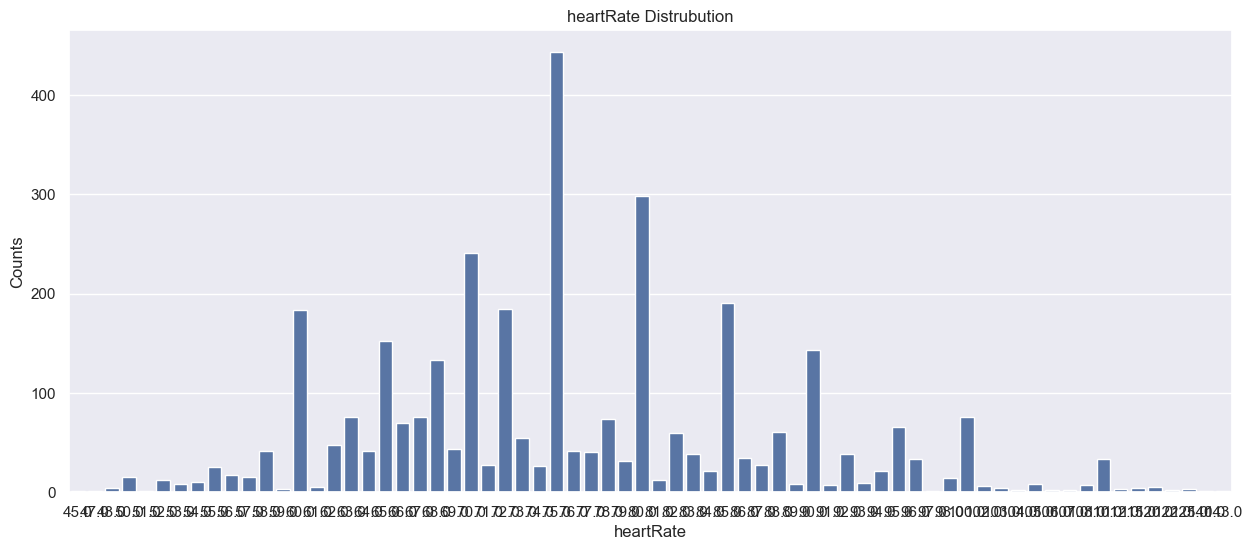

In [208]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['heartRate'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('heartRate Distrubution')


<Axes: xlabel='heartRate', ylabel='count'>

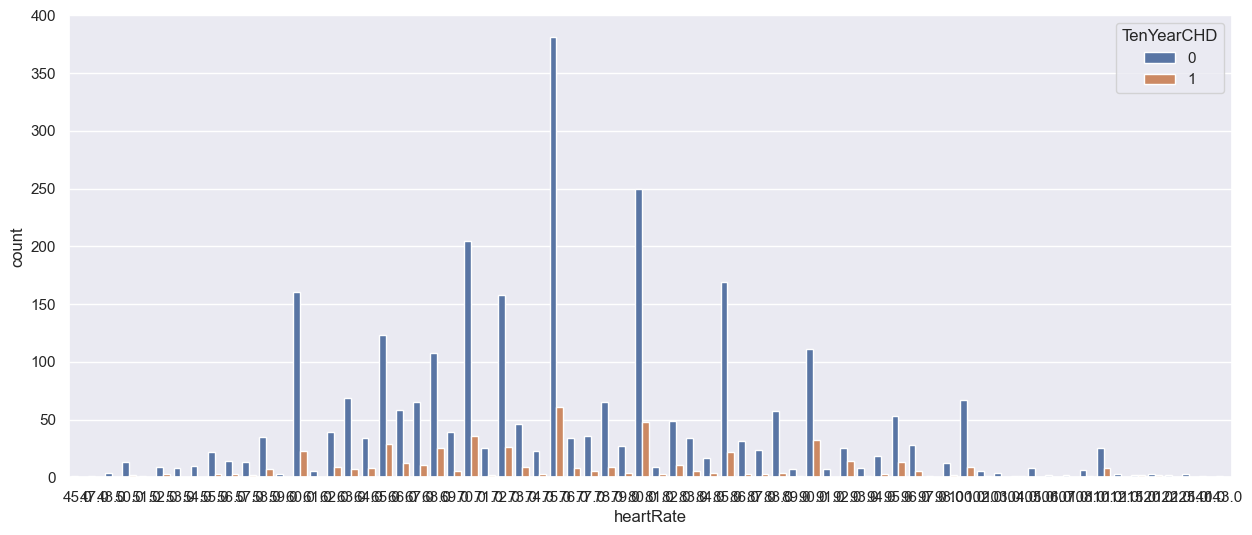

In [209]:
plt.figure(figsize=(15,6))
sns.countplot(x="heartRate", hue="TenYearCHD", data=data)

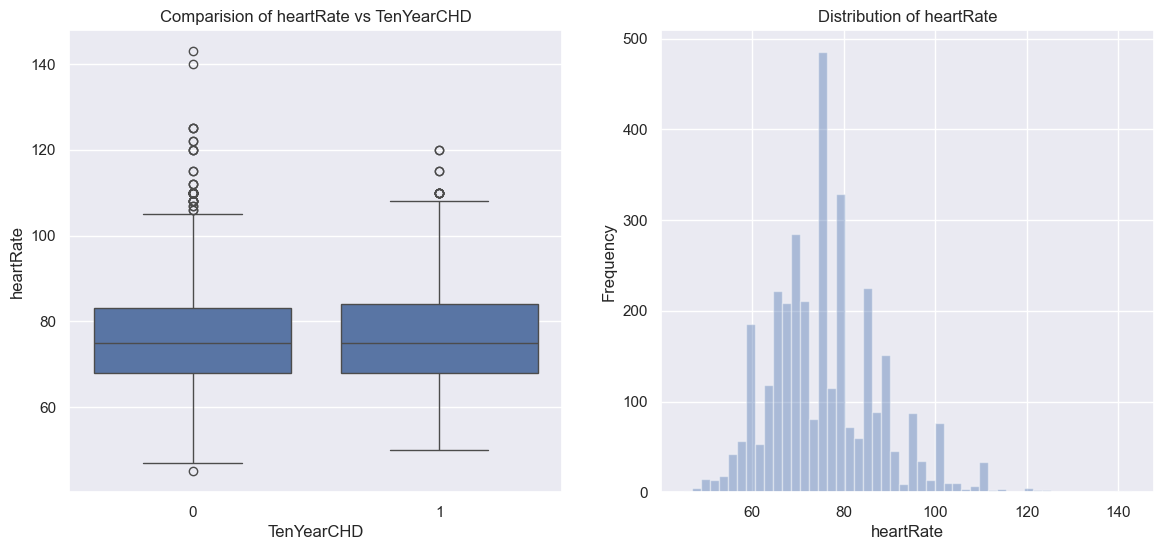

In [210]:
NumericalVariables_targetPlots(data1,segment_by="heartRate")

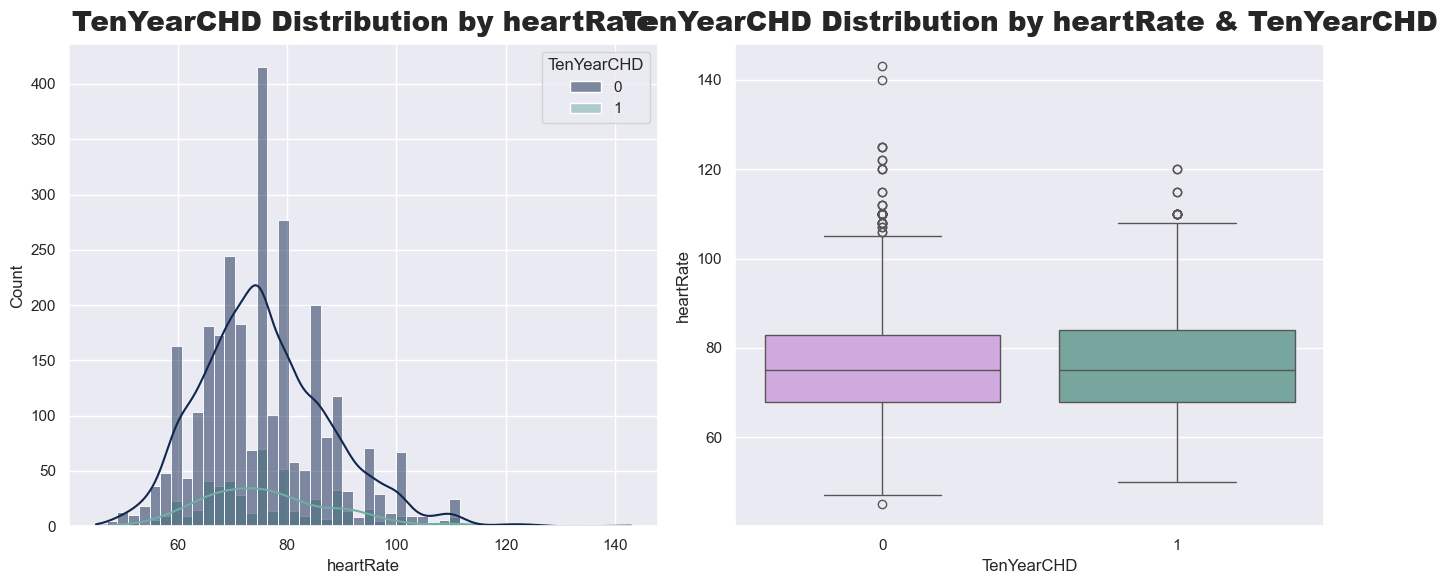

In [211]:
#Visualization to show CHD Distribution by heartRate.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="heartRate",hue="TenYearCHD",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("TenYearCHD Distribution by heartRate",fontweight="black",size=20,pad=10)


#Visualization to show CHD Distribution by heartRate & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="TenYearCHD",y="heartRate",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("TenYearCHD Distribution by heartRate & TenYearCHD",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()


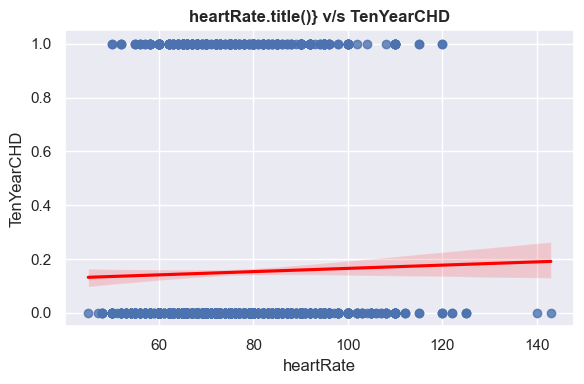

In [212]:
plt.figure(figsize=(6,4))
sns.regplot(x = data1["heartRate"], y =data1['TenYearCHD'],line_kws={"color": "red"})
plt.title('heartRate.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='heartRate'>

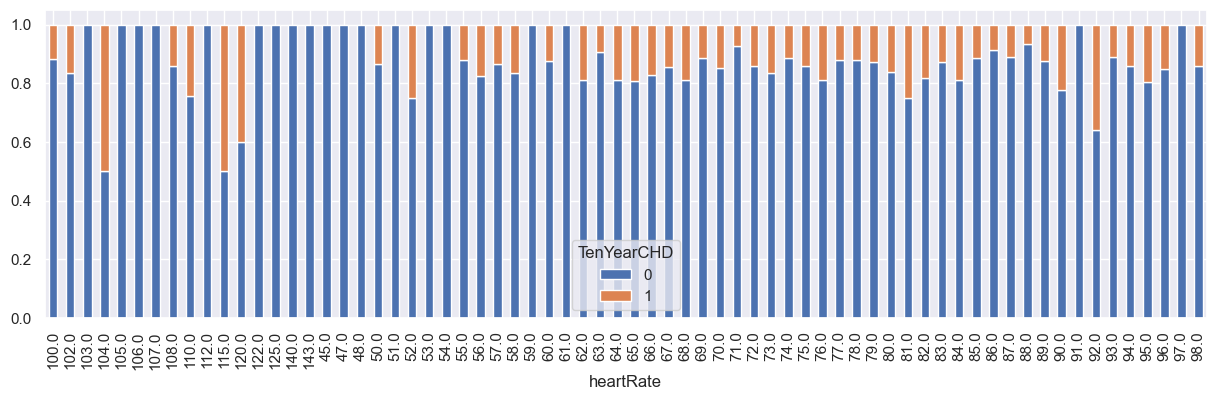

In [213]:
tmp = data1[["TenYearCHD", "heartRate"]]
tmp["heartRate"] = tmp["heartRate"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "heartRate"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "heartRate==\""+row["heartRate"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="TenYearCHD", index="heartRate", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))


In [214]:
# Hypothesis Test (z-test)
Hypothesisztest(data1["heartRate"][data1["TenYearCHD"]==1], data1["heartRate"][data1["TenYearCHD"]==0])

Yes_mean : 76.54990215264188
**************************************************
No_mean : 75.87530392497395
**************************************************
Yes_std : 12.159276092286346
**************************************************
No_std : 11.935491337929292
**************************************************
stats : 1.1740932719444874
**************************************************
p_val : 0.24035766806763315
We fails to Reject Null Hypothesis i.e means of two groups are equal


In [215]:
# Hypothesis Test (t-test)

Hypothesisttest(data1["heartRate"][data1["TenYearCHD"]==1], data1["heartRate"][data1["TenYearCHD"]==0])

Yes_mean : 76.54990215264188
**************************************************
No_mean : 75.87530392497395
**************************************************
Yes_std : 12.159276092286346
**************************************************
No_std : 11.935491337929292
**************************************************
statics : 1.1740932719444876
**************************************************
p_val : 0.2404401902461431
We fails to Reject Null Hypothesis i.e means of two groups are equal


## Visualizing glucose

In [216]:
data1["glucose"].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  78.,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  96.,  72.,
        61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,  57.,
        58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,  74.,
        84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62., 205.,
        97., 115.,  98., 268., 104., 137., 106., 348., 110., 122., 108.,
       255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,  50.,
       114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126., 131.,
       394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150., 136.,
       191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297., 166.,
       172.,  48., 111., 215., 216., 368., 155., 148., 147., 223., 225.,
       332., 210., 186., 386., 248., 193., 125., 167., 183., 260., 274.])

In [217]:
data1["glucose"].nunique()

132

##### Can patients Glucose levels show the risk of CHD?

Text(0.5, 1.0, 'glucose Distrubution')

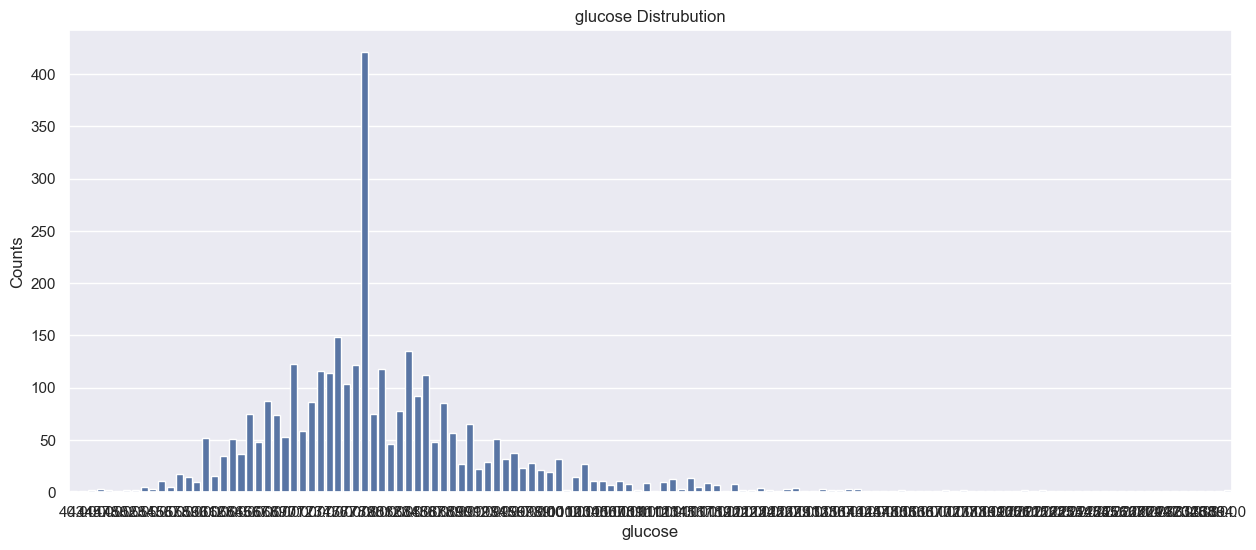

In [218]:
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(data1.groupby(['glucose'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('glucose Distrubution')

<Axes: xlabel='glucose', ylabel='count'>

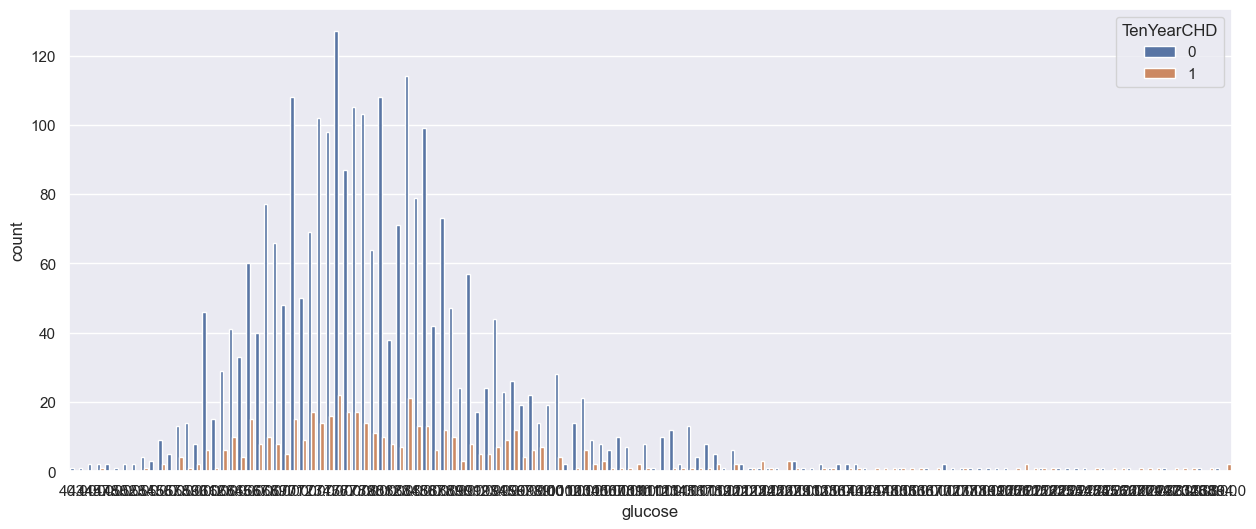

In [219]:
plt.figure(figsize=(15,6))
sns.countplot(x="glucose", hue="TenYearCHD", data=data)

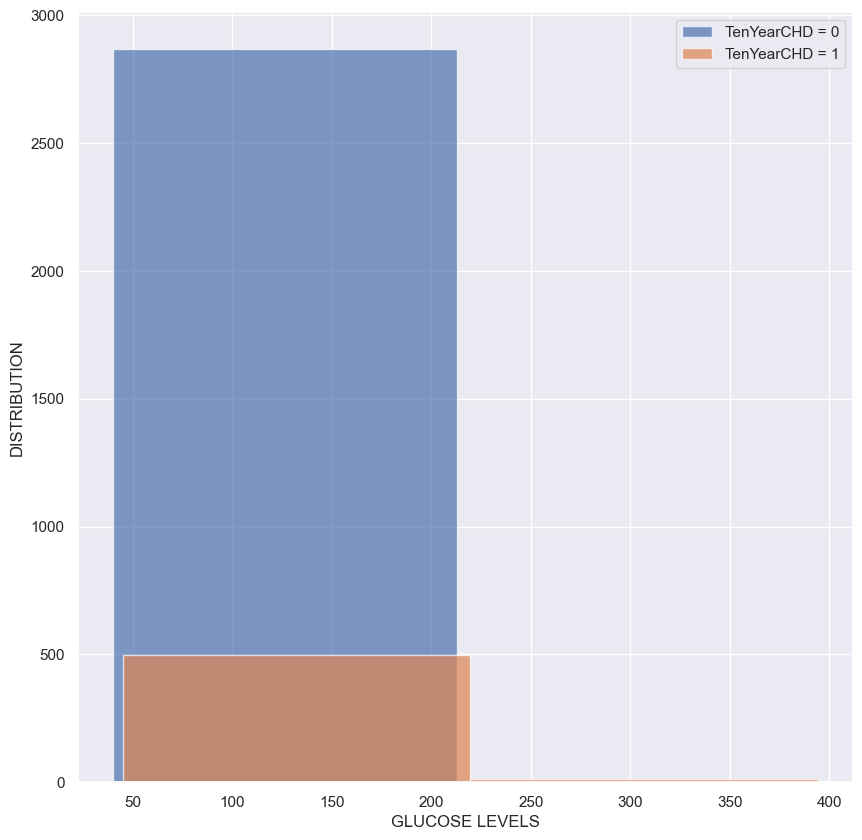

In [220]:
plt.figure(figsize=(10,10))

plt.hist(data1['glucose'][data1['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(data1['glucose'][data1['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('GLUCOSE LEVELS')
plt.legend()

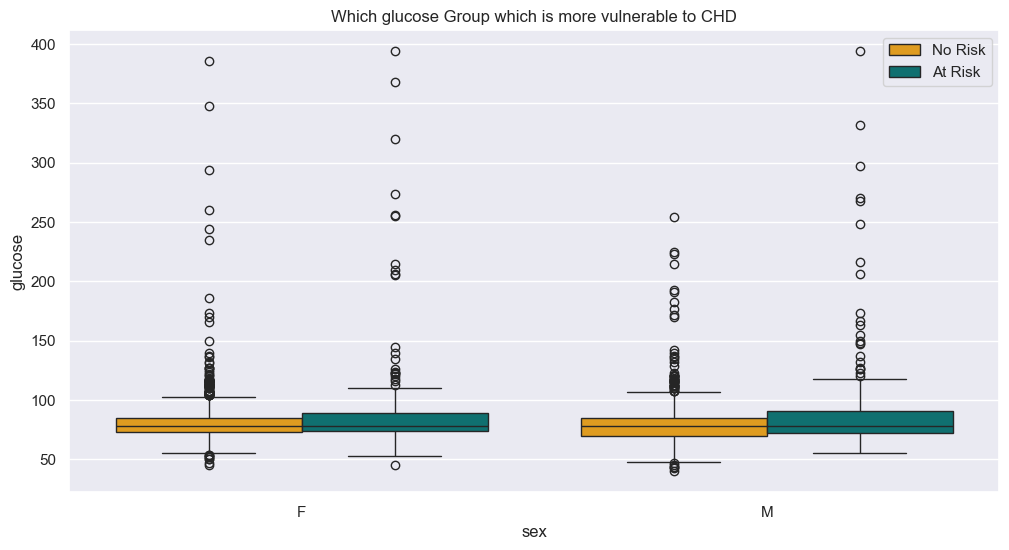

In [221]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data1['sex'], y = data1['glucose'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which glucose Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

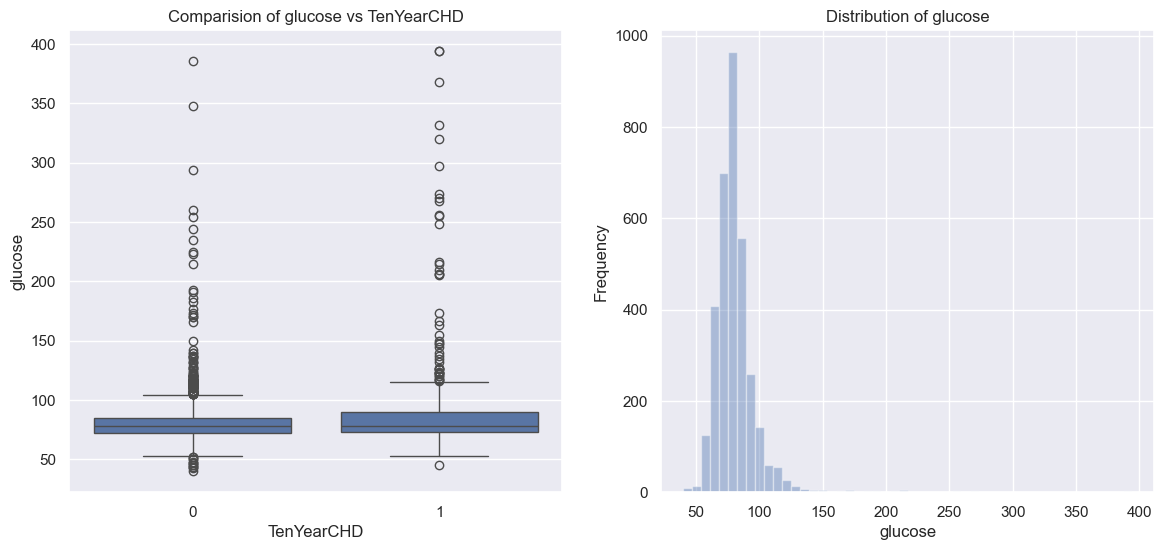

In [222]:
NumericalVariables_targetPlots(data1,segment_by="glucose")

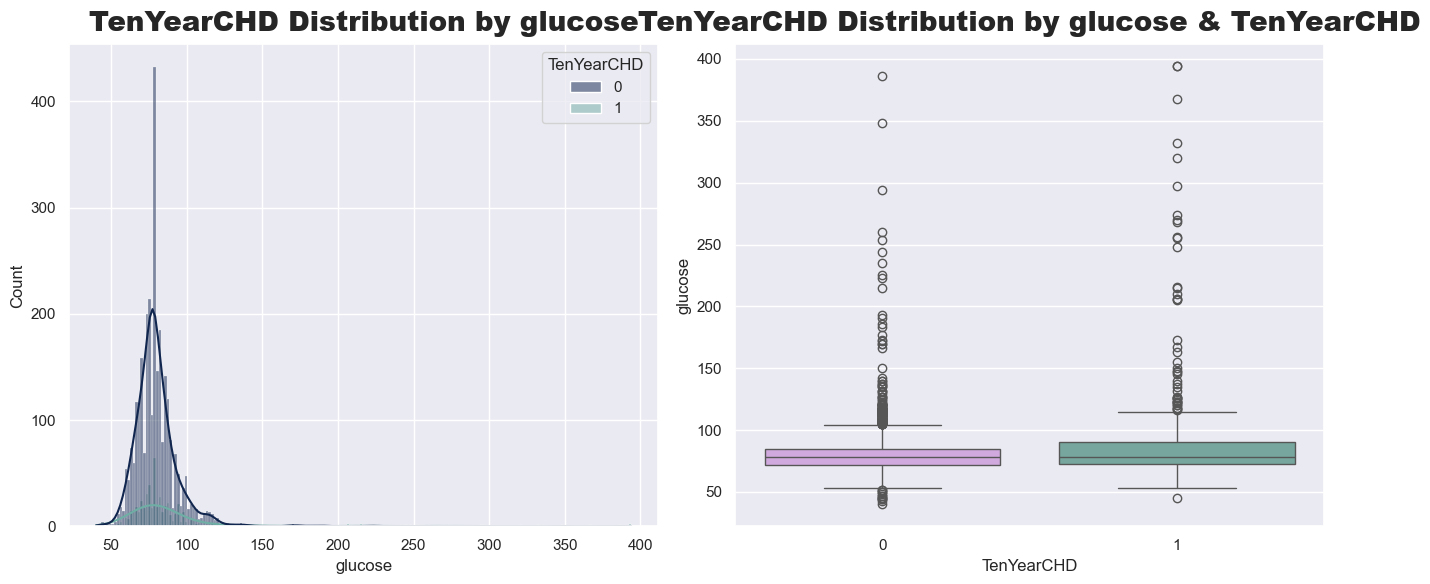

In [223]:

#Visualization to show CHD Distribution by glucose.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="glucose",hue="TenYearCHD",data=data1,kde=True,palette=["#11264e","#6faea4"])
plt.title("TenYearCHD Distribution by glucose",fontweight="black",size=20,pad=10)


#Visualization to show CHD Distribution by glucose & TenYearCHD.
plt.subplot(1,2,2)
sns.boxplot(x="TenYearCHD",y="glucose",data=data1,palette=["#D4A1E7","#6faea4"])
plt.title("TenYearCHD Distribution by glucose & TenYearCHD",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()


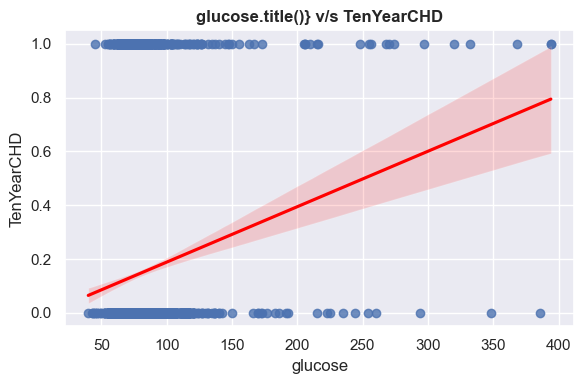

In [224]:
plt.figure(figsize=(6,4))
sns.regplot(x = data1["glucose"], y =data1['TenYearCHD'],line_kws={"color": "red"})
plt.title('glucose.title()} v/s TenYearCHD',weight='bold')
plt.tight_layout()
     

<Axes: xlabel='glucose'>

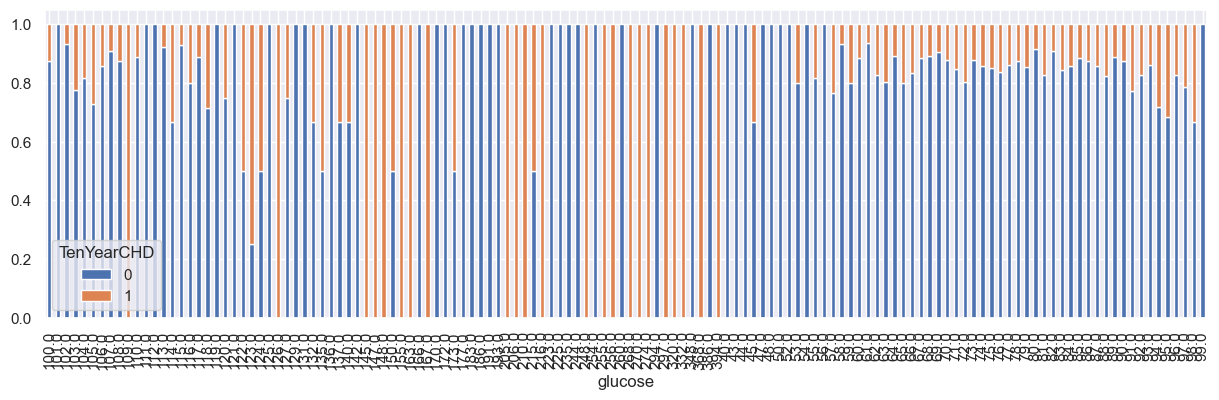

In [225]:
tmp = data1[["TenYearCHD", "glucose"]]
tmp["glucose"] = tmp["glucose"].astype(str)
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "glucose"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "glucose==\""+row["glucose"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
# display(tmp)
tmp.pivot(columns="TenYearCHD", index="glucose", values="count_norm").plot.bar(stacked=True,
                                                                                figsize=(15,4))


In [226]:
# Hypothesis Test (z-test)
Hypothesisztest(data1["glucose"][data1["TenYearCHD"]==1], data1["glucose"][data1["TenYearCHD"]==0])


Yes_mean : 89.05675146771037
**************************************************
No_mean : 80.41785342132685
**************************************************
Yes_std : 40.912708467323796
**************************************************
No_std : 17.995041421234934
**************************************************
stats : 7.839109992025294
**************************************************
p_val : 4.53750961634131e-15
We Reject Null Hypothesis i.e means of two groups not equal


In [227]:
# Hypothesis Test (t-test)

Hypothesisttest(data1["glucose"][data1["TenYearCHD"]==1], data1["glucose"][data1["TenYearCHD"]==0])

Yes_mean : 89.05675146771037
**************************************************
No_mean : 80.41785342132685
**************************************************
Yes_std : 40.912708467323796
**************************************************
No_std : 17.995041421234934
**************************************************
statics : 7.839109992025294
**************************************************
p_val : 6.029291149681234e-15
We Reject Null Hypothesis i.e means of two groups not equal


## Visualizing Hypertension

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [228]:
def blood_presure_classification(SysBP, DiaBP):
    if (SysBP < 90) or (DiaBP < 60):
        return '0(Hypotension)'
    if (SysBP < 120) and (DiaBP < 80):
        return '1(Optimal)'
    if (SysBP < 129) or (DiaBP < 84):
        return '2(Normal)'
    if (SysBP < 140) or (DiaBP < 89):
        return '3(PreHypertensive)'
    if (SysBP > 140) and (DiaBP < 90):
        return '4(Isolated Systolic Hypertension)'
    if (SysBP < 160) or (DiaBP < 100):
        return '5(GradeI)'
    if (SysBP < 180) or (DiaBP >= 110):
        return '6(GradeII)'
    return '7(GradeIII)'

In [229]:
data1['Hypertension'] = data1.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
data1.head()

id  age             education sex is_smoking  cigsPerDay BPMeds  \
0   0   64           Graduate(2)   F        YES         3.0  No(0)   
1   1   36    Doctarte or PHD(4)   M         NO         0.0  No(0)   
2   2   46  Higher Secorndary(1)   F        YES        10.0  No(0)   
3   3   50  Higher Secorndary(1)   M        YES        20.0  No(0)   
4   4   64  Higher Secorndary(1)   F        YES        30.0  No(0)   

  prevalentStroke prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
0           No(0)        No(0)    No(0)    221.0  148.0   85.0  25.38   
1           No(0)       Yes(1)    No(0)    212.0  168.0   98.0  29.77   
2           No(0)        No(0)    No(0)    250.0  116.0   71.0  20.35   
3           No(0)       Yes(1)    No(0)    233.0  158.0   88.0  28.26   
4           No(0)        No(0)    No(0)    241.0  136.5   85.0  26.42   

   heartRate  glucose  TenYearCHD        Hypertension  
0       90.0     80.0           1  3(PreHypertensive)  
1       72.0     75.0           0           5(GradeI)  
2       88.0     94.0           0          1(Optimal)  
3       68.0     94.0           1  3(PreHypertensive)  
4       70.0     77.0           0  3(PreHypertensive)

In [230]:
data2['Hypertension'] = data2.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
data2.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD        Hypertension  
0           1  3(PreHypertensive)  
1           0           5(GradeI)  
2           0          1(Optimal)  
3           1  3(PreHypertensive)  
4           0  3(PreHypertensive)

In [231]:
data1["Hypertension"].value_counts()

Hypertension
2(Normal)                            1326
1(Optimal)                            792
3(PreHypertensive)                    529
5(GradeI)                             469
6(GradeII)                            161
7(GradeIII)                            41
4(Isolated Systolic Hypertension)      39
0(Hypotension)                         33
Name: count, dtype: int64

Hypertension
2(Normal)                            1326
1(Optimal)                            792
3(PreHypertensive)                    529
5(GradeI)                             469
6(GradeII)                            161
7(GradeIII)                            41
4(Isolated Systolic Hypertension)      39
0(Hypotension)                         33
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'Hypertension ratio Proposanate')

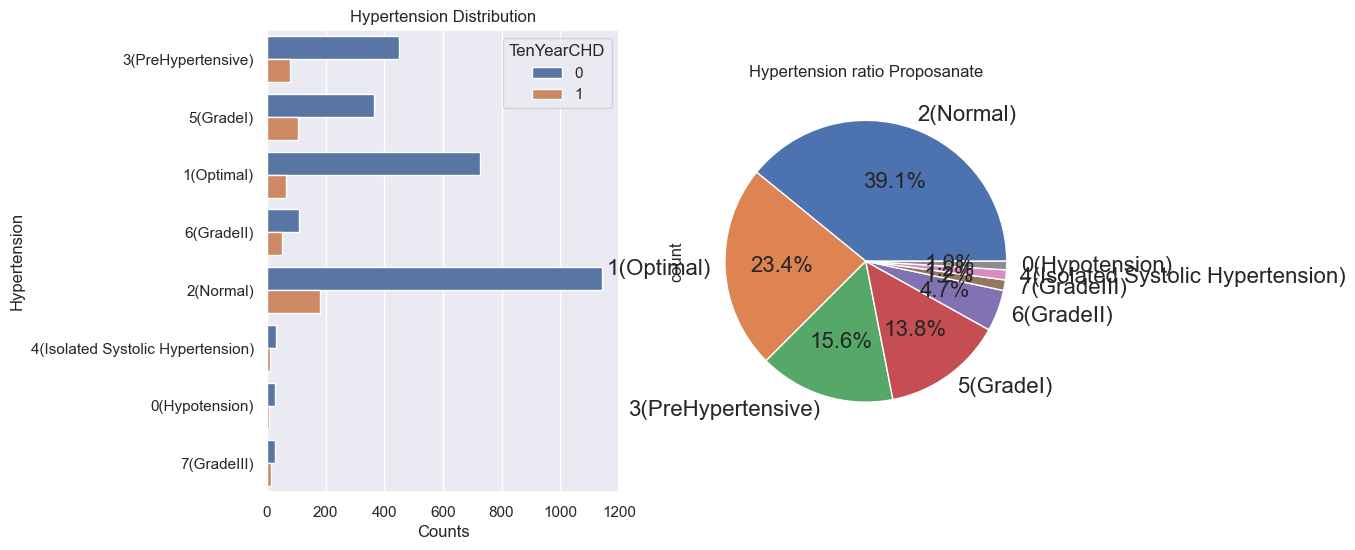

In [232]:
#  Distribution of "Hypertension"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="Hypertension", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('Hypertension')
plt.title('Hypertension Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['Hypertension'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('Hypertension ratio Proposanate')



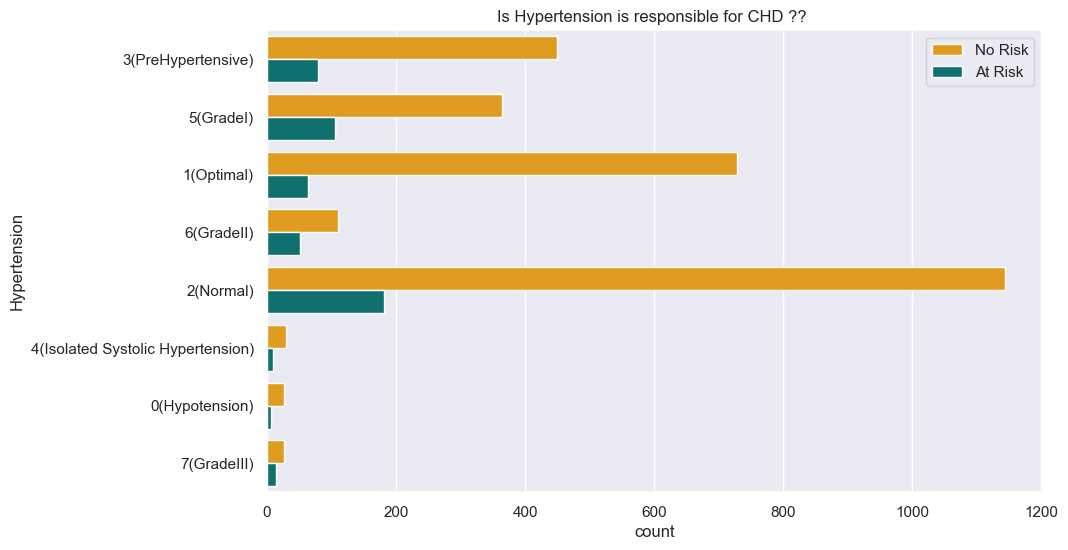

In [233]:
plt.figure(figsize = (10,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(y = data1['Hypertension'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Is Hypertension is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

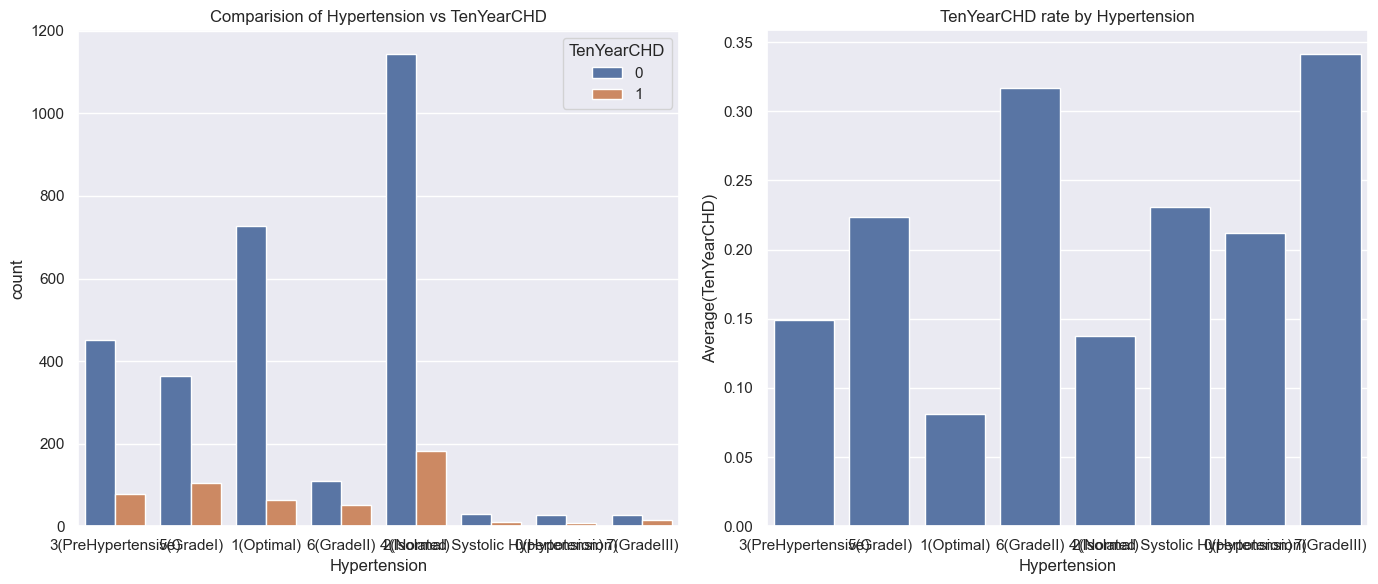

In [234]:
CategoricalVariables_targetPlots(data1,"Hypertension")

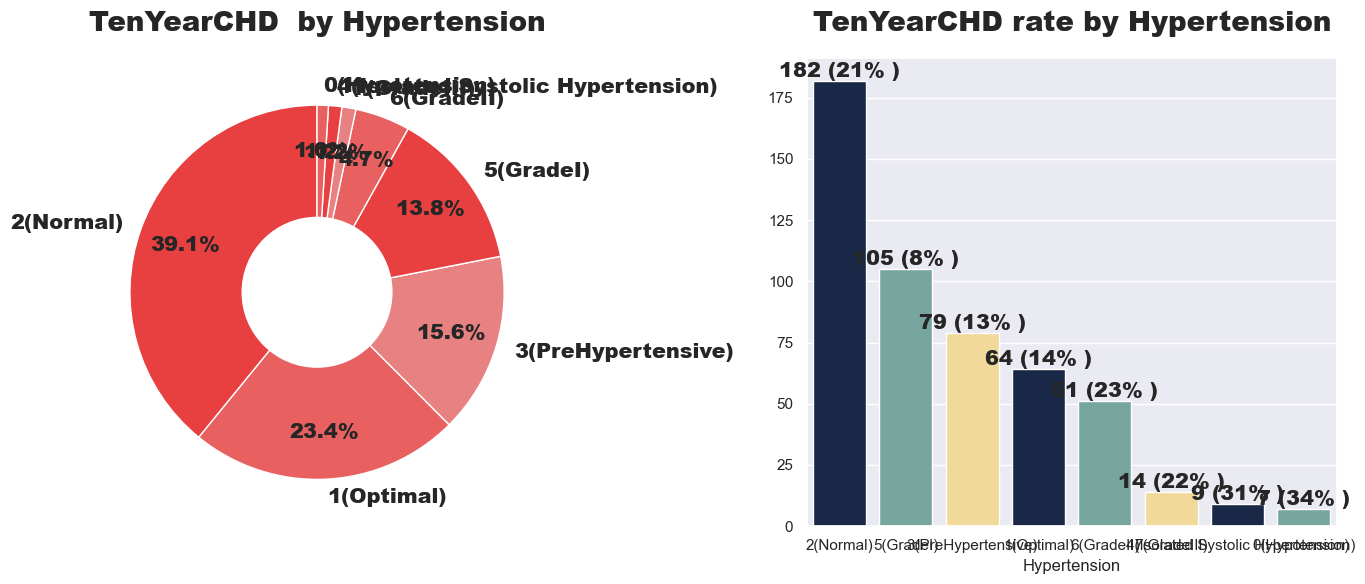

In [235]:
#Visualization to show TenYearCHD by Hypertension.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["Hypertension"].value_counts()
plt.title("TenYearCHD  by Hypertension", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by Hypertension.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["Hypertension"].value_counts()
acceptance_rate = np.floor((value_2/value_1)*100).values
# acceptance_rate = [16, 13]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by Hypertension",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




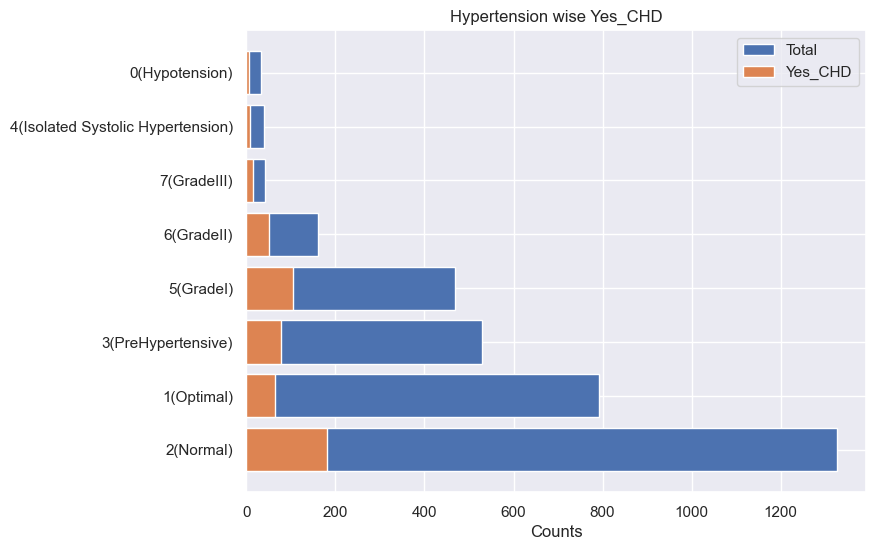

Hypertension  Total_Count  % of Total  Yes_CHD  \
2                          2(Normal)         1326   15.604720      182   
1                         1(Optimal)          792   23.362832       64   
3                 3(PreHypertensive)          529   13.834808       79   
5                          5(GradeI)          469    1.209440      105   
6                         6(GradeII)          161    1.150442       51   
7                        7(GradeIII)           41    0.973451       14   
4  4(Isolated Systolic Hypertension)           39    4.749263        9   
0                     0(Hypotension)           33   39.115044        7   

   No_CHD  %Yes_CHD  %No_CHD  
2    1144    13.725   86.275  
1     728     8.081   91.919  
3     450    14.934   85.066  
5     364    22.388   77.612  
6     110    31.677   68.323  
7      27    34.146   65.854  
4      30    23.077   76.923  
0      26    21.212   78.788

In [236]:
Univariate_Analysis1("Hypertension")

TenYearCHD                       Hypertension  count  count_norm
0            0                     0(Hypotension)     26    0.787879
1            0                         1(Optimal)    728    0.919192
2            0                          2(Normal)   1144    0.862745
3            0                 3(PreHypertensive)    450    0.850662
4            0  4(Isolated Systolic Hypertension)     30    0.769231
5            0                          5(GradeI)    364    0.776119
6            0                         6(GradeII)    110    0.683230
7            0                        7(GradeIII)     27    0.658537
8            1                     0(Hypotension)      7    0.212121
9            1                         1(Optimal)     64    0.080808
10           1                          2(Normal)    182    0.137255
11           1                 3(PreHypertensive)     79    0.149338
12           1  4(Isolated Systolic Hypertension)      9    0.230769
13           1                          5(GradeI)    105    0.223881
14           1                         6(GradeII)     51    0.316770
15           1                        7(GradeIII)     14    0.341463

<Axes: xlabel='Hypertension'>

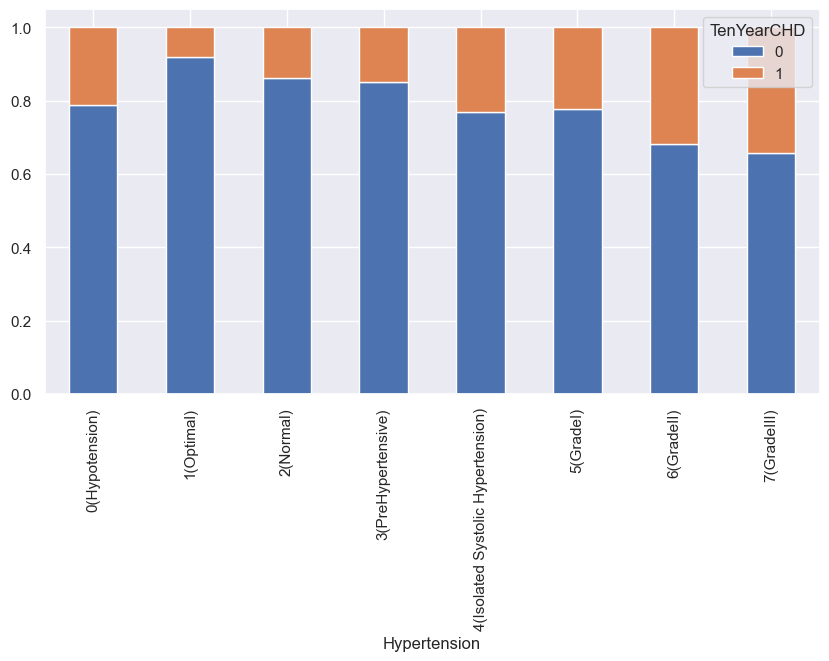

In [237]:
tmp = data1[["TenYearCHD", "Hypertension"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "Hypertension"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "Hypertension==\""+row["Hypertension"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="Hypertension", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))




In [238]:
# Hypothesis testing on "Hypertension" column
stat, p_val, dof = chi_sqred_ind_test(data1, "Hypertension", "TenYearCHD", 0.05)

Contigency table: 
 TenYearCHD                            0    1
Hypertension                                
0(Hypotension)                       26    7
1(Optimal)                          728   64
2(Normal)                          1144  182
3(PreHypertensive)                  450   79
4(Isolated Systolic Hypertension)    30    9
5(GradeI)                           364  105
6(GradeII)                          110   51
7(GradeIII)                          27   14
Statistic: 100.9876193452069
P-value: 6.744307962008485e-19
DOF: 7
probability=0.950, critical=14.067, stat=100.988
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Visualizing Glucose_diabetes

Blood glucose levels can be used to classify the severity of Diabetes.

In [239]:
def diabetes_grade(glucose):
    if glucose < 100:
        return '(1)Normal'
    if glucose < 125:
        return '(2)Prediabetic'
    if glucose < 200:
        return '(3)Mild'
    if glucose < 400:
        return '(4)Moderate'
    return '(5)Severe'    
     

In [240]:
data1['Glucose_diabetes'] = data1['glucose'].apply(lambda x: diabetes_grade(x))
data1.head(20)

id  age             education sex is_smoking  cigsPerDay BPMeds  \
0    0   64           Graduate(2)   F        YES         3.0  No(0)   
1    1   36    Doctarte or PHD(4)   M         NO         0.0  No(0)   
2    2   46  Higher Secorndary(1)   F        YES        10.0  No(0)   
3    3   50  Higher Secorndary(1)   M        YES        20.0  No(0)   
4    4   64  Higher Secorndary(1)   F        YES        30.0  No(0)   
5    5   61      Post Graduate(3)   F         NO         0.0  No(0)   
6    6   61  Higher Secorndary(1)   M         NO         0.0  No(0)   
7    7   36    Doctarte or PHD(4)   M        YES        35.0  No(0)   
8    8   41           Graduate(2)   F        YES        20.0  No(0)   
9    9   55           Graduate(2)   F         NO         0.0  No(0)   
10  10   61  Higher Secorndary(1)   F         NO         0.0  No(0)   
11  11   53           Graduate(2)   F         NO         0.0  No(0)   
12  12   43           Graduate(2)   F         NO         0.0  No(0)   
13  13   44  Higher Secorndary(1)   M        YES        40.0  No(0)   
14  14   58      Post Graduate(3)   F         NO         0.0  No(0)   
15  15   51  Higher Secorndary(1)   M        YES        15.0  No(0)   
16  16   50  Higher Secorndary(1)   F         NO         0.0  No(0)   
17  17   44      Post Graduate(3)   F         NO         0.0  No(0)   
18  18   56      Post Graduate(3)   F         NO         0.0  No(0)   
19  19   42  Higher Secorndary(1)   M        YES        30.0  No(0)   

   prevalentStroke prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  \
0            No(0)        No(0)    No(0)    221.0  148.0   85.0  25.38   
1            No(0)       Yes(1)    No(0)    212.0  168.0   98.0  29.77   
2            No(0)        No(0)    No(0)    250.0  116.0   71.0  20.35   
3            No(0)       Yes(1)    No(0)    233.0  158.0   88.0  28.26   
4            No(0)        No(0)    No(0)    241.0  136.5   85.0  26.42   
5            No(0)       Yes(1)    No(0)    272.0  182.0  121.0  32.80   
6            No(0)       Yes(1)    No(0)    238.0  232.0  136.0  24.83   
7            No(0)        No(0)    No(0)    295.0  102.0   68.0  28.15   
8            No(0)        No(0)    No(0)    220.0  126.0   78.0  20.70   
9            No(0)       Yes(1)    No(0)    326.0  144.0   81.0  25.71   
10           No(0)       Yes(1)    No(0)    234.0  185.0  121.0  35.22   
11           No(0)        No(0)    No(0)    210.0  138.0   86.5  22.49   
12           No(0)        No(0)    No(0)    213.0   96.0   62.0  19.38   
13           No(0)        No(0)    No(0)    227.0  146.5   97.0  26.92   
14           No(0)       Yes(1)    No(0)    188.0  160.0  120.0  35.58   
15           No(0)        No(0)    No(0)    212.0  146.0   89.0  24.49   
16           No(0)       Yes(1)    No(0)    240.0  163.0  105.0  31.37   
17           No(0)        No(0)    No(0)    257.0  129.0   93.0  27.56   
18           No(0)        No(0)    No(0)    267.0  122.5   85.0  24.22   
19           No(0)        No(0)    No(0)    232.0  130.0   91.0  25.77   

    heartRate  glucose  TenYearCHD                       Hypertension  \
0        90.0     80.0           1                 3(PreHypertensive)   
1        72.0     75.0           0                          5(GradeI)   
2        88.0     94.0           0                         1(Optimal)   
3        68.0     94.0           1                 3(PreHypertensive)   
4        70.0     77.0           0                 3(PreHypertensive)   
5        85.0     65.0           1                         6(GradeII)   
6        75.0     79.0           0                         6(GradeII)   
7        60.0     63.0           0                         1(Optimal)   
8        86.0     79.0           0                          2(Normal)   
9        85.0     78.0           0                          2(Normal)   
10       80.0     78.0           0                         6(GradeII)   
11       88.0     87.0           0                 3(PreHypertensive)   
12      

In [241]:
data2['Glucose_diabetes'] = data2['glucose'].apply(lambda x: diabetes_grade(x))
data2.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD        Hypertension Glucose_diabetes  
0           1  3(PreHypertensive)        (1)Normal  
1           0           5(GradeI)        (1)Normal  
2           0          1(Optimal)        (1)Normal  
3           1  3(PreHypertensive)        (1)Normal  
4           0  3(PreHypertensive)        (1)Normal

In [242]:
data1["Glucose_diabetes"].value_counts()

Glucose_diabetes
(1)Normal         3103
(2)Prediabetic     216
(3)Mild             43
(4)Moderate         28
Name: count, dtype: int64

Glucose_diabetes
(1)Normal         3103
(2)Prediabetic     216
(3)Mild             43
(4)Moderate         28
Name: count, dtype: int64
Axes(0.547727,0.201439;0.352273x0.587121)


Text(0.5, 1.0, 'Glucose_diabetes ratio Proposanate')

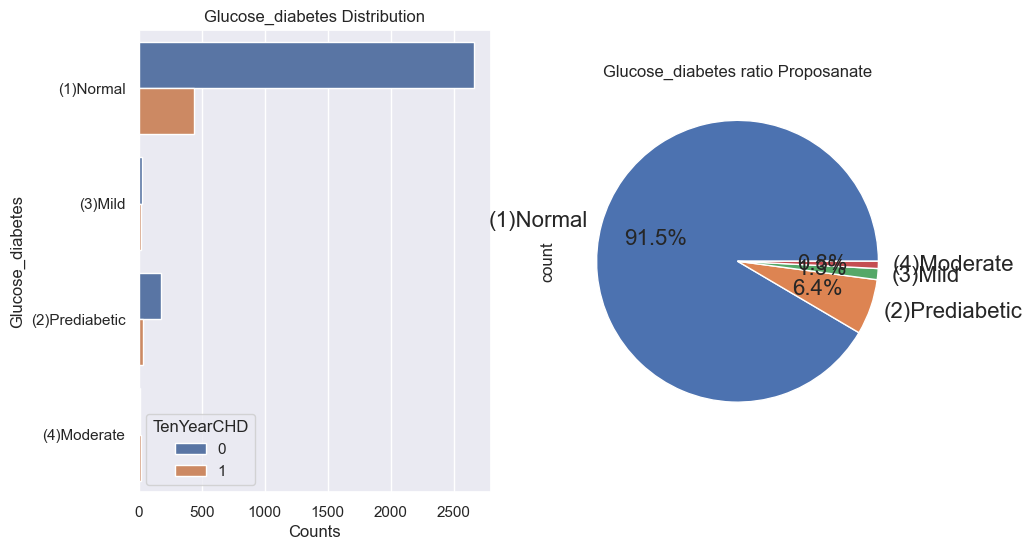

In [243]:
#  Distribution of "Hypertension"
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax1=plt.subplot(1,2,1)
sns.countplot(y="Glucose_diabetes", hue="TenYearCHD", data=data1)
plt.xlabel('Counts')
plt.ylabel('Glucose_diabetes')
plt.title('Glucose_diabetes Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data1['Glucose_diabetes'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('Glucose_diabetes ratio Proposanate')



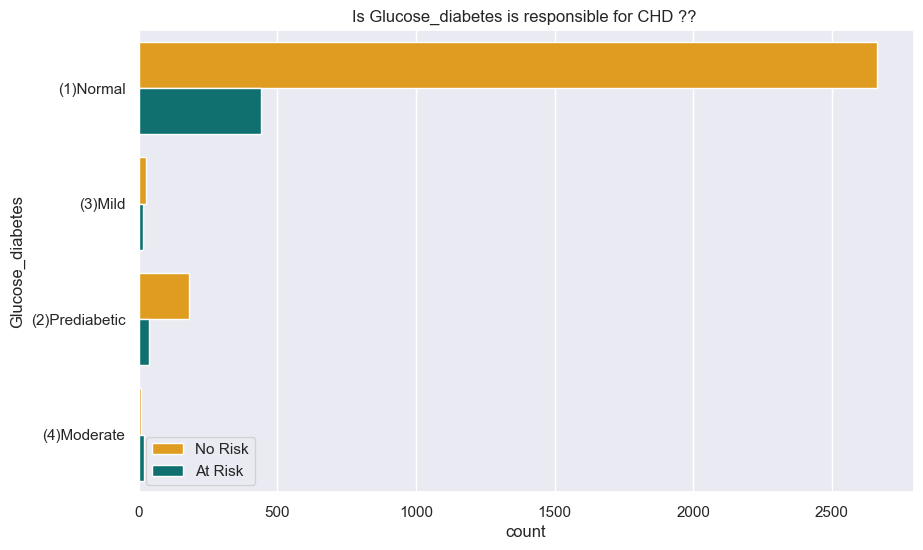

In [244]:
plt.figure(figsize = (10,6))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(y = data1['Glucose_diabetes'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Is Glucose_diabetes is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

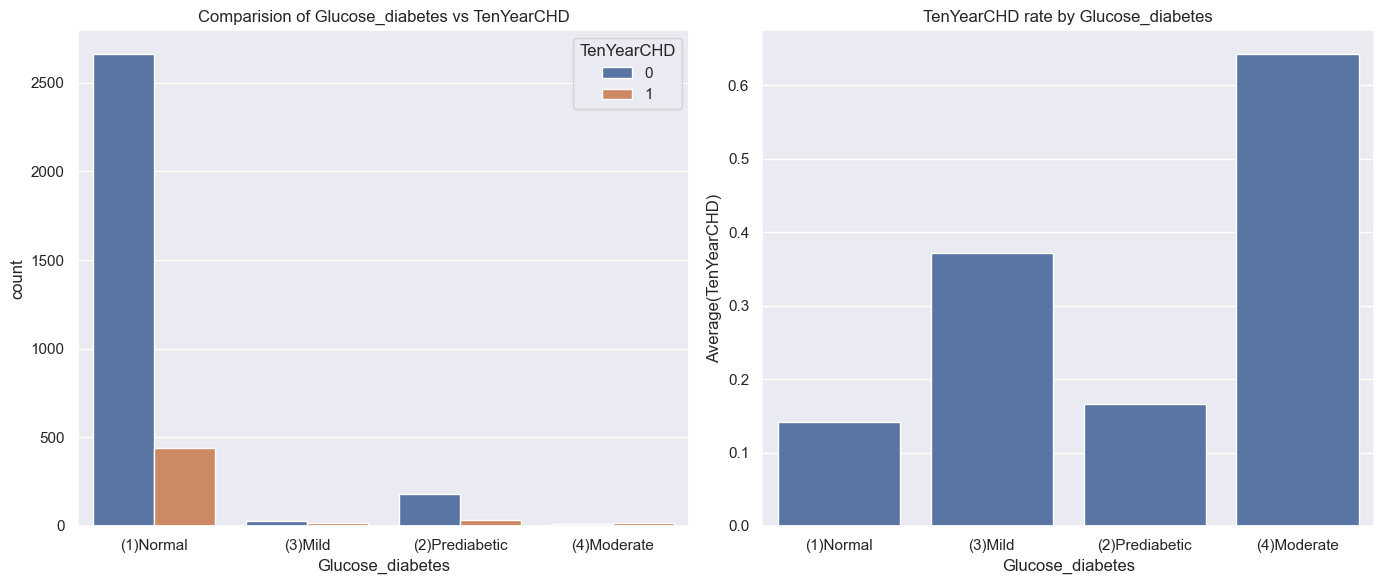

In [245]:
CategoricalVariables_targetPlots(data1,"Glucose_diabetes")

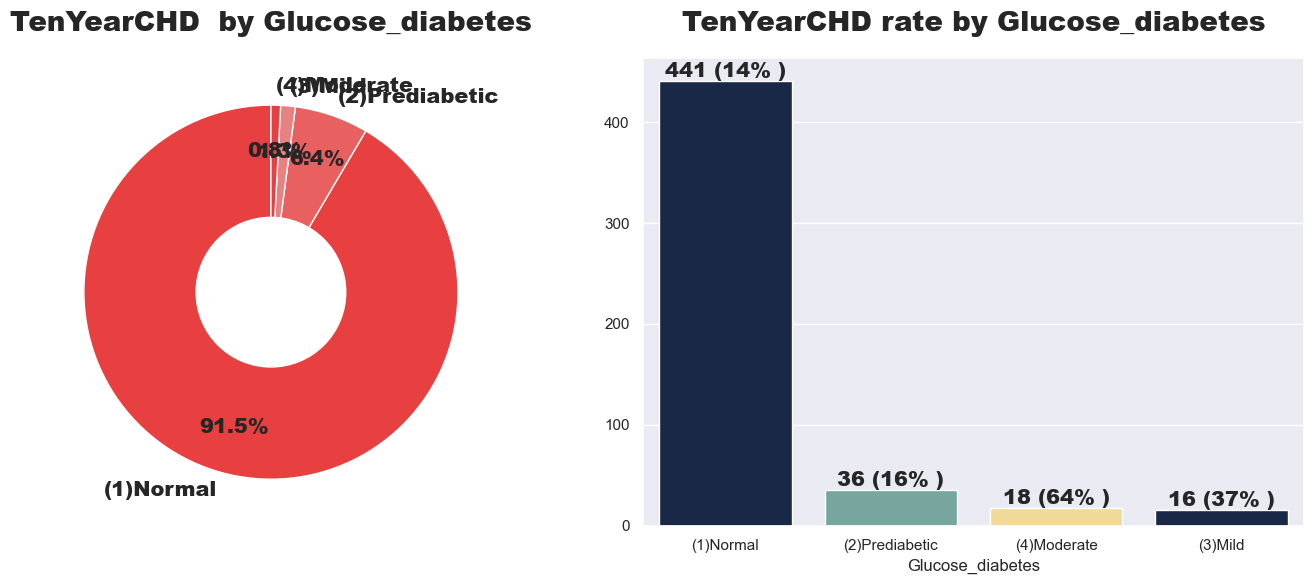

In [246]:
#Visualization to show TenYearCHD by Glucose_diabetes.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data1["Glucose_diabetes"].value_counts()
plt.title("TenYearCHD  by Glucose_diabetes", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show TenYearCHD Rate by Glucose_diabetes.
plt.subplot(1,2,2)
new_df = data1[data1["TenYearCHD"]==1]
value_2 = new_df["Glucose_diabetes"].value_counts()
# acceptance_rate = np.floor((value_2/value_1)*100).values
acceptance_rate = [14, 16, 64, 37]
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("TenYearCHD rate by Glucose_diabetes",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(acceptance_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()




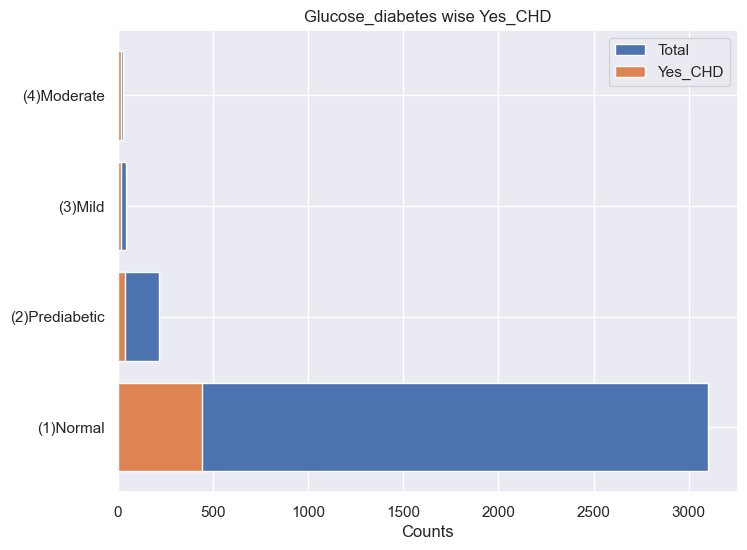

Glucose_diabetes  Total_Count  % of Total  Yes_CHD  No_CHD  %Yes_CHD  \
0        (1)Normal         3103   91.533923      441    2662    14.212   
1   (2)Prediabetic          216    6.371681       36     180    16.667   
2          (3)Mild           43    1.268437       16      27    37.209   
3      (4)Moderate           28    0.825959       18      10    64.286   

   %No_CHD  
0   85.788  
1   83.333  
2   62.791  
3   35.714

In [247]:
Univariate_Analysis1("Glucose_diabetes")

TenYearCHD Glucose_diabetes  count  count_norm
0           0        (1)Normal   2662    0.857879
1           0   (2)Prediabetic    180    0.833333
2           0          (3)Mild     27    0.627907
3           0      (4)Moderate     10    0.357143
4           1        (1)Normal    441    0.142121
5           1   (2)Prediabetic     36    0.166667
6           1          (3)Mild     16    0.372093
7           1      (4)Moderate     18    0.642857

<Axes: xlabel='Glucose_diabetes'>

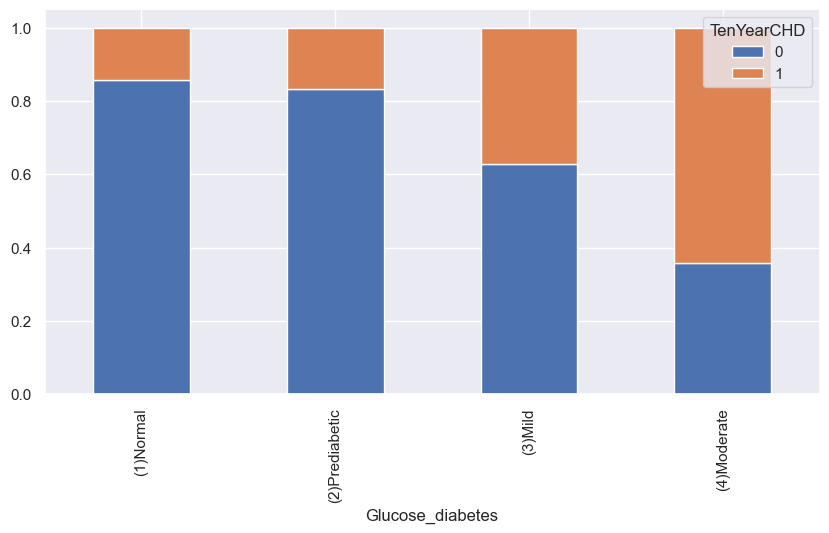

In [248]:
tmp = data1[["TenYearCHD", "Glucose_diabetes"]]
tmp["count"] = 1
tmp = tmp.groupby(["TenYearCHD", "Glucose_diabetes"], as_index=False).count()
tmp["count_norm"] = 1
def get_norm_count(row):
    q = "Glucose_diabetes==\""+row["Glucose_diabetes"]+"\""
    val = tmp.query(q)["count"].sum()
    row["count_norm"] = row["count"]/val
    return row
tmp = tmp.apply(get_norm_count, axis=1)
display(tmp)
tmp.pivot(columns="TenYearCHD", index="Glucose_diabetes", values="count_norm").plot.bar(stacked=True,
                                                                          figsize=(10,5))




In [249]:
# Hypothesis testing on "Hypertension" column
stat, p_val, dof = chi_sqred_ind_test(data1, "Glucose_diabetes", "TenYearCHD", 0.05)

Contigency table: 
 TenYearCHD           0    1
Glucose_diabetes           
(1)Normal         2662  441
(2)Prediabetic     180   36
(3)Mild             27   16
(4)Moderate         10   18
Statistic: 71.65705278625288
P-value: 1.8852845456112265e-15
DOF: 3
probability=0.950, critical=7.815, stat=71.657
Dependent (reject Null Hypothesis(H0))
Dependent (reject Null Hypothesis(H0))


## Distribution of Data

In [250]:
# Separating the categorical and continous variable and storing them into different lists (excluding 'id')
categorical_variable=[]
continous_variable=[]

for i in data.columns:
    if i == 'id':
        pass
    elif data[i].nunique() <10:
        categorical_variable.append(i)
    elif data[i].nunique() >= 10:
        continous_variable.append(i)

In [251]:
print(categorical_variable)
print("*"*50)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
**************************************************
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


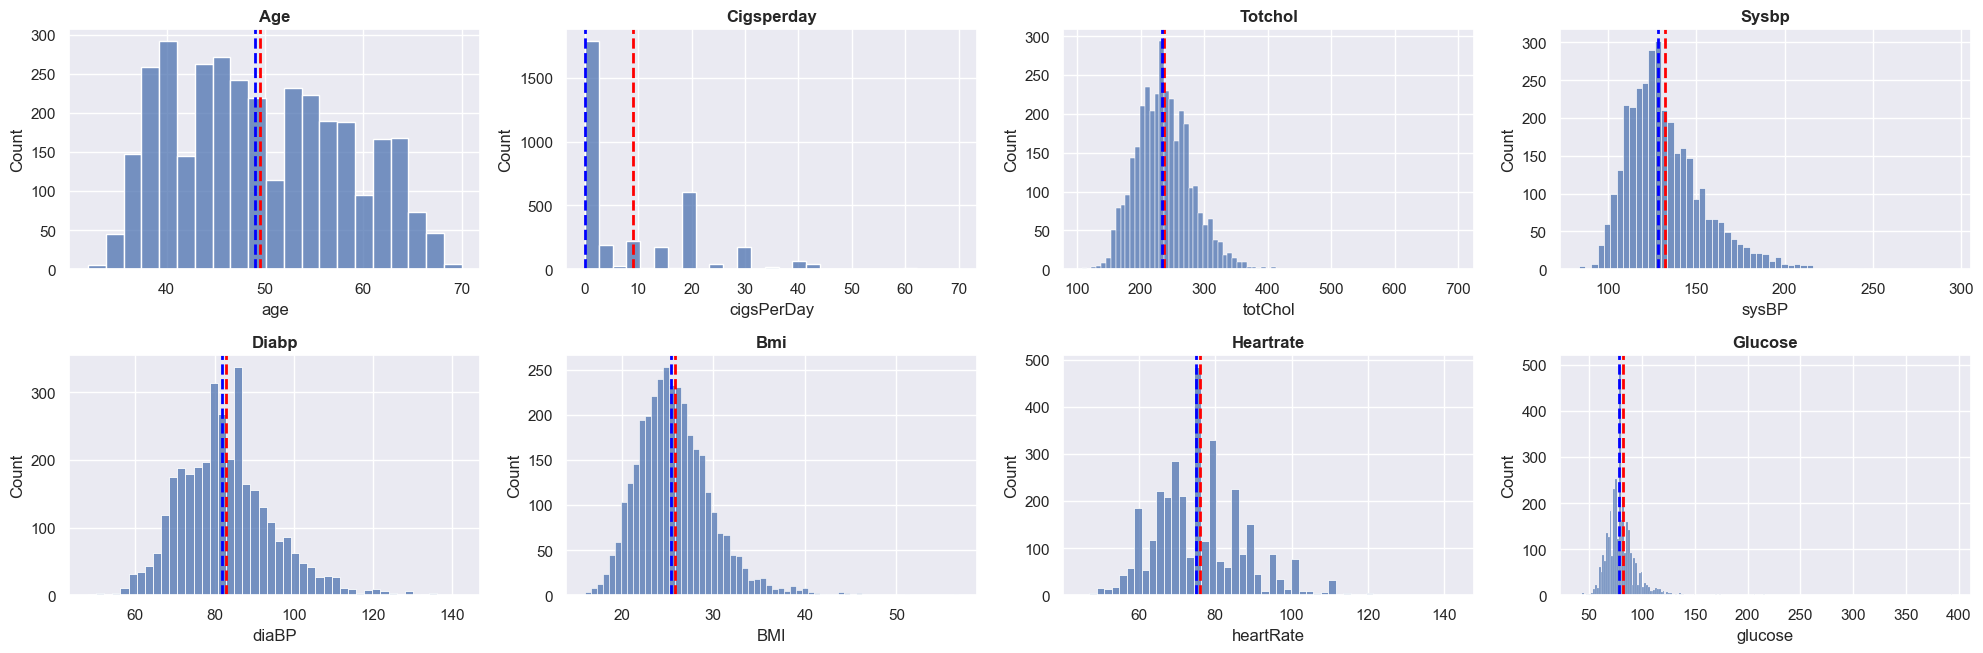

In [252]:
# Visualizing the mean and median.
plt.figure(figsize=(20,16))
for n,column in enumerate(continous_variable):
    feature = data1[column]
    ax=plt.subplot(5, 4, n+1)
    sns.histplot(feature)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
     

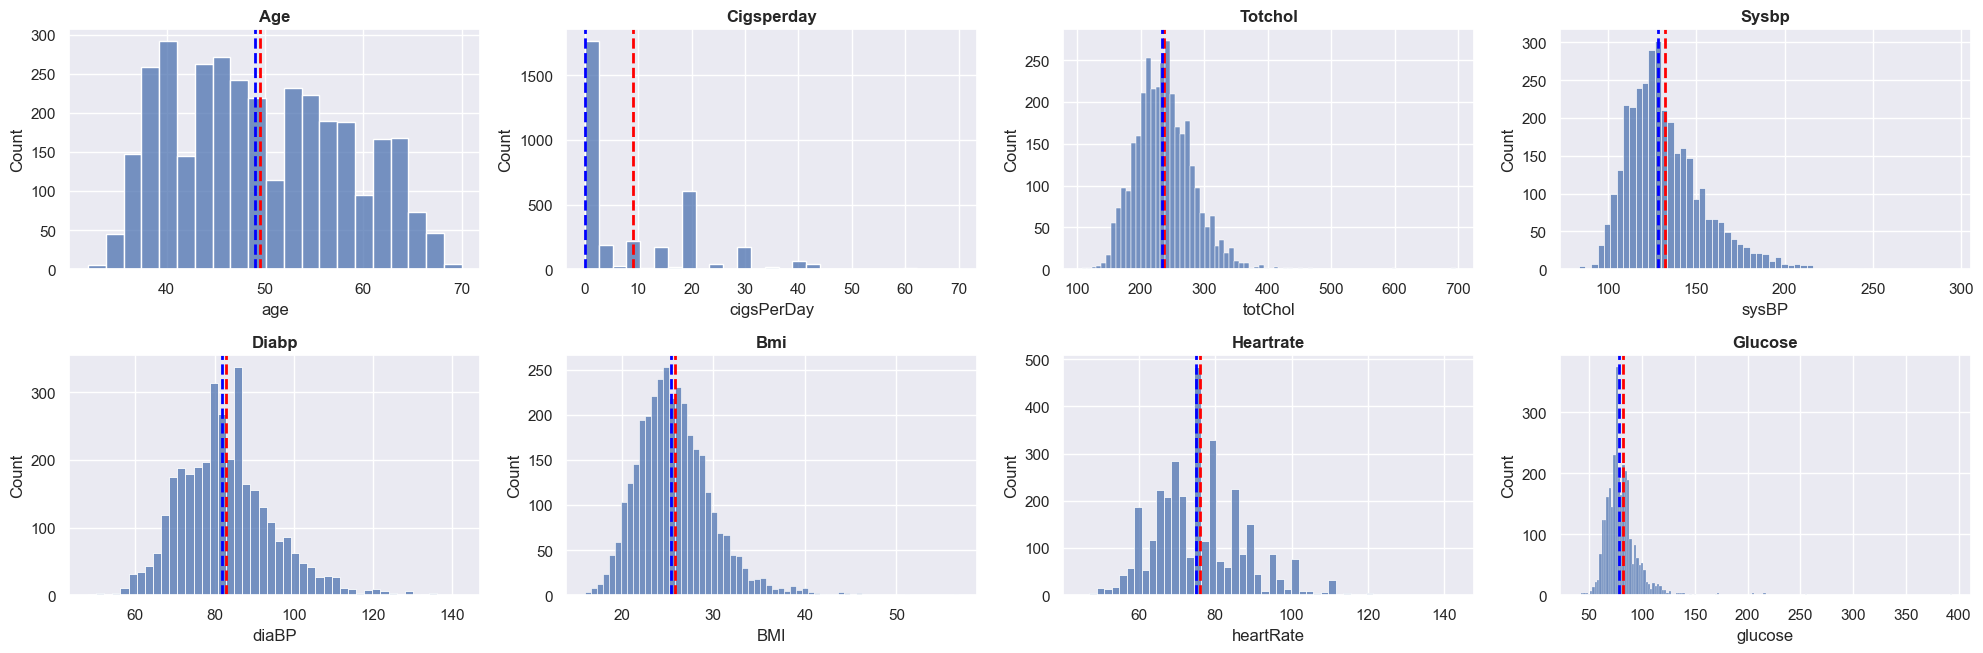

In [253]:
# Visualizing the mean and median.
plt.figure(figsize=(20,16))
for n,column in enumerate(continous_variable):
    feature = data[column]
    ax=plt.subplot(5, 4, n+1)
    sns.histplot(feature)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
     

<Axes: >

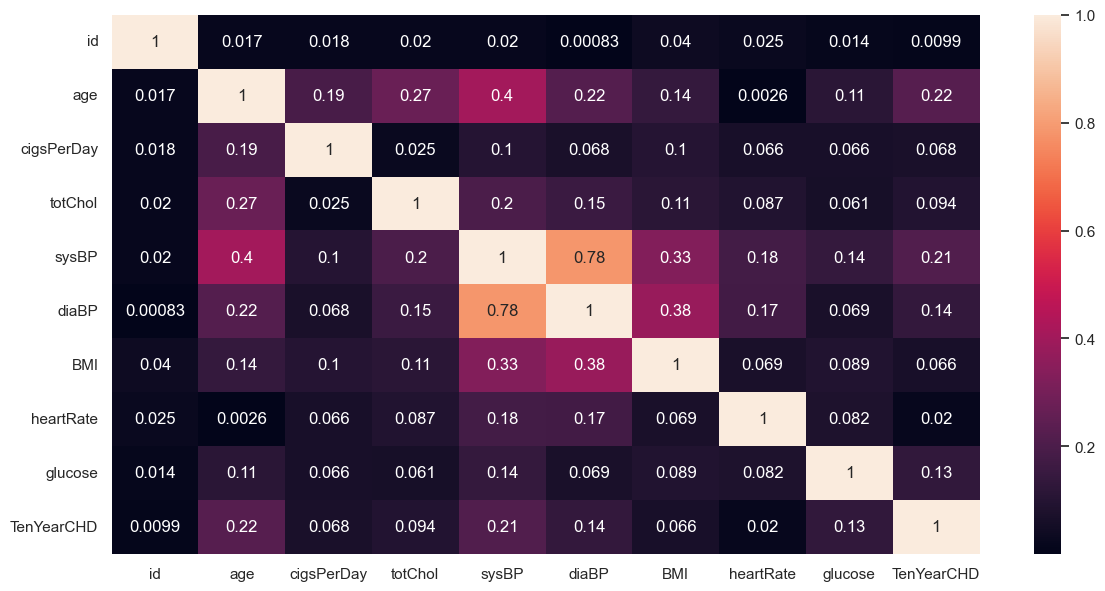

In [255]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,7))
correlation = data1.corr(numeric_only=True)
sns.heatmap(abs(correlation), annot=True)

In [ ]:
# Selecting our features wisely to avoid overfitting
# Correlation
plt.figure(figsize=(15,6))
sns.heatmap(data1.corr(), annot=True, cmap=sns.color_palette("Set1"))

## Bivariate Analysis

In [ ]:
def plot_bivariate(f1,f2,data2,rotate_ticks=False,deg=90):

    '''
    Helper function to see if any bivariate relatonships in data are helping us i detecting any trends in categorical data
    '''

    data1['feature_comb'] = data1[f1].astype('str') + ' & ' + data1[f2].astype('str')
    fig = plt.subplots(figsize =(10, 3))
    sns.countplot(x='feature_comb',hue='TenYearCHD',data=data1)
    plt.xlabel("Combination of {} & {}".format(f1,f2))
    plt.title("Effect of {} & {} on target variable".format(f1,f2))
    plt.ylabel("")
    if rotate_ticks:
        plt.xticks(rotation=deg)
#     plt.legend(labels=['Rejected','Accepted'])
    plt.show()


In [ ]:
plot_bivariate("Hypertension", "BPMeds", data1, rotate_ticks=True, deg=30)

### Chart - 1 (Scatterplot of continous correlated features)

In [ ]:
# Lets make a copy of original dataframe and make all features numeric in order to visualize them properly
df_copied= data1.copy()

In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df_copied = df_copied.replace(encoder)
     

In [ ]:
df_copied.columns[:-1]

In [ ]:
#  visualization code
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
sns.scatterplot(data1['sysBP'],data1['diaBP'])

plt.subplot(1,5,2)
sns.scatterplot(data1['BMI'],data1['diaBP'])

plt.subplot(1,5,3)
sns.scatterplot(data1['BMI'],data1['sysBP'])

plt.subplot(1,5,4)
sns.scatterplot(data1['age'],data1['diaBP'])

plt.subplot(1,5,5)
sns.scatterplot(data1['age'],data1['sysBP'])

plt.show()
     

#### 1. Why did we pick the specific chart?
Above distribution of continous features uses scatter plot for data representation. We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

From above plot we can visualise the relationship between :

sysBP and diaBP

BMI and diaBP

BMI and sysBP

age and diaBP

age and sysBP

#### 2. What is/are the insight(s) found from the chart?
We see that the first three have strong positive correlation and the last two have a moderate positive correlation .

### Chart - 2(Are total cholestrol levels related to CHD and Diabetes)

In [ ]:
plt.figure(figsize=(6,4))
plots=sns.barplot(x=data1['TenYearCHD'],y=data1['totChol'],hue=data1['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
     

#### 1. Why did we pick the specific chart?
TotChol and CHD risk has been displayed by using multiple bar charts. Multiple bar charts are extremely useful if we want to present a large amount of information in a small amount of space.We plotted it to know how the Cholestrol level is related to getting a Heart Diseases.

#### 2. What is/are the insight(s) found from the chart?
We can see that there is not much of a difference of cholestrol level for being a sole reason of heart diseases. And diabetic patients are slightly more prone to CHD.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from above graph that there is slight difference of cholestrol levels looking at CHD patients and normal resident. Still to avoid a risk dignostic or fitness companines can provide medications or respective measures to reduce cholestrol.

### Chart - 3 (Countplot of categorical features with target variable)

In [ ]:
plt.figure(figsize=(20,18))
for i,j in enumerate(categorical_variable):
    plt.subplot(4,4,i+1)
    plots= sns.countplot(data1[j], hue=data1['TenYearCHD'], palette=['mediumturquoise',"tomato"])
    plt.legend(['No Risk', 'At Risk'])

    for bar in plots.patches:
        plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

#### 1. Why did we pick the specific chart?
Above independent feature distribution bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.With the help of above charts we can conclude if BP problems , prevalent strokes , prevalent hypertentions and diabetes are prone to get affected by Heart Disease.

#### 2. What is/are the insight(s) found from the chart?
From the above count plots , we can clearly see that BP Problems , prevalent strokes , prevalent hypertension and dieabetes does have a great impact on getting Heart Diseases.

* Residents who are at education Level-1 are having slightly more percentage of getting suffered from CHD as compared to other education levels.
* Males are more prone to CHD as compared to females.
* Smokers are having slight more chances of suffering from CHD than non-smokers.
* Residents who are not on a BP medication are having minimal chances as compared to medicated patients of suffering to CHD.
* Patients who are having stroke or hypertention history, diabetes are more prone to CHD.

### Chart - 4(which age group is vulnerable to CHD?)

In [ ]:
ax = sns.factorplot('age', 'TenYearCHD', kind='bar', data = data1, size=4.5, aspect=3.5)
ax.set_ylabels('CHD Probability')
plt.title("Which Age Group which is more vulnerable to CHD")
plt.show()
     

#### 1. Why did we pick the specific chart?
We plotted age-CHD Probability plot to know which age group is more vulnerable to Heart Diseases.

#### 2. What is/are the insight(s) found from the chart?
we can see that age column is correlated to cardiovascular risk. With increasing age, chances of having cardiovascular disease increases.People above 65 years (i.e. old people) are more vulnerable to Heart Diseases.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As age factor is quite responsible for cardiovascular risk we can target every individual regardless of there health situations and habits as everyone is going to age. Awareness can be spread which can help all companies and individuals wellbeing.

## Multivariate Analysis

### Chart - 1 (Relation between Sex and CigsPerDAY with TenYearCHD)

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(6,5))
plots=sns.barplot(x=data1['sex'],y=data1['cigsPerDay'],palette=["lightgreen","lightcoral"],hue=data1['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

#### 1. Why did we pick the specific chart?
As we know bar chart is useful when we are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of smoking column.

#### 2. What is/are the insight(s) found from the chart?
There are more males consuming cigarattes as compared to females.
Under male category,males who are consuming more cigarettes are at a risk of getting Heart Diseases while in females there are quite equal chances for smoker or non-smoker females to get affected by CHD.
#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can observe that people are at equal risk regradless of they are smoking or not thus when an healthcare company is promoting any specific health care service be it Insurance, routine checkup plans, or tests, they can spread the awareness in no smoking community as well, which inturn increases the consumer base and give protection to wider population and profits to company.

### Chart - 3(Are glucose level impacted by CHD and Diabetes?)

In [ ]:
plt.figure(figsize=(6,4))
plots=sns.barplot(x=data1['TenYearCHD'],y=data1['glucose'],hue=data1['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

#### 1. Why did we pick the specific chart?
Glucose-CHD distribution with respect to diabetes uses a multiple bar chart for data representation.Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.By plotting above chart we can get to know if glucose Level leads to heart diseases or not.

#### 2. What is/are the insight(s) found from the chart?
From the above plot, we can infer that higher glucose level lead to heart diseases resulting increased chances of diabetic patients to cardiovascular disease.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For the patients well being, as there are more chances of CHD for residents whose glucose level is high,Treatments and medication of cardio vascular diseases can be coupled with early signs of diabeties, As blood starts getting viscous with increase in concentration of glucose.

In [ ]:
data1.columns

In [ ]:
### Chart - (Are BMI level impacted by CHD and Diabetes?)

In [ ]:
plt.figure(figsize=(8,5))
plots=sns.barplot(x=data1['TenYearCHD'],y=data1['BMI'],hue=data1['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()



### Chart - 4(How heartRate is related to CHD considering patients on BP medication?)

In [ ]:
plt.figure(figsize=(6,4))
plots=sns.barplot(x=data1['TenYearCHD'],y=data1['heartRate'],hue=data1['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
     

#### 1. Why did we pick the specific chart?
Heart rate and CHD risk has been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.From above graph we can conclude how heart rate is related to Heart Diseases.

#### 2. What is/are the insight(s) found from the chart?
From the above plot, we can conclude that BP patients taking BP medicines and having higher heart rate are prone to CHD.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As higher heart rate is increasing possibility of heart disease , if awareness is spread it can help various health, nutrition and fitness, insurance and dignostic companines to generate revenue and also help the population to adapt more to better habits & to keep there heart rates in check.

### Chart - 5(Are patients with Systolic and Diastolic BP at risk of CHD?)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plots=sns.barplot(x=data1['TenYearCHD'],y=data1['sysBP'],hue=data1['BPMeds'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.subplot(1,2,2)
plots=sns.barplot(x=data1['TenYearCHD'],y=data1['diaBP'],hue=data1['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"]) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()
     

#### 1. Why did we pick the specific chart?
SysBP/diaBP-CHD distribution with respect to BPmeds uses a multiple bar chart for data representation.Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.We plotted above graph to know whether patients with systolic and diastolic BP are at a risk of Heart Disease or not.

#### 2. What is/are the insight(s) found from the chart?
We can infer from the graph that, people who are on BP medication are having high sysBP and diaBP.Even these patients are having high chances of getting suffered from CHD.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare companies and doctors can target and inspect the patient more throughly who is on BP medication. Which inturn decreases the cost of diagnosis and increases revenue of the company

### Chart -  - (Pair Plot)

In [ ]:

# Pair Plot visualization code
sns.pairplot(data1[continous_variable])

#### 1. Why did we pick the specific chart?
Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

#### 2. What is/are the insight(s) found from the chart?
From the above chart we can infer that sysBP and diaBP are positively correlated

### Chart - 6 (Correlation Heatmap)

In [ ]:

# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(), annot=True, cmap=sns.color_palette("Set1"))

#### 1. Why did we pick the specific chart?
Correlations are best represented using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

#### 2. What is/are the insight(s) found from the chart?
We can see that following have strong correlation :

* diaBP and sysBP

* prevalentHyp and diaBP

* prevalentHyp and sysBP

* diabetes and glucose

Following have weak correlation :

* glucose and cigPerDay
* BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education
* BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay

In [ ]:
data1.head()

# Hypothesis Test

## Perform t-test on Numerical Features

In [ ]:
numerical_columns = ["age","cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]



t_score = {}
p_value = {}
Yes_mean = {}
Yes_std = {}
No_mean = {}
No_std = {}


for column in data1[numerical_columns]:
    statistics, p_val = stats.ttest_ind(data1[column][data1["TenYearCHD"]==1], 
                                     data1[column][data1["TenYearCHD"]==0], equal_var=True)
    print(f"t_score for {column} : {statistics}")
    print(f"p_value for {column} : {p_val}")
    
    Yes_mean[column] = data1[column][data1["TenYearCHD"]==1].mean()
    Yes_std[column] = data1[column][data1["TenYearCHD"]==1].std()
    No_mean[column] = data1[column][data1["TenYearCHD"]==0].mean()
    No_std[column] = data1[column][data1["TenYearCHD"]==0].std()
    t_score[column] = statistics
    p_value[column] = p_val


In [ ]:
plt.figure(figsize=(15,6))
keys = list(t_score.keys())
values = list(t_score.values())

sns.barplot(x=keys, y=values)
plt.title("T-Test t_score Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

In [ ]:
test_df = pd.DataFrame({"Features":keys,"T_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_value.values())]
test_df["Yes_mean"] = [format(i, '.4f') for i in list(Yes_mean.values())]
test_df["No_mean"] = [format(i, '.4f') for i in list(No_mean.values())]
test_df["Yes_std"] = [format(i, '.4f') for i in list(Yes_std.values())]
test_df["No_std"] = [format(i, '.4f') for i in list(No_std.values())]


test_df

## PERFORM CHI-SQUARE TEST ON CATEGORICAL FEATURES

In [ ]:
data1.head()

In [ ]:
cat_cols = data1.select_dtypes(include="object").columns.tolist()
# cat_cols.remove("Accept(Y/N?)")
cat_cols

In [ ]:
chi2_statistic = {}
p_values = {}
# dof = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(data1[col], data1['TenYearCHD'])
    chi2, p_value, dof, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value
#     dof[col] = dof

In [ ]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(25, 10))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=25)

plt.show()


In [ ]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
test_df

In [ ]:
data1.shape

In [ ]:
data1.head()

## Checking Feature Importance

In [ ]:
data.head()

In [ ]:
data2.drop(["id", "sysBP", "diaBP"], axis=1, inplace=True)
data2.head()

In [ ]:
# Data Splitting
x = data2.drop(["TenYearCHD"], axis=1)
y = data2["TenYearCHD"]

In [ ]:
# importing SiumpleImputer
from sklearn.impute import SimpleImputer

imp1 = SimpleImputer(missing_values=np.nan, strategy="most_frequent").set_output(transform="pandas")
x[["education", "BPMeds"]] = imp1.fit_transform(x[["education", "BPMeds"]])


imp2 = SimpleImputer(missing_values=np.nan, strategy="median").set_output(transform="pandas")
x[["cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]] = imp2.fit_transform(x[["cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]])


In [ ]:
from feature_engine.encoding import OrdinalEncoder

encoder = OrdinalEncoder(variables=['sex', 'is_smoking','Hypertension','Glucose_diabetes'],ignore_format=True)
x = encoder.fit_transform(x, y)
x.head()

In [ ]:
# from feature_engine.encoding import OneHotEncoder

# ohe_enc = OneHotEncoder(drop_last=True)
# x = ohe_enc.fit_transform(x)
# x.head()

In [ ]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
x[["age", "cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]] = scaler.fit_transform(x[["age", "cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]])


In [ ]:
x.head()

In [ ]:
import sklearn
sklearn.__version__

### Feature_importance in LogisticRegression

In [ ]:
# applying LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
x = scaler.fit_transform(x)

logit = LogisticRegression()
logit.fit(x, y)



coefficients = logit.coef_[0]

feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
result = permutation_importance(logit, x, y, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

### Feature_importance in DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')
# Fit the decision tree classifier
clf = clf.fit(x, y)

# Print the feature importances
feature_importances = clf.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(sorted_importances, sorted_feature_names)



### Feature_importance in RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)

# Print the feature importances
feature_importances = rf.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(sorted_importances, sorted_feature_names)


In [ ]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(rf.feature_importances_)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 6))

In [ ]:
for name, score in zip(x.columns, rf.feature_importances_):
    print(name, (score*100))
    
pd.DataFrame({"Features":["BMI","totChol","glucose","age","heartRate","cigsPerDay","Hypertension","education","sex","prevalentHyp","Glucose_diabetes","BPMeds","is_smoking","prevalentStroke","diabetes"], 
              "Importance":[18.858096140631297,16.309928203832733,14.908208223781955,13.861904466357394,12.36324845472093,6.077016054085198,5.85584252999798,4.058146533809592,1.9100899325870428,1.8698281370316434,1.4809590752800672,0.8895589855434467,0.6613916746400016,0.5517601359169397,0.3440214517837979]})
  

In [ ]:
# Built-in Scikit-learn Method With feature_importance
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)

global_importances = pd.Series(rf.feature_importances_, index=x.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [ ]:
# Permutation Feature Importance
from sklearn.inspection import permutation_importance

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)

result = permutation_importance(rf, x, y, n_repeats=10, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = x.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)



### Feature_importance in AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=20,random_state=0)
ab_model.fit(x, y)

# Print the feature importances
feature_importances = ab_model.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(sorted_importances, sorted_feature_names)


In [ ]:
importances = ab_model.feature_importances_
res = pd.Series(importances, index=x.columns).sort_values()
res.plot.barh(figsize=(8, 6), title='Feature importance')

In [ ]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(ab_model.feature_importances_)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
# feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 6))

for name, score in zip(x.columns, ab_model.feature_importances_):
    print(name, (score*100))
    
pd.DataFrame({"Features":["age","BMI","glucose","totChol","cigsPerDay","Hypertension","heartRate","prevalentHyp","prevalentStroke","sex","Glucose_diabetes","diabetes","BPMeds","is_smoking","education"], 
              "Importance":[30,15,10,10,10,5,5,5,5,5,0,0,0,0,0]})
  

### Feature_importance in GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x, y)

# Print the feature importances
feature_importances = model.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(sorted_importances, sorted_feature_names)


In [ ]:
importances = model.feature_importances_
res = pd.Series(importances, index=x.columns).sort_values()
res.plot.barh(figsize=(8, 6), title='Feature importance')

### Feature_importance in XGBClassifier

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)

# Print the feature importances
feature_importances = model.feature_importances_



# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(sorted_importances, sorted_feature_names)


In [ ]:
importances = model.feature_importances_
res = pd.Series(importances, index=x.columns).sort_values()
res.plot.barh(figsize=(8, 6), title='Feature importance')

# Pre-Processing

## a) Class Distribution

In [256]:
Y_value_counts = data.groupby('TenYearCHD')['TenYearCHD'].count()
print('The number of patients that are prone to the CHD is ',Y_value_counts[1],',',round(Y_value_counts[1]/data.shape[0]*100,3),'%')
print('The number of patients that are not prone the CHD is ',Y_value_counts[0],',',round(Y_value_counts[0]/data.shape[0]*100,3),'%')

The number of patients that are prone to the CHD is  511 , 15.074 %
The number of patients that are not prone the CHD is  2879 , 84.926 %


* Dataset is Imbalanced, so need to balance it.

## b) Duplicate Values Treatment

In [257]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the data : {data.duplicated().sum()}")
print("*"*100)
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups]

The total number of duplicated observations in the data : 0
****************************************************************************************************
No of duplicate rows = 0


Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [258]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {data.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


## c) Dropping Columns

In [259]:
# Missing values
print("Is there any missing value present or not ?", data.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = data.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = data.isnull().sum()/len(data)*100
print(missing_percentage.sort_values(ascending=False))

Is there any missing value present or not ? True
**************************************************************************
Number of missing values
-------------------------------------
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP     

In [260]:
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

missing_count  missing_percentage
education              87            2.566372
cigsPerDay             22            0.648968
BPMeds                 44            1.297935
totChol                38            1.120944
BMI                    14            0.412979
heartRate               1            0.029499
glucose               304            8.967552

* Column id will be dropped as it gives nothing for modelling purposes.

In [261]:
data.corr()

ValueError: could not convert string to float: 'F'

In [262]:
# Dropping unwanted columns
data = data.drop(["id"], axis=1)
print('data:',data.shape)
print('-'*50)
print(data.columns.values)

data: (3390, 16)
--------------------------------------------------
['age' 'education' 'sex' 'is_smoking' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose' 'TenYearCHD']


## d ) Splitting The dataset into Independent and Dependent variables

In [263]:
x = data.drop(["TenYearCHD"], axis=1)
y = data["TenYearCHD"]

In [264]:
print(x.shape)
print(y.shape)

(3390, 15)
(3390,)


In [265]:
x.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0  
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0  
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0  
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0  
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0

## e) Splitting The Dataset into Train and Test

In [266]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=101)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2542, 15) (2542,)
(848, 15) (848,)


In [267]:
print("Class Distribution on data :")
print(data["TenYearCHD"].value_counts()/data.shape[0]*100)
print("*******************************************")
print(f"Class Distribution on y_train : \n{y_train.value_counts()/y_train.shape[0]*100}")
print("*******************************************")
print(f"Class Distribution on y_test : \n{y_test.value_counts()/y_test.shape[0]*100}")

Class Distribution on data :
TenYearCHD
0    84.926254
1    15.073746
Name: count, dtype: float64
*******************************************
Class Distribution on y_train : 
TenYearCHD
0    84.933124
1    15.066876
Name: count, dtype: float64
*******************************************
Class Distribution on y_test : 
TenYearCHD
0    84.90566
1    15.09434
Name: count, dtype: float64


## f) Missing Value Impution

In [268]:
# Checking missing values in data
# Missing values
print("Is there any missing value present or not ?", data.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = data.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = data.isnull().sum()/len(data)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {data1[i].unique()}")
    print(data1[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
for i in numerical_features:
    print(f"{i} : {data1[i].unique()}")
    print(f"Mean : {data1[i].mean()}")
    print(f"Median : {data1[i].median()}")
    print(f"Standard Deviation : {data1[i].std()}")
    Q1 = data1[i].quantile(0.25)
    Q3 = data1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = data1[i][((data1[i]<(Q1-1.5*IQR)) | (data1[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {data1[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {data1[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? True
**************************************************************************
Number of missing values
-------------------------------------
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
age                0.000000
sex                0.000000
is_smoking         0.000000
preva

In [269]:
# Checking missing values in x_train
# Missing values
print("Is there any missing value present or not ?", x_train.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_train.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_train.isnull().sum()/len(x_train)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_train.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(x_train[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
for i in numerical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(f"Mean : {x_train[i].mean()}")
    print(f"Median : {x_train[i].median()}")
    print(f"Standard Deviation : {x_train[i].std()}")
    Q1 = x_train[i].quantile(0.25)
    Q3 = x_train[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = x_train[i][((x_train[i]<(Q1-1.5*IQR)) | (x_train[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {x_train[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {x_train[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? True
**************************************************************************
Number of missing values
-------------------------------------
age                  0
education           69
sex                  0
is_smoking           0
cigsPerDay          18
BPMeds              29
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             25
sysBP                0
diaBP                0
BMI                 11
heartRate            0
glucose            232
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
glucose            9.126672
education          2.714398
BPMeds             1.140834
totChol            0.983478
cigsPerDay         0.708104
BMI                0.432730
age                0.000000
sex                0.000000
is_smoking         0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000


In [270]:
# Checking missing values in x_test
# Missing values
print("Is there any missing value present or not ?", x_test.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_test.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_test.isnull().sum()/len(x_test)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_test.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {x_test[i].unique()}")
    print(x_test[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
for i in numerical_features:
    print(f"{i} : {x_test[i].unique()}")
    print(f"Mean : {x_test[i].mean()}")
    print(f"Median : {x_test[i].median()}")
    print(f"Standard Deviation : {x_test[i].std()}")
    Q1 = x_test[i].quantile(0.25)
    Q3 = x_test[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = x_test[i][((x_test[i]<(Q1-1.5*IQR)) | (x_test[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {x_test[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {x_test[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? True
**************************************************************************
Number of missing values
-------------------------------------
age                 0
education          18
sex                 0
is_smoking          0
cigsPerDay          4
BPMeds             15
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            13
sysBP               0
diaBP               0
BMI                 3
heartRate           1
glucose            72
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
glucose            8.490566
education          2.122642
BPMeds             1.768868
totChol            1.533019
cigsPerDay         0.471698
BMI                0.353774
heartRate          0.117925
age                0.000000
sex                0.000000
is_smoking         0.000000
prevalentStroke    0.000000
prevalentHyp   

##### Imputing mode on missing values

In [271]:
# importing SiumpleImputer
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(missing_values=np.nan, strategy="most_frequent").set_output(transform="pandas")
x_train[["education", "BPMeds"]] = imputer1.fit_transform(x_train[["education", "BPMeds"]])
x_test[["education", "BPMeds"]] = imputer1.transform(x_test[["education", "BPMeds"]])

imputer2 = SimpleImputer(missing_values=np.nan, strategy="median").set_output(transform="pandas")
x_train[["cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]] = imputer2.fit_transform(x_train[["cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]])
x_test[["cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]] = imputer2.transform(x_test[["cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]])

In [272]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2542 entries, 262 to 41
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2542 non-null   int64  
 1   education        2542 non-null   float64
 2   sex              2542 non-null   object 
 3   is_smoking       2542 non-null   object 
 4   cigsPerDay       2542 non-null   float64
 5   BPMeds           2542 non-null   float64
 6   prevalentStroke  2542 non-null   int64  
 7   prevalentHyp     2542 non-null   int64  
 8   diabetes         2542 non-null   int64  
 9   totChol          2542 non-null   float64
 10  sysBP            2542 non-null   float64
 11  diaBP            2542 non-null   float64
 12  BMI              2542 non-null   float64
 13  heartRate        2542 non-null   float64
 14  glucose          2542 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 317.8+ KB


In [273]:
# Checking missing values in x_train
# Missing values
print("Is there any missing value present or not ?", x_train.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_train.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_train.isnull().sum()/len(x_train)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_train.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(x_train[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
for i in numerical_features:
    print(f"{i} : {x_train[i].unique()}")
    print(f"Mean : {x_train[i].mean()}")
    print(f"Median : {x_train[i].median()}")
    print(f"Standard Deviation : {x_train[i].std()}")
    Q1 = x_train[i].quantile(0.25)
    Q3 = x_train[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = x_train[i][((x_train[i]<(Q1-1.5*IQR)) | (x_train[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {x_train[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {x_train[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? False
**************************************************************************
Number of missing values
-------------------------------------
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose        

In [274]:
# Checking missing values in x_test
# Missing values
print("Is there any missing value present or not ?", x_test.isnull().values.any())
print("**************************************************************************")
print("Number of missing values")
print("-------------------------------------")
missing_values = x_test.isnull().sum()
print(missing_values)
print("**************************************************************************")
print("Missing Percentage of Null Values")
print("-------------------------------------")
missing_percentage = x_test.isnull().sum()/len(x_test)*100
print(missing_percentage.sort_values(ascending=False))

print("==========================================================================")
missing_value_df = pd.DataFrame({'missing_count': x_test.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

print("==========================================================================")
categorical_features = ["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for i in categorical_features:
    print(f"{i} : {x_test[i].unique()}")
    print(x_test[i].value_counts())
    print("===================================================================================")
    
numerical_features = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
for i in numerical_features:
    print(f"{i} : {x_test[i].unique()}")
    print(f"Mean : {x_test[i].mean()}")
    print(f"Median : {x_test[i].median()}")
    print(f"Standard Deviation : {x_test[i].std()}")
    Q1 = x_test[i].quantile(0.25)
    Q3 = x_test[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR
    outliers = x_test[i][((x_test[i]<(Q1-1.5*IQR)) | (x_test[i]>(Q3+1.5*IQR)))]
    print(f"Quintile1(Q1) : {x_test[i].quantile(0.25)}")
    print(f"Quintile1(Q3) : {x_test[i].quantile(0.75)}")
    print(f"IQR : {IQR}")
    print(f"upper_bound : {upper_bound}")
    print(f"lower_bound : {lower_bound}")
    print(f"No. of Outliers : {outliers.count()}")
    print("===================================================================================")

Is there any missing value present or not ? False
**************************************************************************
Number of missing values
-------------------------------------
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64
**************************************************************************
Missing Percentage of Null Values
-------------------------------------
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose        

In [275]:
for i in x_train.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(x_train[i].tolist()))
    print()

****************************** age ******************************************

{33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}

****************************** education ******************************************

{1.0, 2.0, 3.0, 4.0}

****************************** sex ******************************************

{'M', 'F'}

****************************** is_smoking ******************************************

{'NO', 'YES'}

****************************** cigsPerDay ******************************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 23.0, 25.0, 30.0, 35.0, 38.0, 40.0, 43.0, 45.0, 50.0, 60.0, 70.0}

****************************** BPMeds ******************************************

{0.0, 1.0}

****************************** prevalentStroke ******************************************

{0, 1}

*****

In [276]:
for i in x_test.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(x_test[i].tolist()))
    print()

****************************** age ******************************************

{32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}

****************************** education ******************************************

{1.0, 2.0, 3.0, 4.0}

****************************** sex ******************************************

{'M', 'F'}

****************************** is_smoking ******************************************

{'NO', 'YES'}

****************************** cigsPerDay ******************************************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 25.0, 30.0, 35.0, 40.0, 43.0, 60.0}

****************************** BPMeds ******************************************

{0.0, 1.0}

****************************** prevalentStroke ******************************************

{0, 1}

****************************** prevalentHyp ***************

## g) Feature Engineering

### Hypertension

* Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [277]:
def blood_presure_classification(SysBP, DiaBP):
    if (SysBP < 90) or (DiaBP < 60):
        return 0
    if (SysBP < 120) and (DiaBP < 80):
        return 1
    if (SysBP < 129) or (DiaBP < 84):
        return 2
    if (SysBP < 140) or (DiaBP < 89):
        return 3
    if (SysBP > 140) and (DiaBP < 90):
        return 4
    if (SysBP < 160) or (DiaBP < 100):
        return 5
    if (SysBP < 180) or (DiaBP >= 110):
        return 6
    return 7



x_train['Hypertension'] = x_train.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
x_test['Hypertension'] = x_test.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)


### Glucose_diabetes

In [278]:
def diabetes_grade(glucose):
    if glucose < 100:
        return 1
    if glucose < 125:
        return 2
    if glucose < 200:
        return 3
    if glucose < 400:
        return 4
    return 5    
   

x_train['Glucose_diabetes'] = x_train['glucose'].apply(lambda x: diabetes_grade(x))
x_test['Glucose_diabetes'] = x_test['glucose'].apply(lambda x: diabetes_grade(x))

In [279]:
x_train.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
262    44        1.0   M        YES        30.0     0.0                0   
1212   46        4.0   F         NO         0.0     0.0                0   
3294   37        1.0   F         NO         0.0     0.0                0   
3124   41        2.0   F         NO         0.0     0.0                0   
2286   60        1.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
262              1         0    230.0  128.0   87.0  26.02       70.0   
1212             0         0    192.0  122.0   83.0  23.99       78.0   
3294             0         0    192.0  112.0   67.0  24.61       80.0   
3124             0         0    232.0  117.5   77.5  20.62       53.0   
2286             1         0    279.0  140.5   89.0  22.43       80.0   

      glucose  Hypertension  Glucose_diabetes  
262      73.0             2                 1  
1212    106.0             2                 2  
3294     58.0             1                 1  
3124     75.0             1                 1  
2286     69.0             4                 1

In [280]:
x_test.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
441    35        2.0   M         NO         0.0     0.0                0   
1292   65        2.0   M         NO         0.0     0.0                0   
2391   65        1.0   F         NO         0.0     0.0                0   
2096   48        1.0   F        YES        25.0     0.0                0   
1196   41        4.0   F        YES        20.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
441              1         0    245.0  159.0   95.5  26.23      110.0   
1292             0         0    286.0  135.0   80.0  28.06       70.0   
2391             1         0    223.0  158.0   90.0  27.26       85.0   
2096             0         1    304.0  102.0   66.5  28.90      100.0   
1196             0         0    243.0   97.0   63.0  22.53       76.0   

      glucose  Hypertension  Glucose_diabetes  
441      78.0             5                 1  
1292    116.0             2                 2  
2391     93.0             5                 1  
2096     66.0             1                 1  
1196     64.0             1                 1

In [281]:
x_train.drop(columns=['sysBP', 'diaBP'], inplace=True)
x_test.drop(columns=['sysBP', 'diaBP'], inplace=True)
     

In [282]:
x_train.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
262    44        1.0   M        YES        30.0     0.0                0   
1212   46        4.0   F         NO         0.0     0.0                0   
3294   37        1.0   F         NO         0.0     0.0                0   
3124   41        2.0   F         NO         0.0     0.0                0   
2286   60        1.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol    BMI  heartRate  glucose  \
262              1         0    230.0  26.02       70.0     73.0   
1212             0         0    192.0  23.99       78.0    106.0   
3294             0         0    192.0  24.61       80.0     58.0   
3124             0         0    232.0  20.62       53.0     75.0   
2286             1         0    279.0  22.43       80.0     69.0   

      Hypertension  Glucose_diabetes  
262              2                 1  
1212             2                 2  
3294             1                 1  
3124             1                 1  
2286             4                 1

## h) Data Encoding

In [283]:
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(drop_last=True)
x_train = ohe_enc.fit_transform(x_train)
x_test = ohe_enc.transform(x_test)
# x_train_enc.head()

In [ ]:
# # Applying one hot encoder on object type variables
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ohe_cols_train = x_train.dtypes[x_train.dtypes==object].index.values

# encoder = OneHotEncoder(drop="first", sparse_output=False)

# ohe = ColumnTransformer(
#     transformers=[("ohe", encoder, ohe_cols_train),],
#     remainder="passthrough",
# )
# ohe.set_output(transform="pandas")
# x_train = ohe.fit_transform(x_train)
# x_test = ohe.transform(x_test)


In [ ]:
# # Applying one hot encoder on object type variables
# from sklearn.preprocessing import OneHotEncoder

# ohe_cols_train = x_train.dtypes[x_train.dtypes==object].index.values
# ohe = OneHotEncoder(categories=['sex', 'is_smoking'], drop="first", sparse_output=False, handle_unknown="ignore").set_output(transform="pandas")
# x_train = ohe.fit_transform(x_train)
# x_test = ohe.transform(x_test)


In [ ]:
# # Applying one hot encoder on object type variables
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore").set_output(transform="pandas")
# ohe.fit_transform(x_train[["sex","is_smoking"]])
# ohe.transform(x_test[["sex", "is_smoking"]])


In [284]:
x_train.head()

age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
262    44        1.0        30.0     0.0                0             1   
1212   46        4.0         0.0     0.0                0             0   
3294   37        1.0         0.0     0.0                0             0   
3124   41        2.0         0.0     0.0                0             0   
2286   60        1.0         0.0     0.0                0             1   

      diabetes  totChol    BMI  heartRate  glucose  Hypertension  \
262          0    230.0  26.02       70.0     73.0             2   
1212         0    192.0  23.99       78.0    106.0             2   
3294         0    192.0  24.61       80.0     58.0             1   
3124         0    232.0  20.62       53.0     75.0             1   
2286         0    279.0  22.43       80.0     69.0             4   

      Glucose_diabetes  sex_M  is_smoking_YES  
262                  1      1               1  
1212                 2      0               0  
3294                 1      0               0  
3124                 1      0               0  
2286                 1      0               0

In [ ]:
x_test.head()

## i) Data Scaling

In [ ]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
x_train[["age", "cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]] = scaler.fit_transform(x_train[["age", "cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]])
x_test[["age", "cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]] = scaler.transform(x_test[["age", "cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]])

In [ ]:
x_train.head()

In [ ]:
x_test.head()

In [ ]:
x_train.info()

In [ ]:
x_train.shape

In [ ]:
hklhlk

## j) Handling Imbalanced Dataset

In [ ]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())
     

##### Balancing by SMOTE

In [ ]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

# Fitting the training data 
smote_train = SMOTE(sampling_strategy='minority', random_state=0)
x_train_smote, y_train_smote = smote_train.fit_resample(x_train, y_train)



# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_train_smote,'After'], [y_test, 'After']]:
    print(label+' Handling Class Imbalace:')
    print(col.value_counts(), "\n")

##### Balancing by BorderlineSMOTE

In [ ]:
# Importing BorderlineSMOTE for balancing the dataset
from imblearn.over_sampling import BorderlineSMOTE

# Fitting the training data 
border_train = BorderlineSMOTE(sampling_strategy='minority', random_state=0)
x_train_border, y_train_border= border_train.fit_resample(x_train, y_train)



# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_train_border,'After'], [y_test, 'After']]:
    print(label+' Handling Class Imbalace:')
    print(col.value_counts(), "\n")

In [ ]:
fbgfjgykhuli;ok'[opioliu

# ML Model Implementation

In [ ]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):
    
    '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

    # Fitting the model
    model.fit(x_train,y_train)

    # Finding best parameters
    try:
        print(f"The best parameters are: {model.best_params_}")
    except:
        pass

    # Plotting Evaluation Metrics for train and test dataset
    for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):
        
        # Getting required metrics
        pred = model.predict(x)
        pred_proba = model.predict_proba(x)[:,1]
        report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
        fpr, tpr, thresholds = roc_curve(act, pred_proba)

        # Classification report
        plt.figure(figsize=(18,3))
        plt.subplot(1,3,1)
        sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
        plt.title(f'{label} Classification Report')

        # Confusion Matrix
        plt.subplot(1,3,2)
        matrix= confusion_matrix(y_true=act, y_pred=pred)
        sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
        plt.title(f'{label} Confusion Matrix')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual labels')
    
        # AUC_ROC Curve
        plt.subplot(1,3,3)
        plt.plot([0,1],[0,1],'k--')
        plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
        plt.legend(loc=4)
        plt.title(f'{label} AUC_ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.tight_layout()
        

    plt.show()

    return model

## Using Smote

## 1) ML Model - 1 Logistic Regression

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
y_pred_test = []
for i in range(len(y_test)):
    r = np.random.random()
    if r<0.5:
        y_pred_test.append(0)
    else:
        y_pred_test.append(1)

print("log_loss on Test Data using Random Model is",log_loss(y_test,y_pred_test))
print("roc_auc_score on Test Data using Random Model is",roc_auc_score(y_test,y_pred_test))

In [ ]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier_smote = LogisticRegression(fit_intercept=True, penalty='l2',random_state=0)
analyse_model(logistic_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {'C':[0.01, 0.1, 1, 10, 100, 500],
             "penalty" : ["l1", "l2", "elasticnet", None],
             "dual" : [True, False],
             "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
             "max_iter" : [i for i in range(1,5000,10)],
             "fit_intercept" : [True, False],
             "multi_class" : ["auto", "ovr", "multinomial"], "n_jobs" : [-1]}

# Fitting LogisticRegression Model with GridSearchCV
LR_grid_classifier_smote = RandomizedSearchCV(logistic_classifier_smote, parameters,  scoring = 'recall', cv=5)

# Analysing the model
analyse_model(LR_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {'C':[0.01, 0.1, 1, 10, 100, 500],
             "penalty" : ["l1", "l2", "elasticnet", None],
             "dual" : [True, False],
             "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
             "max_iter" : [i for i in range(1,5000,10)],
             "fit_intercept" : [True, False],
             "multi_class" : ["auto", "ovr", "multinomial"], "n_jobs" : [-1]}

# Fitting LogisticRegression Model with GridSearchCV
LR_grid_classifier_smote = RandomizedSearchCV(logistic_classifier_smote, parameters, refit='recall', scoring = ['recall', 'f1_macro'], cv=5)

# Analysing the model
analyse_model(LR_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver='newton-cg', penalty='l2', n_jobs=-1, multi_class='auto', max_iter=1711, fit_intercept=True, dual=False, C=0.1)
logit_model.fit(x_train_smote, y_train_smote)

# Predict Result
y_predict_train = logit_model.predict(x_train_smote)
y_predict_test = logit_model.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(logit_model, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
Precision = [0.79, 0.82, 0.79, 0.80, 0.78, 0.77, 0.77] 
Recall = [0.64, 0.64, 0.68, 0.74, 0.77, 0.81, 0.70]
F1_Score= [0.69,0.57, 0.72, 0.77, 0.78, 0.79, 0.73]
Accuracy = [0.64, 0.51, 0.68, 0.74, 0.77, 0.81, 0.70]
AUC = [0.693, 0.64, 0.675, 0.681, 0.674, 0.624, 0.593]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

## ML Model - 2 - SGDClassifier

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# # Importing LogisticRegression from sklearn
# from sklearn.linear_model import SGDClassifier

# # Fitting SCDCClassifier Model and Visualizing evaluation Metric Score chart
# SGDC_classifier_smote = SGDClassifier()
# analyse_model(SGDC_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# # Importing GridSearchCV from sklearn
# from sklearn.model_selection import RandomizedSearchCV



# # Defining parameters
# parameters = {"loss":['log_loss','modified_huber','squared_hinge','perceptron','huber','epsilon_insensitive','squared_epsilon_insensitive'],
#              "penalty":['l2', 'l1', 'elasticnet', None],
#              "alpha":[0.0001,0.001,0.005,0.01,0.1,1.0],
#               "l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
#              "fit_intercept":[True, False],
#              "max_iter":[i for i in range(100, 10000, 10)]}

# # Fitting LogisticRegression Model with GridSearchCV
# SGD_grid_classifier_smote = RandomizedSearchCV(SGDC_classifier_smote, parameters, scoring = 'recall', cv=5)

# # Analysing the model
# analyse_model(SGD_grid_classifier_smote, x_train, x_test, y_train, y_test)


## ML Model - 3 Decision Treee

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Fitting RandomForestClassifier Model
DT_classifier_smote = DecisionTreeClassifier(random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(DT_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"criterion":["gini", "entropy", "log_loss"],
             "splitter":["best", "random"],
             "max_depth":[i for i in range(1,150,2)],
             "min_samples_split":[i for i in range(1,500,10)],
             "min_samples_leaf":[i for i in range(1,10)],
#              "min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              "random_state":[101],
             "max_features":["sqrt", "log2", None]}
#              "max_leaf_nodes":[i for i in range(1,500)]
#              "min_impurity_decrease":[],
#              "class_weight":[],
#              "ccp_alpha":[],
#              "monotonic_cst":[]}

# Fitting LogisticRegression Model with GridSearchCV
DT_grid_classifier_smote = RandomizedSearchCV(DT_classifier_smote, parameters,refit="recall", scoring = ['recall','precision'], cv=5, random_state=101)

# Analysing the model
analyse_model(DT_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


In [ ]:
# Importing RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Fitting RandomForestClassifier Model
DT_classifier_smote = DecisionTreeClassifier(splitter='best', random_state=101, min_samples_split=71, min_samples_leaf= 4, max_features=None, max_depth=1, criterion='entropy')

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(DT_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# dt_model = DecisionTreeClassifier(splitter='best', random_state=101, min_samples_split=71, min_samples_leaf= 4, max_features=None, max_depth=1, criterion='entropy')

# Predict Result
y_predict_train = DT_classifier_smote.predict(x_train_smote)
y_predict_test = DT_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(DT_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
Precision = [0.79, 0.82, 0.79, 0.80, 0.78, 0.77, 0.77] 
Recall = [0.64, 0.64, 0.68, 0.74, 0.77, 0.81, 0.70]
F1_Score= [0.69,0.57, 0.72, 0.77, 0.78, 0.79, 0.73]
Accuracy = [0.64, 0.51, 0.68, 0.74, 0.77, 0.81, 0.70]
AUC = [0.693, 0.64, 0.675, 0.681, 0.674, 0.624, 0.593]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"criterion":["gini", "entropy", "log_loss"],
             "splitter":["best", "random"],
             "max_depth":[i for i in range(1,150,2)],
             "min_samples_split":[i for i in range(1,500,10)],
             "min_samples_leaf":[i for i in range(1,10)],
#              "min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              "random_state":[101],
             "max_features":["sqrt", "log2", None]}
#              "max_leaf_nodes":[i for i in range(1,500)]
#              "min_impurity_decrease":[],
#              "class_weight":[],
#              "ccp_alpha":[],
#              "monotonic_cst":[]}

# Fitting LogisticRegression Model with GridSearchCV
DT_grid_classifier_smote = RandomizedSearchCV(DT_classifier_smote, parameters,refit="recall", scoring = ['recall','precision'], cv=5, random_state=101)

# Analysing the model
analyse_model(DT_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameter_grid = {'max_depth': [i for i in range(1,150,2)],
#                   'max_features': ["sqrt", "log2", None],
#                   "splitter":["best", "random"],
#                  'random_state':[0, 1, 2, 3, 4, 5, 10, 15,20,35,50,80,100,150,180,200],
#                  'criterion':['gini','entropy', 'log_loss'],
#                  }

# DT_grid_search_smote = GridSearchCV(DT_classifier_smote, param_grid = parameter_grid, scoring='recall', cv =10)

# # Analysing the model
# analyse_model(DT_grid_search_smote, x_train_smote, x_test, y_train_smote, y_test)

# print ("Best Score: {}".format(DT_grid_search_smote.best_score_))
# print ("Best params: {}".format(DT_grid_search_smote.best_params_))

## ML Model - 4 BaggingClassifier

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Fitting RandomForestClassifier Model
BG_classifier_smote = BaggingClassifier(DecisionTreeClassifier(splitter='best', random_state=101, min_samples_split=71, min_samples_leaf=4, max_features=None, max_depth=1, criterion='entropy'), n_jobs=-1,oob_score=True, random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(BG_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"n_estimators":[20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              "bootstrap":[True], "oob_score":[True], "warm_start":[True, False], "n_jobs":[-1]}

# Fitting LogisticRegression Model with GridSearchCV
BGH_grid_classifier_smote = RandomizedSearchCV(BG_classifier_smote, parameters, refit="recall", scoring = ['recall', 'precision', 'accuracy'], cv=5, random_state=101)

# Analysing the model
analyse_model(BGH_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Fitting RandomForestClassifier Model
BG_classifier_smote = BaggingClassifier(DecisionTreeClassifier(splitter='best', random_state=101, min_samples_split=71, min_samples_leaf=4, max_features=None, max_depth=1, criterion='entropy'), n_jobs=-1,oob_score=True, random_state=0, warm_start=False, n_estimators=50, bootstrap=True)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(BG_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Predict Result
y_predict_train = BG_classifier_smote.predict(x_train_smote)
y_predict_test = BG_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(BG_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","XGboost","SVM"]
Precision = [0.79, 0.82, ] 
Recall = [0.64, 0.64, ]
F1_Score= [0.69,0.57, ]
Accuracy = [0.64, 0.51]
AUC = [0.693, 0.64]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe


In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Fitting RandomForestClassifier Modeln_job
BG_classifier_smote1 = BaggingClassifier(RandomForestClassifier(oob_score=True), n_jobs=-1,oob_score=True, random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(BG_classifier_smote1, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"n_estimators":[20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              "bootstrap":[True], "oob_score":[True], "warm_start":[True, False], "n_jobs":-1}

# Fitting LogisticRegression Model with GridSearchCV
BGH_grid_classifier_smote1 = RandomizedSearchCV(BG_classifier_smote1, parameters, refit="recall", scoring = ['recall', 'precision', 'accuracy'], cv=5, random_state=101)

# Analysing the model
analyse_model(BGH_grid_classifier_smote1, x_train_smote, x_test, y_train_smote, y_test)


## ML Model - 5 Random Forest

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier_smote = RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {'n_estimators':[i for i in range(100,500,10)],
             'criterion':["gini", "entropy"],
              'max_depth':[i for i in range(1,50,10)],
              'min_samples_split':[i for i in range(1,500,10)],
              'min_samples_leaf':[i for i in range(1,500,10)],
             'max_features':["sqrt", "log2", None],
             'oob_score':[True],
             'n_jobs':[-1]}

# Fitting LogisticRegression Model with GridSearchCV
RF_grid_classifier_smote = RandomizedSearchCV(RF_classifier_smote, parameters,  scoring='recall', cv=5)

# Analysing the model
analyse_model(RF_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {'n_estimators':[i for i in range(100,500,10)],
             'criterion':["gini", "entropy"],
              'max_depth':[i for i in range(1,50,10)],
              'min_samples_split':[i for i in range(1,500,10)],
              'min_samples_leaf':[i for i in range(1,500,10)],
             'max_features':["sqrt", "log2", None],
             'oob_score':[True],
             'n_jobs':[-1]}

# Fitting LogisticRegression Model with GridSearchCV
RF_grid_classifier_smote = RandomizedSearchCV(RF_classifier_smote, parameters, refit="recall",  scoring=["recall","precision","f1"], cv=5)

# Analysing the model
analyse_model(RF_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {'n_estimators':[i for i in range(100,500,10)],
             'criterion':["gini", "entropy"],
              'max_depth':[i for i in range(1,50,10)],
              'min_samples_split':[i for i in range(1,500,10)],
              'min_samples_leaf':[i for i in range(1,500,10)],
             'max_features':["sqrt", "log2", None],
             'oob_score':[True],
             'n_jobs':[-1]}

# Fitting LogisticRegression Model with GridSearchCV
RF_grid_classifier_smote = RandomizedSearchCV(RF_classifier_smote, parameters,  scoring='f1', cv=5)

# Analysing the model
analyse_model(RF_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier_smote = RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=0, n_estimators=180, min_samples_split=71, min_samples_leaf=51, max_features=None, max_depth=21, criterion='entropy')

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Predict Result
y_predict_train = RF_classifier_smote.predict(x_train_smote)
y_predict_test = RF_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(RF_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","XGboost","SVM"]
Precision = [0.79, 0.82, 0.79] 
Recall = [0.64, 0.64, 0.68]
F1_Score= [0.69,0.57, 0.72]
Accuracy = [0.64, 0.51, 0.68]
AUC = [0.693, 0.64, 0.675]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe


## ML Model - 6 AdaBoost

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing AdaBoostClassifier (recall)
from sklearn.ensemble import AdaBoostClassifier

# Fitting AdaBoostClassifier Model
adboost_classifier_smote = AdaBoostClassifier(RandomForestClassifier(oob_score=True, n_jobs=-1, n_estimators=290, min_samples_split=151, min_samples_leaf=331, max_features=None, max_depth=1, criterion='entropy'),  learning_rate=1,algorithm="SAMME.R", random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(adboost_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Predict Result
y_predict_train = adboost_classifier_smote.predict(x_train_smote)
y_predict_test = adboost_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(adboost_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Importing AdaBoostClassifier (recall)
from sklearn.ensemble import AdaBoostClassifier

# Fitting AdaBoostClassifier Model
adboost_classifier_smote = AdaBoostClassifier(RandomForestClassifier(oob_score=True, n_jobs=-1, n_estimators=290, min_samples_split=151, min_samples_leaf=331, max_features=None, max_depth=1, criterion='entropy'), n_estimators=100, learning_rate=1,algorithm="SAMME.R", random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(adboost_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Predict Result
y_predict_train = adboost_classifier_smote.predict(x_train_smote)
y_predict_test = adboost_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(adboost_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","XGboost","SVM"]
Precision = [0.79, 0.82, 0.79, 0.80, ] 
Recall = [0.64, 0.64, 0.68, 0.74, ]
F1_Score= [0.69,0.57, 0.72, 0.77, ]
Accuracy = [0.64, 0.51, 0.68, 0.74, ]
AUC = [0.693, 0.64, 0.675, 0.681]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe


In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {"n_estimators":[50,100,150,200,250,300,350,400,450,500],
             "learning_rate":[0.0001, 0.001, 0.01, 0.1, 1.0],
             "algorithm":["SAMME.R"],
             "random_state":[0,1,51,101]}

# Fitting LogisticRegression Model with GridSearchCV
ADA_grid_classifier_smote = RandomizedSearchCV(adboost_classifier_smote, parameters, refit="recall",  scoring=["recall","precision"], cv=5)

# Analysing the model
analyse_model(ADA_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


In [ ]:
# Importing AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Fitting AdaBoostClassifier Model
adboost_classifier_smote1 = AdaBoostClassifier(DecisionTreeClassifier(), learning_rate=1,algorithm="SAMME.R", random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(adboost_classifier_smote1, x_train_smote, x_test, y_train_smote, y_test)

## ML Model - 7  Gradient Boosting Decision Tree (GBDT)

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Fitting AdaBoostClassifier Model
gbdt_classifier_smote = GradientBoostingClassifier(random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(gbdt_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Predict Result
y_predict_train = gbdt_classifier_smote.predict(x_train_smote)
y_predict_test = gbdt_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(gbdt_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
Precision = [0.79, 0.82, 0.79, 0.80, 0.78] 
Recall = [0.64, 0.64, 0.68, 0.74, 0.77]
F1_Score= [0.69,0.57, 0.72, 0.77, 0.78]
Accuracy = [0.64, 0.51, 0.68, 0.74, 0.77]
AUC = [0.693, 0.64, 0.675, 0.681, 0.674]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe


In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {"loss":['log_loss','exponential'],
             "learning_rate":[0.0001, 0.001, 0.01, 0.1, 1.0],
             "n_estimators":[100,150,200,250,300,350,400,450,500],
             "criterion":['friedman_mse','squared_error'],
             "min_samples_split":[i for i in range(1,100,2)],
             "max_depth":[i for i in range(1,50,10)],
             "max_features":['sqrt','log2',None]}

# Fitting LogisticRegression Model with GridSearchCV
GRA_grid_classifier_smote = RandomizedSearchCV(gbdt_classifier_smote, parameters, refit="recall",  scoring=["recall","f1"], cv=5)

# Analysing the model
analyse_model(GRA_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


## ML Model - 8 XGboost

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier_smote = XGBClassifier()

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier_smote, x_train_smote.to_numpy(), x_test.to_numpy(), y_train_smote.to_numpy(), y_test.to_numpy())
     


In [ ]:
# Predict Result
y_predict_train = XGB_classifier_smote.predict(x_train_smote.to_numpy())
y_predict_test = XGB_classifier_smote.predict(x_test.to_numpy())


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(XGB_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
Precision = [0.79, 0.82, 0.79, 0.80, 0.78, 0.77] 
Recall = [0.64, 0.64, 0.68, 0.74, 0.77, 0.81]
F1_Score= [0.69,0.57, 0.72, 0.77, 0.78, 0.79]
Accuracy = [0.64, 0.51, 0.68, 0.74, 0.77, 0.81]
AUC = [0.693, 0.64, 0.675, 0.681, 0.674, 0.624]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe


In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {'n_estimators':[50,100,150,200,250,300,350,400,450,500],
              'max_depth':[i for i in range(1,100,1)], 'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
              'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],
              'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],
              'max_depth': [i for i in range(1,100)]}

# Fitting LogisticRegression Model with GridSearchCV
XG_grid_classifier = RandomizedSearchCV(XGB_classifier_smote, parameters, scoring="recall", cv=5)

# Analysing the model
analyse_model(XG_grid_classifier, x_train_smote.to_numpy(), x_test.to_numpy(), y_train_smote.to_numpy(), y_test.to_numpy())


## ML Model - 9 SVC

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing SVC
from sklearn.svm import SVC

# Fitting SVC Model
SVC_classifier_smote = SVC(probability= True,random_state=0)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(SVC_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {"C":[0.01,0.1,0.5,1,5,10,20,25,40,50,100],
             "kernel":['linear','poly', 'rbf', 'sigmoid'],
             "degree":[1,2,3,4,6], "gamma":['scale', 'auto'],
             "shrinking":[True, False], "probability":[True, False],
             "verbose":[True, False], "decision_function_shape":['ovo', 'ovr'],
             "break_ties":[True, False]}

# Fitting LogisticRegression Model with GridSearchCV
SVC_grid_classifier_smote = RandomizedSearchCV(SVC_classifier_smote, parameters, scoring="recall", cv=5)

# Analysing the model
analyse_model(SVC_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


In [ ]:
# Importing SVC
from sklearn.svm import SVC

# Fitting SVC Model
SVC_classifier_smote = SVC(C=100, probability=True)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(SVC_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Predict Result
y_predict_train = SVC_classifier_smote.predict(x_train_smote)
y_predict_test = SVC_classifier_smote.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_smote, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_smote, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_smote, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(SVC_classifier_smote, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Decision_tree","Random_forest","AdaBoost","GradientBoosting","XGboost","SVM"]
Precision = [0.79, 0.82, 0.79, 0.80, 0.78, 0.77, 0.77] 
Recall = [0.64, 0.64, 0.68, 0.74, 0.77, 0.81, 0.70]
F1_Score= [0.69,0.57, 0.72, 0.77, 0.78, 0.79, 0.73]
Accuracy = [0.64, 0.51, 0.68, 0.74, 0.77, 0.81, 0.70]
AUC = [0.693, 0.64, 0.675, 0.681, 0.674, 0.624, 0.593]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUC': AUC
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

## ML Model - 10 Knn

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing Knn
from sklearn.neighbors import KNeighborsClassifier


In [ ]:

# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(x_train_smote, y_train_smote)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(x_train_smote, y_train_smote)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(x_test, y_test) 

In [ ]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

In [ ]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:

param_grid = {'n_neighbors':np.arange(1,50)}
     

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train_smote,y_train_smote)

In [ ]:
knn_cv.best_score_

In [ ]:
knn_cv.best_params_

In [ ]:
# predictions
knn_predict = knn_cv.predict(x_test)
knn_predict

In [ ]:
print(classification_report(y_test,knn_predict))

In [ ]:
# Importing SVC
from sklearn.neighbors import KNeighborsClassifier


# Fitting SVC Model
KNN_classifier_smote = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(KNN_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {"n_neighbors":[i for i in range(1,50)],
             "weights":['uniform','distance'],
             "algorithm":['auto','ball_tree','kd_tree','brute'],
             "p":[1,2,'l_p'], "n_jobs":[-1]}

# Fitting LogisticRegression Model with GridSearchCV
KNN_grid_classifier_smote = RandomizedSearchCV(KNN_classifier_smote, parameters, refit='recall', scoring=["recall","precision"], cv=5)

# Analysing the model
analyse_model(KNN_grid_classifier_smote, x_train_smote, x_test, y_train_smote, y_test)


## BorderlineSMOTE

## 1) ML Model - 1 Logistic Regression

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier_border = LogisticRegression(fit_intercept=True, penalty='l2',random_state=0)
analyse_model(logistic_classifier_border, x_train_border, x_test, y_train_border, y_test)





In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {'C':[0.01, 0.1, 1, 10, 100, 500],
             "penalty" : ["l1", "l2", "elasticnet", None],
             "dual" : [True, False],
             "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
             "max_iter" : [i for i in range(1,5000,10)],
             "fit_intercept" : [True, False],
             "multi_class" : ["auto", "ovr", "multinomial"], "n_jobs" : [-1]}

# Fitting LogisticRegression Model with GridSearchCV
LR_grid_classifier_border = RandomizedSearchCV(logistic_classifier_border, parameters,  scoring = 'recall', cv=5)

# Analysing the model
analyse_model(LR_grid_classifier_border, x_train_border, x_test, y_train_border, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver='liblinear', penalty='l1', n_jobs=-1, multi_class='ovr', max_iter=1081, fit_intercept=False, dual=False, C=10)
logit_model.fit(x_train_border, y_train_border)

# Predict Result
y_predict_train = logit_model.predict(x_train_border)
y_predict_test = logit_model.predict(x_test)


# Evalution after hyperparameter tuning
print('Confusion matrix (train)')
print(confusion_matrix(y_train_border, y_predict_train))
print("********************************************************************")
print('Confusion matrix (test)')
print(confusion_matrix(y_test, y_predict_test))
print("**********************************************************************")
print("Classification Report(train)")
print(classification_report(y_train_border, y_predict_train))
print("**********************************************************************")
print('Classification Report(test)')
print(classification_report(y_test, y_predict_test))
print("**********************************************************************")
print('Training Accuracy', accuracy_score(y_train_border, y_predict_train))
print('**********************************************************************')
print('Test Accuracy', accuracy_score(y_test, y_predict_test))
print("**********************************************************************")
accuracy = cross_val_score(logit_model, x_test, y_test, cv=20)
print(f"Accuracy : {accuracy}")
print("***********************************************************************")
print("Average accuracy after 20 splits", accuracy.mean())
print('***********************************************************************')
print('Highest accuracy', accuracy.max())
print("***********************************************************************")
logistic_roc_auc = roc_auc_score(y_test, y_predict_test)
print(f"roc_auc_score : {logistic_roc_auc}")
print("***********************************************************************")
# ROC-AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' %logistic_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

## ML Model - 2 - SGDClassifier


### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.




In [ ]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import SGDClassifier

# Fitting SCDCClassifier Model and Visualizing evaluation Metric Score chart
SGDC_classifier_border = SGDClassifier(loss="log_loss")
analyse_model(SGDC_classifier_border, x_train_border, x_test, y_train_border, y_test)

In [ ]:
# # Importing GridSearchCV from sklearn
# from sklearn.model_selection import RandomizedSearchCV



# # Defining parameters
# parameters = {"loss":['log_loss','modified_huber','squared_hinge','perceptron','huber','epsilon_insensitive','squared_epsilon_insensitive'],
#              "penalty":['l2', 'l1', 'elasticnet', None],
#              "alpha":[0.0001,0.001,0.005,0.01,0.1,1.0],
#               "l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
#              "fit_intercept":[True, False],
#              "max_iter":[i for i in range(100, 10000, 10)]}

# # Fitting LogisticRegression Model with GridSearchCV
# SGD_grid_classifier_border = RandomizedSearchCV(SGDC_classifier_border, parameters, scoring = 'recall', cv=5)

# # Analysing the model
# analyse_model(SGD_grid_classifier_border, x_train_border, x_test, y_train_border, y_test)


## ML Model - 3 Decision Treee

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Fitting RandomForestClassifier Model
DT_classifier_border = DecisionTreeClassifier(random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(DT_classifier_border, x_train_border, x_test, y_train_border, y_test)



In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV



# Defining parameters
parameters = {"criterion":["gini", "entropy", "log_loss"],
             "splitter":["best", "random"],
             "max_depth":[i for i in range(1,50,10)],
             "min_samples_split":[i for i in range(1,500,10)],
             "min_samples_leaf":[i for i in range(1,10)],
#              "min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              "random_state":[101],
             "max_features":["sqrt", "log2", None]}
#              "max_leaf_nodes":[i for i in range(1,500)]
#              "min_impurity_decrease":[],
#              "class_weight":[],
#              "ccp_alpha":[],
#              "monotonic_cst":[]}

# Fitting LogisticRegression Model with GridSearchCV
DT_grid_classifier_border = RandomizedSearchCV(DT_classifier_border, parameters, refit='recall',  scoring = ['recall', 'f1_macro'], cv=5, random_state=101)

# Analysing the model
analyse_model(DT_grid_classifier_border, x_train_border, x_test, y_train_border, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,15,20,30,40,50],
                  'max_features': ["sqrt", "log2", None],
                  "splitter":["best", "random"],
                 'random_state':[0, 1, 2, 3, 4, 5, 10, 15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy', 'log_loss'],
                 }

DT_grid_search_border = GridSearchCV(DT_classifier_border, param_grid = parameter_grid, scoring='recall', cv =10)

# Analysing the model
analyse_model(DT_grid_search_border, x_train_border, x_test, y_train_border, y_test)

print ("Best Score: {}".format(DT_grid_search_smote.best_score_))
print ("Best params: {}".format(DT_grid_search_smote.best_params_))

## ML Model - 4 BaggingClassifier

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Fitting RandomForestClassifier Model
BG_classifier_border = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1,oob_score=True, random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(BG_classifier_border, x_train_border, x_test, y_train_border, y_test)




In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Fitting RandomForestClassifier Modeln_job
BG_classifier_border1 = BaggingClassifier(RandomForestClassifier(oob_score=True), n_jobs=-1,oob_score=True, random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(BG_classifier_border1, x_train_border, x_test, y_train_border, y_test)

## ML Model - 5 Random Forest

### 1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier_border = RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier_border, x_train_border, x_test, y_train_border, y_test)

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {'n_estimators':[i for i in range(1,500,10)],
             'criterion':["gini", "entropy", "log_loss"],
              'max_depth':[i for i in range(1,50,10)],
              'min_samples_split':[i for i in range(1,500,10)],
              'min_samples_leaf':[i for i in range(1,500,10)],
             'max_features':["sqrt", "log2", None],
             'oob_score':[True],
             'n_jobs':[-1]}

# Fitting LogisticRegression Model with GridSearchCV
RF_grid_classifier = RandomizedSearchCV(RF_classifier_border, parameters, refit="recall",  scoring=["recall","f1_macro"], cv=5)

# Analysing the model
analyse_model(RF_grid_classifier, x_train_border, x_test, y_train_border, y_test)


## ML Model - 6 AdaBoost

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Fitting AdaBoostClassifier Model
adboost_classifier_border = AdaBoostClassifier(RandomForestClassifier(oob_score=True, n_jobs=-1, n_estimators=471, min_samples_split=391, min_samples_leaf=471, max_features=None, max_depth=31, criterion='log_loss'), learning_rate=1,algorithm="SAMME.R", random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(adboost_classifier_border, x_train_border, x_test, y_train_border, y_test)


In [ ]:
# Importing AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Fitting AdaBoostClassifier Model
adboost_classifier1 = AdaBoostClassifier(DecisionTreeClassifier(), learning_rate=1,algorithm="SAMME.R", random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(adboost_classifier1, x_train_border, x_test, y_train_border, y_test)

## ML Model - 7  Gradient Boosting Decision Tree (GBDT)

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Fitting AdaBoostClassifier Model
gbdt_classifier_border = GradientBoostingClassifier(random_state =101)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(gbdt_classifier_border, x_train_border, x_test, y_train_border, y_test)

## ML Model - 8 XGboost

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier_border = XGBClassifier()

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier_border, x_train_border.to_numpy(), x_test.to_numpy(), y_train_border.to_numpy(), y_test.to_numpy())

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],
              'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],
              'max_depth': [3, 4, 5]}

# Fitting LogisticRegression Model with GridSearchCV
XG_grid_classifier_border = RandomizedSearchCV(XGB_classifier_border, parameters, scoring="recall", cv=5)

# Analysing the model
analyse_model(XG_grid_classifier_border, x_train_border.to_numpy(), x_test.to_numpy(), y_train_border.to_numpy(), y_test.to_numpy())

## ML Model - 9 SVC

### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing SVC
from sklearn.svm import SVC

# Fitting SVC Model
SVC_classifier_border = SVC(probability= True,random_state=0)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(SVC_classifier_border, x_train_border, x_test, y_train_border, y_test)


In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import RandomizedSearchCV


# Defining parameters
parameters = {"C":[0.01,0.1,0.5,1,5,10,20,25,40,50],
             "kernel":['linear','poly', 'rbf', 'sigmoid'],
             "degree":[1,2,3,4], "gamma":['scale', 'auto'],
             "shrinking":[True, False], "probability":[True, False],
             "verbose":[True, False], "decision_function_shape":['ovo', 'ovr'],
             "break_ties":[True, False]}

# Fitting LogisticRegression Model with GridSearchCV
SVC_grid_classifier_border = RandomizedSearchCV(SVC_classifier_border, parameters, scoring="recall", cv=5)

# Analysing the model
analyse_model(SVC_grid_classifier_border, x_train_border, x_test, y_train_border, y_test)


## ML Model - 10 Knn


### 1.  Explain the ML Model and it's performance using Evaluation metric Score Chart.

In [ ]:
# Importing Knn
from sklearn.neighbors import KNeighborsClassifier


# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(x_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(x_train_border, y_train_border)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(x_test, y_test) 

In [ ]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)




In [ ]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train_border,y_train_border)

In [ ]:
knn_cv.best_score_


In [ ]:
knn_cv.best_params_


In [ ]:
# predictions
knn_predict = knn_cv.predict(x_test)


In [ ]:
print(classification_report(y_test,knn_predict))